In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# print(os.listdir("../input"))

In [2]:
import torch
model = torch.hub.load('pytorch/vision', 'resnet152', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision', 'resnet152', pretrained=True)
model.eval()

Using cache found in /home/katsuyut/.cache/torch/hub/pytorch_vision_master


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
root_images = '../input/all-dogs-crop3/pics/'

In [4]:
from PIL import Image
from torchvision import transforms
i=0
results = []
all_images=os.listdir(root_images)
for image in all_images:
    result = []
    input_image=Image.open(os.path.join(root_images,image))

    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)

    prob = torch.nn.functional.softmax(output[0], dim=0)

    maxprob = np.max(prob.cpu().numpy())
    dogprob = np.sum(prob.cpu().numpy()[151:269])
    prediction = np.argmax(prob.cpu().numpy())
    isdog = (prediction <= 268) & (prediction >= 151)

    if isdog:
        if dogprob > 0.8:
            iscertainlydog = True 
        else:
            iscertainlydog = False
    else:
        iscertainlydog = False

    result = [image, prediction, isdog, iscertainlydog, maxprob, dogprob]
    results.append(result)
    i += 1
    print(i, result)
    # (prediction <= 268) & (prediction >= 151)

1 ['n02085620_10074.jpg', 151, True, True, 1.0, 1.0]
2 ['n02085620_10131.jpg', 271, False, False, 0.7849072, 0.2142383]
3 ['n02085620_10621.jpg', 140, False, False, 0.65117204, 0.003450874]
4 ['n02085620_1073.jpg', 151, True, True, 1.0, 1.0]
5 ['n02085620_10976.jpg', 151, True, True, 0.9990427, 0.9990472]
6 ['n02085620_11140.jpg', 273, False, False, 0.99999535, 2.58986e-09]
7 ['n02085620_11238.jpg', 645, False, False, 0.5352853, 0.004689407]
8 ['n02085620_11258.jpg', 151, True, True, 1.0, 1.0]
9 ['n02085620_11337.jpg', 680, False, False, 0.99465513, 1.07577115e-16]
10 ['n02085620_11477.jpg', 890, False, False, 0.51770884, 0.0012391363]
11 ['n02085620_1152.jpg', 701, False, False, 0.49375245, 7.2694094e-11]
12 ['n02085620_11696.jpg', 151, True, True, 1.0, 1.0]
13 ['n02085620_11818.jpg', 788, False, False, 0.9852013, 3.771587e-15]
14 ['n02085620_11948.jpg', 286, False, False, 0.99553865, 8.068953e-07]
15 ['n02085620_1205.jpg', 251, True, True, 0.6446018, 0.99999994]
16 ['n02085620_12101.

128 ['n02085620_712.jpg', 341, False, False, 0.9974095, 0.0025904214]
129 ['n02085620_7292.jpg', 171, True, True, 0.99802655, 0.99997574]
130 ['n02085620_730.jpg', 560, False, False, 0.9925012, 9.4528865e-09]
131 ['n02085620_735.jpg', 537, False, False, 0.9977124, 0.0021457346]
132 ['n02085620_7436.jpg', 151, True, True, 1.0, 1.0]
133 ['n02085620_7440.jpg', 171, True, True, 0.99041057, 1.0]
134 ['n02085620_7613.jpg', 822, False, False, 0.8038012, 0.0002973829]
135 ['n02085620_7700.jpg', 151, True, True, 1.0, 1.0]
136 ['n02085620_7738.jpg', 809, False, False, 0.8603654, 1.06792256e-10]
137 ['n02085620_806.jpg', 843, False, False, 0.9333397, 6.922794e-08]
138 ['n02085620_8420.jpg', 947, False, False, 0.98840886, 0.0073028198]
139 ['n02085620_8491.jpg', 178, True, False, 0.76163274, 0.76170665]
140 ['n02085620_8558.jpg', 173, True, True, 0.9999999, 1.0000001]
141 ['n02085620_8578.jpg', 171, True, True, 0.9266602, 0.9999779]
142 ['n02085620_8585.jpg', 171, True, True, 0.9949515, 1.0000001]

257 ['n02085782_3215.jpg', 218, True, True, 0.9999558, 1.0]
258 ['n02085782_3325.jpg', 156, True, True, 0.71949464, 1.0000001]
259 ['n02085782_3331.jpg', 217, True, True, 0.8908233, 0.9999999]
260 ['n02085782_3354.jpg', 152, True, True, 1.0, 1.0]
261 ['n02085782_3387.jpg', 157, True, True, 0.9939248, 0.99999994]
262 ['n02085782_3400.jpg', 155, True, True, 0.9937127, 1.0]
263 ['n02085782_3404.jpg', 248, True, True, 0.69803697, 0.99999946]
264 ['n02085782_3420.jpg', 152, True, True, 0.9999995, 1.0000001]
265 ['n02085782_3481.jpg', 152, True, True, 0.9999995, 1.0]
266 ['n02085782_3499.jpg', 217, True, True, 1.0, 1.0]
267 ['n02085782_3516.jpg', 157, True, True, 0.9985537, 0.99999994]
268 ['n02085782_3578.jpg', 161, True, True, 0.99069583, 1.0]
269 ['n02085782_3649.jpg', 152, True, True, 1.0, 1.0]
270 ['n02085782_3720.jpg', 217, True, True, 0.5046295, 0.99992776]
271 ['n02085782_3727.jpg', 215, True, True, 0.9569933, 0.9999999]
272 ['n02085782_3744.jpg', 217, True, True, 0.70540816, 1.0]
27

392 ['n02085936_19805.jpg', 153, True, True, 0.99996793, 1.0000001]
393 ['n02085936_20076.jpg', 153, True, True, 1.0, 1.0]
394 ['n02085936_20102.jpg', 203, True, True, 0.9795583, 0.99999994]
395 ['n02085936_2020.jpg', 203, True, True, 0.9999771, 1.0]
396 ['n02085936_20313.jpg', 153, True, True, 0.9546477, 0.99999994]
397 ['n02085936_20610.jpg', 188, True, True, 0.99422497, 1.0]
398 ['n02085936_21320.jpg', 153, True, True, 0.7557608, 1.0]
399 ['n02085936_2135.jpg', 455, False, False, 1.0, 9.0281386e-14]
400 ['n02085936_2154.jpg', 265, True, True, 0.9995078, 1.0]
401 ['n02085936_2167.jpg', 153, True, True, 0.9999876, 1.0]
402 ['n02085936_2203.jpg', 155, True, True, 0.999969, 0.99999994]
403 ['n02085936_22127.jpg', 265, True, True, 0.9999578, 0.99999994]
404 ['n02085936_22167.jpg', 153, True, True, 0.6332255, 0.99999994]
405 ['n02085936_22439.jpg', 332, False, False, 0.84578687, 0.154206]
406 ['n02085936_22666.jpg', 880, False, False, 0.8850349, 1.6418329e-07]
407 ['n02085936_2318.jpg', 1

521 ['n02085936_6569.jpg', 181, True, True, 0.98291355, 0.9999999]
522 ['n02085936_66.jpg', 153, True, True, 0.8865818, 1.0000001]
523 ['n02085936_6650.jpg', 153, True, True, 0.9994382, 1.0]
524 ['n02085936_6656.jpg', 850, False, False, 0.9995566, 0.00044331228]
525 ['n02085936_6671.jpg', 850, False, False, 0.9999926, 6.938929e-11]
526 ['n02085936_6746.jpg', 690, False, False, 0.9906963, 0.0025253668]
527 ['n02085936_6892.jpg', 153, True, True, 1.0, 1.0]
528 ['n02085936_6921.jpg', 153, True, True, 0.9999988, 1.0]
529 ['n02085936_6927.jpg', 203, True, True, 0.99996626, 1.0]
530 ['n02085936_6942.jpg', 153, True, True, 1.0, 1.0]
531 ['n02085936_7004.jpg', 203, True, True, 0.85979366, 0.99968284]
532 ['n02085936_7142.jpg', 190, True, True, 0.4682834, 1.0000001]
533 ['n02085936_7172.jpg', 153, True, True, 1.0, 1.0]
534 ['n02085936_719.jpg', 316, False, False, 0.6027994, 6.846974e-06]
535 ['n02085936_7198.jpg', 190, True, True, 0.46633446, 0.9981789]
536 ['n02085936_7253.jpg', 217, True, Tru

652 ['n02086079_1877.jpg', 982, False, False, 0.87871397, 1.1423136e-05]
653 ['n02086079_18899.jpg', 155, True, True, 0.49994934, 0.9999267]
654 ['n02086079_19690.jpg', 171, True, True, 0.97563916, 0.9999863]
655 ['n02086079_19863.jpg', 204, True, True, 0.99997354, 0.99999994]
656 ['n02086079_20360.jpg', 259, True, True, 0.9999944, 1.0]
657 ['n02086079_207.jpg', 380, False, False, 0.97593427, 0.019896895]
658 ['n02086079_2073.jpg', 262, True, True, 0.99956554, 0.99999994]
659 ['n02086079_20762.jpg', 191, True, True, 0.93949205, 0.95609057]
660 ['n02086079_21103.jpg', 706, False, False, 0.67734003, 0.019756794]
661 ['n02086079_21117.jpg', 259, True, True, 0.8838948, 0.99999994]
662 ['n02086079_21987.jpg', 194, True, True, 0.9973072, 1.0]
663 ['n02086079_2209.jpg', 154, True, True, 0.98936534, 1.0]
664 ['n02086079_22136.jpg', 154, True, True, 0.99945325, 0.99999624]
665 ['n02086079_22412.jpg', 154, True, True, 0.91216063, 0.999985]
666 ['n02086079_2287.jpg', 163, True, True, 0.9931837, 0

780 ['n02086240_1621.jpg', 155, True, True, 0.9974837, 1.0000001]
781 ['n02086240_1665.jpg', 480, False, False, 0.9645666, 0.00019647604]
782 ['n02086240_1687.jpg', 153, True, True, 0.98288167, 0.9999999]
783 ['n02086240_1690.jpg', 155, True, True, 0.999303, 1.0]
784 ['n02086240_1725.jpg', 850, False, False, 0.98574674, 0.0142426295]
785 ['n02086240_1770.jpg', 212, True, True, 0.56166583, 1.0]
786 ['n02086240_1779.jpg', 219, True, True, 0.9924292, 1.0]
787 ['n02086240_1843.jpg', 537, False, False, 0.99827075, 0.00172942]
788 ['n02086240_1856.jpg', 321, False, False, 0.43339828, 0.32308364]
789 ['n02086240_1859.jpg', 155, True, True, 0.9988827, 0.99999994]
790 ['n02086240_1874.jpg', 805, False, False, 0.9996074, 0.00039259574]
791 ['n02086240_1927.jpg', 584, False, False, 1.0, 2.4627228e-17]
792 ['n02086240_1958.jpg', 196, True, True, 0.9990945, 1.0]
793 ['n02086240_2003.jpg', 155, True, True, 0.9023739, 0.99999994]
794 ['n02086240_2077.jpg', 153, True, True, 0.62043047, 1.0]
795 ['n020

909 ['n02086240_7093.jpg', 383, False, False, 0.6973389, 0.30022785]
910 ['n02086240_7100.jpg', 153, True, True, 0.9999968, 0.99999994]
911 ['n02086240_7110.jpg', 155, True, True, 1.0, 1.0]
912 ['n02086240_7123.jpg', 182, True, True, 0.9997086, 1.0000001]
913 ['n02086240_7142.jpg', 219, True, True, 0.99930143, 1.0]
914 ['n02086240_7170.jpg', 155, True, True, 0.99995565, 1.0]
915 ['n02086240_7195.jpg', 560, False, False, 0.992574, 1.0302736e-09]
916 ['n02086240_7205.jpg', 198, True, True, 0.84653753, 0.99999994]
917 ['n02086240_7207.jpg', 204, True, True, 0.9784142, 1.0]
918 ['n02086240_7209.jpg', 195, True, True, 0.9888127, 1.0000001]
919 ['n02086240_7221.jpg', 172, True, True, 0.8609314, 0.99999994]
920 ['n02086240_7248.jpg', 190, True, True, 1.0, 1.0]
921 ['n02086240_7266.jpg', 219, True, True, 0.99994516, 0.99999994]
922 ['n02086240_7299.jpg', 172, True, True, 0.9998994, 0.99999994]
923 ['n02086240_7349.jpg', 155, True, True, 0.9999379, 1.0]
924 ['n02086240_739.jpg', 155, True, True

1043 ['n02086646_2903.jpg', 162, True, True, 0.9994936, 0.99999994]
1044 ['n02086646_2931.jpg', 218, True, True, 0.99966156, 1.0]
1045 ['n02086646_2932.jpg', 264, True, True, 0.9209185, 1.0]
1046 ['n02086646_2955.jpg', 156, True, True, 1.0, 1.0]
1047 ['n02086646_2959.jpg', 156, True, True, 0.9990735, 0.99999994]
1048 ['n02086646_296.jpg', 218, True, True, 0.9867692, 1.0]
1049 ['n02086646_2970.jpg', 156, True, True, 0.99995565, 1.0]
1050 ['n02086646_3.jpg', 215, True, True, 0.5035683, 1.0]
1051 ['n02086646_303.jpg', 157, True, True, 0.7737585, 1.0]
1052 ['n02086646_3052.jpg', 218, True, True, 0.9997539, 0.99999994]
1053 ['n02086646_3053.jpg', 156, True, True, 0.9999995, 1.0]
1054 ['n02086646_3059.jpg', 156, True, True, 1.0, 1.0]
1055 ['n02086646_309.jpg', 156, True, True, 1.0, 1.0]
1056 ['n02086646_3149.jpg', 216, True, True, 0.6999634, 1.0]
1057 ['n02086646_3161.jpg', 218, True, True, 0.70531267, 1.0]
1058 ['n02086646_3172.jpg', 156, True, True, 0.99406683, 1.0]
1059 ['n02086646_32.jpg

1177 ['n02086910_2466.jpg', 157, True, True, 1.0, 1.0]
1178 ['n02086910_2474.jpg', 247, True, True, 1.0, 1.0]
1179 ['n02086910_2550.jpg', 282, False, False, 0.67190635, 1.1773461e-06]
1180 ['n02086910_2556.jpg', 217, True, True, 0.9996082, 1.0]
1181 ['n02086910_2574.jpg', 157, True, True, 0.995933, 1.0]
1182 ['n02086910_2579.jpg', 157, True, True, 1.0, 1.0]
1183 ['n02086910_26.jpg', 158, True, True, 0.99761593, 1.0]
1184 ['n02086910_2648.jpg', 152, True, True, 0.9974927, 1.0]
1185 ['n02086910_2670.jpg', 157, True, True, 0.95758843, 1.0]
1186 ['n02086910_2671.jpg', 157, True, True, 0.98686904, 1.0000001]
1187 ['n02086910_2691.jpg', 152, True, True, 0.96165943, 0.99999994]
1188 ['n02086910_2698.jpg', 862, False, False, 0.83063537, 1.4711091e-17]
1189 ['n02086910_2724.jpg', 152, True, True, 0.999546, 1.0]
1190 ['n02086910_2875.jpg', 157, True, True, 1.0, 1.0]
1191 ['n02086910_2897.jpg', 162, True, True, 0.9984505, 0.9999999]
1192 ['n02086910_2900.jpg', 157, True, True, 0.99992895, 1.0]
11

1311 ['n02086910_8354.jpg', 232, True, True, 0.9997017, 1.0]
1312 ['n02086910_847.jpg', 876, False, False, 0.95504457, 4.281756e-08]
1313 ['n02086910_8573.jpg', 151, True, True, 1.0, 1.0]
1314 ['n02086910_8590.jpg', 157, True, True, 0.9999883, 0.99999994]
1315 ['n02086910_8606.jpg', 450, False, False, 0.5900148, 0.08996304]
1316 ['n02086910_8613.jpg', 217, True, True, 0.9998648, 0.99999994]
1317 ['n02086910_862.jpg', 157, True, True, 1.0, 1.0]
1318 ['n02086910_865.jpg', 807, False, False, 0.9967334, 5.724706e-08]
1319 ['n02086910_881.jpg', 157, True, True, 0.9330241, 0.9999813]
1320 ['n02086910_8866.jpg', 155, True, True, 0.9999995, 1.0]
1321 ['n02086910_8872.jpg', 217, True, True, 1.0, 1.0]
1322 ['n02086910_9000.jpg', 250, True, True, 0.7488189, 0.99779296]
1323 ['n02086910_9041.jpg', 157, True, True, 1.0, 1.0]
1324 ['n02086910_9056.jpg', 173, True, True, 0.9997954, 1.0]
1325 ['n02086910_9084.jpg', 56, False, False, 0.49521813, 0.45989886]
1326 ['n02086910_9128.jpg', 157, True, True, 

1440 ['n02087046_5196.jpg', 171, True, True, 0.97027, 0.99999994]
1441 ['n02087046_5203.jpg', 171, True, True, 0.4774711, 1.0]
1442 ['n02087046_5219.jpg', 158, True, True, 0.8325677, 1.0]
1443 ['n02087046_5224.jpg', 253, True, True, 0.9999615, 1.0]
1444 ['n02087046_5305.jpg', 158, True, True, 0.6774465, 0.99999994]
1445 ['n02087046_5306.jpg', 237, True, True, 1.0, 1.0]
1446 ['n02087046_5325.jpg', 158, True, True, 0.9994259, 1.0]
1447 ['n02087046_5347.jpg', 122, False, False, 0.53341687, 1.6464932e-07]
1448 ['n02087046_538.jpg', 786, False, False, 0.996536, 1.6341066e-11]
1449 ['n02087046_5383.jpg', 314, False, False, 0.9693563, 9.7744784e-11]
1450 ['n02087046_5386.jpg', 151, True, True, 0.9999957, 1.0]
1451 ['n02087046_5407.jpg', 158, True, True, 0.90598565, 1.0000001]
1452 ['n02087046_5439.jpg', 158, True, True, 1.0, 1.0]
1453 ['n02087046_5499.jpg', 195, True, True, 0.9856757, 1.0]
1454 ['n02087046_5541.jpg', 195, True, True, 1.0, 1.0]
1455 ['n02087046_5626.jpg', 617, False, False, 0.

1566 ['n02087394_3458.jpg', 124, False, False, 0.9993782, 3.5020646e-09]
1567 ['n02087394_3477.jpg', 211, True, True, 0.55472887, 0.9981033]
1568 ['n02087394_3515.jpg', 159, True, True, 0.9994318, 0.99999994]
1569 ['n02087394_36.jpg', 168, True, True, 0.9825188, 1.0]
1570 ['n02087394_3619.jpg', 887, False, False, 0.8313028, 9.31252e-09]
1571 ['n02087394_3663.jpg', 168, True, True, 0.8614744, 1.0]
1572 ['n02087394_3673.jpg', 160, True, True, 0.99444085, 0.99649477]
1573 ['n02087394_3677.jpg', 253, True, True, 0.85841435, 0.9999997]
1574 ['n02087394_3795.jpg', 159, True, True, 0.58926576, 1.0]
1575 ['n02087394_381.jpg', 211, True, True, 1.0, 1.0]
1576 ['n02087394_4147.jpg', 242, True, True, 0.56472224, 0.99999994]
1577 ['n02087394_4364.jpg', 707, False, False, 0.6860309, 1.02358885e-11]
1578 ['n02087394_4410.jpg', 159, True, True, 0.99942195, 1.0]
1579 ['n02087394_4443.jpg', 213, True, True, 0.99999857, 1.0]
1580 ['n02087394_4459.jpg', 211, True, True, 0.99859196, 0.9999999]
1581 ['n0208

1689 ['n02088094_11006.jpg', 170, True, True, 0.95010984, 0.999984]
1690 ['n02088094_11172.jpg', 199, True, True, 0.99462223, 1.0]
1691 ['n02088094_11182.jpg', 751, False, False, 0.7278347, 1.2342473e-07]
1692 ['n02088094_1126.jpg', 219, True, True, 0.9986507, 1.0000001]
1693 ['n02088094_1128.jpg', 160, True, True, 0.99999976, 0.99999994]
1694 ['n02088094_11432.jpg', 160, True, True, 0.87474865, 0.99999946]
1695 ['n02088094_1145.jpg', 160, True, True, 0.9999994, 1.0]
1696 ['n02088094_115.jpg', 488, False, False, 0.9999995, 1.0639122e-14]
1697 ['n02088094_1150.jpg', 160, True, True, 1.0, 1.0]
1698 ['n02088094_11570.jpg', 213, True, True, 0.90575427, 0.9999792]
1699 ['n02088094_11584.jpg', 160, True, True, 1.0, 1.0]
1700 ['n02088094_1167.jpg', 160, True, True, 0.99524045, 1.0]
1701 ['n02088094_1186.jpg', 160, True, True, 0.99999595, 1.0]
1702 ['n02088094_11953.jpg', 160, True, True, 1.0, 1.0]
1703 ['n02088094_1222.jpg', 167, True, True, 0.999985, 1.0000001]
1704 ['n02088094_1234.jpg', 16

1820 ['n02088094_4114.jpg', 188, True, True, 0.995552, 0.9999999]
1821 ['n02088094_4143.jpg', 160, True, True, 1.0, 1.0]
1822 ['n02088094_4195.jpg', 160, True, True, 1.0, 1.0]
1823 ['n02088094_4219.jpg', 160, True, True, 0.998018, 1.0]
1824 ['n02088094_4230.jpg', 197, True, True, 0.8224354, 0.9714415]
1825 ['n02088094_4290.jpg', 160, True, True, 1.0, 1.0]
1826 ['n02088094_4307.jpg', 214, True, True, 0.91983616, 0.99999994]
1827 ['n02088094_4310.jpg', 160, True, True, 1.0, 1.0]
1828 ['n02088094_4314.jpg', 368, False, False, 0.51685417, 0.45040226]
1829 ['n02088094_4352.jpg', 160, True, True, 1.0, 1.0]
1830 ['n02088094_4396.jpg', 170, True, True, 0.97116256, 1.0]
1831 ['n02088094_4406.jpg', 865, False, False, 0.5289757, 3.0382917e-06]
1832 ['n02088094_4420.jpg', 768, False, False, 0.6917451, 0.0066895075]
1833 ['n02088094_4426.jpg', 247, True, True, 0.60744566, 1.0]
1834 ['n02088094_4434.jpg', 803, False, False, 0.9999902, 2.2771639e-14]
1835 ['n02088094_4450.jpg', 188, True, True, 0.998

1946 ['n02088238_10741.jpg', 242, True, True, 0.90478927, 0.99999994]
1947 ['n02088238_10753.jpg', 161, True, True, 0.87896997, 1.0000001]
1948 ['n02088238_10757.jpg', 162, True, True, 0.99700266, 0.99999994]
1949 ['n02088238_10870.jpg', 161, True, True, 0.99893206, 1.0]
1950 ['n02088238_10932.jpg', 450, False, False, 0.92479265, 0.00027318433]
1951 ['n02088238_11113.jpg', 161, True, True, 1.0, 1.0]
1952 ['n02088238_11124.jpg', 161, True, True, 1.0, 1.0]
1953 ['n02088238_11136.jpg', 161, True, True, 0.99715734, 1.0]
1954 ['n02088238_11148.jpg', 537, False, False, 0.99511623, 0.0036085958]
1955 ['n02088238_11200.jpg', 161, True, True, 1.0, 1.0]
1956 ['n02088238_11204.jpg', 241, True, True, 0.931636, 0.9999852]
1957 ['n02088238_11223.jpg', 161, True, True, 0.99999905, 1.0]
1958 ['n02088238_11281.jpg', 161, True, True, 0.8005751, 0.9999789]
1959 ['n02088238_11318.jpg', 161, True, True, 1.0, 1.0]
1960 ['n02088238_11339.jpg', 161, True, True, 1.0, 1.0]
1961 ['n02088238_11383.jpg', 161, True

2072 ['n02088238_9626.jpg', 161, True, True, 0.96472675, 1.0]
2073 ['n02088238_9635.jpg', 166, True, True, 0.8784568, 0.9999999]
2074 ['n02088238_9691.jpg', 218, True, True, 1.0, 1.0]
2075 ['n02088238_9701.jpg', 218, True, True, 0.98812765, 0.9999998]
2076 ['n02088238_9717.jpg', 978, False, False, 0.9950606, 2.07686e-08]
2077 ['n02088238_9718.jpg', 178, True, True, 1.0, 1.0]
2078 ['n02088238_9725.jpg', 486, False, False, 0.5068386, 7.846721e-20]
2079 ['n02088238_9751.jpg', 162, True, True, 0.9994991, 1.0]
2080 ['n02088238_9778.jpg', 241, True, True, 0.52234834, 0.9999738]
2081 ['n02088238_9787.jpg', 161, True, True, 0.99999726, 1.0]
2082 ['n02088238_9789.jpg', 560, False, False, 0.77043074, 0.004460783]
2083 ['n02088238_9797.jpg', 166, True, True, 0.94451225, 1.0]
2084 ['n02088238_9815.jpg', 218, True, True, 0.9999988, 1.0]
2085 ['n02088238_9841.jpg', 596, False, False, 0.873494, 8.035414e-06]
2086 ['n02088238_9864.jpg', 486, False, False, 0.46149737, 1.8632232e-08]
2087 ['n02088238_99

2199 ['n02088364_16635.jpg', 162, True, True, 0.65518516, 1.0000001]
2200 ['n02088364_16689.jpg', 166, True, True, 0.93803, 1.0]
2201 ['n02088364_16695.jpg', 162, True, True, 0.63944197, 0.99999994]
2202 ['n02088364_16704.jpg', 162, True, True, 0.99992335, 1.0]
2203 ['n02088364_16721.jpg', 166, True, True, 0.7978678, 1.0]
2204 ['n02088364_16791.jpg', 162, True, True, 0.99684817, 1.0000001]
2205 ['n02088364_16881.jpg', 162, True, True, 0.9999999, 1.0]
2206 ['n02088364_16985.jpg', 162, True, True, 0.71665096, 1.0]
2207 ['n02088364_17167.jpg', 162, True, True, 0.9999808, 1.0]
2208 ['n02088364_17170.jpg', 166, True, True, 0.90872246, 1.0000001]
2209 ['n02088364_17258.jpg', 162, True, True, 0.99633646, 0.99999994]
2210 ['n02088364_17294.jpg', 168, True, True, 0.9990012, 0.9999999]
2211 ['n02088364_17314.jpg', 151, True, True, 1.0, 1.0]
2212 ['n02088364_17406.jpg', 162, True, True, 1.0, 1.0]
2213 ['n02088364_17473.jpg', 211, True, True, 0.9719421, 1.0]
2214 ['n02088364_17474.jpg', 166, True,

2327 ['n02088466_3333.jpg', 264, True, True, 0.56647027, 0.994249]
2328 ['n02088466_3448.jpg', 413, False, False, 0.85436916, 4.80649e-14]
2329 ['n02088466_3568.jpg', 163, True, True, 1.0, 1.0]
2330 ['n02088466_3634.jpg', 163, True, True, 0.9423088, 1.0]
2331 ['n02088466_4054.jpg', 162, True, True, 0.9960303, 0.99999994]
2332 ['n02088466_4169.jpg', 255, True, True, 0.99591297, 0.99680763]
2333 ['n02088466_4178.jpg', 163, True, True, 0.99976426, 1.0000001]
2334 ['n02088466_4385.jpg', 532, False, False, 0.9815073, 5.0654153e-06]
2335 ['n02088466_4445.jpg', 120, False, False, 0.9760297, 1.2461624e-05]
2336 ['n02088466_4731.jpg', 163, True, True, 0.9733508, 0.9994375]
2337 ['n02088466_4749.jpg', 537, False, False, 0.99476564, 0.0013838304]
2338 ['n02088466_4825.jpg', 161, True, True, 0.9489354, 1.0]
2339 ['n02088466_4907.jpg', 163, True, True, 0.9999994, 1.0]
2340 ['n02088466_5025.jpg', 163, True, True, 0.9999999, 1.0]
2341 ['n02088466_5131.jpg', 168, True, True, 1.0, 1.0]
2342 ['n02088466

2454 ['n02088466_9116.jpg', 159, True, True, 0.96388054, 1.0]
2455 ['n02088466_9167.jpg', 393, False, False, 0.9545188, 5.7446283e-07]
2456 ['n02088466_9191.jpg', 865, False, False, 0.9965436, 4.6383946e-08]
2457 ['n02088466_9214.jpg', 211, True, True, 0.9059152, 1.0]
2458 ['n02088466_9237.jpg', 180, True, True, 0.5023669, 0.9999999]
2459 ['n02088466_9242.jpg', 163, True, True, 1.0, 1.0]
2460 ['n02088466_9245.jpg', 163, True, True, 0.9999999, 0.99999994]
2461 ['n02088466_9287.jpg', 163, True, True, 1.0, 1.0]
2462 ['n02088466_9334.jpg', 707, False, False, 0.6882135, 0.30191734]
2463 ['n02088466_9356.jpg', 739, False, False, 0.9847861, 3.0033544e-07]
2464 ['n02088466_9359.jpg', 118, False, False, 0.9994733, 1.938884e-09]
2465 ['n02088466_9360.jpg', 568, False, False, 0.78998303, 0.00041446436]
2466 ['n02088466_9383.jpg', 163, True, True, 1.0, 1.0]
2467 ['n02088466_9533.jpg', 163, True, True, 1.0, 1.0]
2468 ['n02088466_9576.jpg', 161, True, True, 0.8600629, 1.0]
2469 ['n02088466_9579.jpg'

2583 ['n02088632_3828.jpg', 532, False, False, 0.9667723, 3.434708e-07]
2584 ['n02088632_3888.jpg', 251, True, True, 0.9999999, 1.0]
2585 ['n02088632_3912.jpg', 164, True, True, 1.0, 1.0]
2586 ['n02088632_3923.jpg', 164, True, True, 0.9999999, 1.0]
2587 ['n02088632_3993.jpg', 161, True, True, 0.9962929, 0.9999999]
2588 ['n02088632_4002.jpg', 164, True, True, 0.9999994, 1.0]
2589 ['n02088632_401.jpg', 171, True, True, 0.9708026, 1.0]
2590 ['n02088632_4024.jpg', 241, True, True, 0.9937563, 0.9999843]
2591 ['n02088632_403.jpg', 164, True, True, 1.0, 1.0]
2592 ['n02088632_4052.jpg', 164, True, True, 1.0, 1.0]
2593 ['n02088632_4058.jpg', 164, True, True, 1.0, 1.0]
2594 ['n02088632_4109.jpg', 241, True, True, 0.958927, 0.99992967]
2595 ['n02088632_4144.jpg', 234, True, True, 0.8277254, 0.99999994]
2596 ['n02088632_4157.jpg', 164, True, True, 1.0, 1.0]
2597 ['n02088632_4160.jpg', 198, True, True, 0.9999968, 0.99999994]
2598 ['n02088632_4188.jpg', 250, True, True, 0.4732917, 0.9980684]
2599 ['

2715 ['n02089078_2753.jpg', 237, True, True, 0.9845046, 1.0]
2716 ['n02089078_2794.jpg', 165, True, True, 0.9999912, 0.99999994]
2717 ['n02089078_2801.jpg', 788, False, False, 0.9997768, 1.2196993e-07]
2718 ['n02089078_2829.jpg', 234, True, True, 0.9999976, 1.0]
2719 ['n02089078_2841.jpg', 302, False, False, 0.82146245, 0.0046022106]
2720 ['n02089078_2903.jpg', 165, True, True, 0.8934798, 1.0]
2721 ['n02089078_2921.jpg', 165, True, True, 0.99977046, 0.99999994]
2722 ['n02089078_2934.jpg', 165, True, True, 0.93237597, 0.99999934]
2723 ['n02089078_2935.jpg', 237, True, True, 0.94615763, 1.0000001]
2724 ['n02089078_2957.jpg', 164, True, True, 0.8475663, 0.99999976]
2725 ['n02089078_2962.jpg', 237, True, True, 0.8003466, 1.0]
2726 ['n02089078_302.jpg', 195, True, True, 0.99995613, 1.0]
2727 ['n02089078_3038.jpg', 165, True, True, 0.9955907, 1.0]
2728 ['n02089078_3051.jpg', 237, True, True, 0.9999267, 1.0]
2729 ['n02089078_3078.jpg', 165, True, True, 0.86306095, 1.0]
2730 ['n02089078_3081.j

2844 ['n02089867_1786.jpg', 167, True, True, 0.90023136, 1.0]
2845 ['n02089867_1787.jpg', 162, True, True, 0.9940959, 0.9999999]
2846 ['n02089867_1790.jpg', 158, True, True, 0.9039977, 0.99999994]
2847 ['n02089867_180.jpg', 251, True, True, 0.7691161, 0.9999999]
2848 ['n02089867_1824.jpg', 158, True, True, 0.99977535, 1.0]
2849 ['n02089867_183.jpg', 167, True, True, 0.8461133, 1.0]
2850 ['n02089867_1863.jpg', 173, True, True, 0.9980596, 1.0]
2851 ['n02089867_1882.jpg', 242, True, True, 0.9998079, 1.0000001]
2852 ['n02089867_1912.jpg', 247, True, True, 0.8887074, 0.99999994]
2853 ['n02089867_1918.jpg', 173, True, True, 0.9999634, 1.0000001]
2854 ['n02089867_1921.jpg', 166, True, True, 0.99999976, 1.0]
2855 ['n02089867_1931.jpg', 166, True, True, 0.99957854, 1.0]
2856 ['n02089867_1965.jpg', 166, True, True, 0.9995753, 1.0]
2857 ['n02089867_1987.jpg', 161, True, True, 0.99998677, 1.0]
2858 ['n02089867_1988.jpg', 416, False, False, 0.49736914, 0.41094303]
2859 ['n02089867_2010.jpg', 264, T

2973 ['n02089973_1298.jpg', 215, True, True, 0.8088015, 1.0]
2974 ['n02089973_1303.jpg', 162, True, True, 0.99940634, 1.0]
2975 ['n02089973_1312.jpg', 241, True, True, 0.93281835, 1.0]
2976 ['n02089973_1324.jpg', 161, True, True, 0.9637007, 1.0000001]
2977 ['n02089973_1345.jpg', 167, True, True, 0.68415445, 1.0]
2978 ['n02089973_1352.jpg', 167, True, True, 0.94105124, 1.0]
2979 ['n02089973_1356.jpg', 162, True, True, 1.0, 1.0]
2980 ['n02089973_1357.jpg', 971, False, False, 0.7794724, 2.0354025e-06]
2981 ['n02089973_1375.jpg', 166, True, True, 0.97946733, 1.0]
2982 ['n02089973_1381.jpg', 338, False, False, 0.5618002, 0.28476888]
2983 ['n02089973_140.jpg', 162, True, True, 0.9587904, 0.99999994]
2984 ['n02089973_1458.jpg', 167, True, True, 0.9531754, 0.99999994]
2985 ['n02089973_1490.jpg', 291, False, False, 0.6603921, 0.00071929034]
2986 ['n02089973_1492.jpg', 167, True, True, 0.9996493, 1.0]
2987 ['n02089973_1516.jpg', 166, True, True, 0.9999989, 1.0]
2988 ['n02089973_1577.jpg', 166, T

3102 ['n02089973_533.jpg', 162, True, True, 0.89306766, 1.0000001]
3103 ['n02089973_556.jpg', 167, True, True, 0.81955457, 1.0]
3104 ['n02089973_569.jpg', 217, True, True, 0.6625916, 1.0000001]
3105 ['n02089973_612.jpg', 166, True, True, 0.9984451, 1.0]
3106 ['n02089973_770.jpg', 166, True, True, 0.9956097, 0.99999994]
3107 ['n02089973_809.jpg', 164, True, True, 1.0, 1.0]
3108 ['n02089973_811.jpg', 537, False, False, 0.99924624, 0.000431652]
3109 ['n02089973_843.jpg', 166, True, True, 0.51789314, 1.0]
3110 ['n02089973_846.jpg', 162, True, True, 0.9942233, 1.0]
3111 ['n02089973_888.jpg', 167, True, True, 0.9970637, 1.0]
3112 ['n02089973_957.jpg', 173, True, True, 0.99727947, 1.0]
3113 ['n02089973_97.jpg', 167, True, True, 0.99638796, 1.0]
3114 ['n02089973_973.jpg', 890, False, False, 0.9915005, 0.0021791148]
3115 ['n02089973_981.jpg', 162, True, True, 0.99999845, 1.0]
3116 ['n02089973_99.jpg', 167, True, True, 0.9553689, 0.99999994]
3117 ['n02090379_1006.jpg', 225, True, False, 0.518896

3228 ['n02090379_4918.jpg', 168, True, True, 1.0, 1.0]
3229 ['n02090379_4950.jpg', 207, True, True, 0.94198054, 0.9999998]
3230 ['n02090379_4963.jpg', 168, True, True, 0.88640684, 0.99999994]
3231 ['n02090379_4973.jpg', 168, True, True, 0.98774636, 0.9999999]
3232 ['n02090379_4987.jpg', 168, True, True, 0.6585392, 0.99962056]
3233 ['n02090379_4997.jpg', 168, True, True, 0.99690586, 0.99999994]
3234 ['n02090379_5005.jpg', 168, True, True, 0.99940705, 0.99999994]
3235 ['n02090379_5063.jpg', 163, True, True, 0.97574186, 1.0]
3236 ['n02090379_5122.jpg', 264, True, True, 0.99968565, 1.0000001]
3237 ['n02090379_5153.jpg', 168, True, True, 1.0, 1.0]
3238 ['n02090379_5182.jpg', 219, True, True, 0.9998852, 0.9999999]
3239 ['n02090379_5196.jpg', 168, True, True, 1.0, 1.0]
3240 ['n02090379_5200.jpg', 162, True, True, 0.62818134, 0.9999859]
3241 ['n02090379_5209.jpg', 211, True, True, 0.99933726, 1.0]
3242 ['n02090379_521.jpg', 211, True, True, 0.99998105, 1.0]
3243 ['n02090379_5326.jpg', 168, Tru

3357 ['n02090622_7292.jpg', 663, False, False, 0.5823621, 7.360319e-09]
3358 ['n02090622_7307.jpg', 169, True, True, 0.99999964, 0.99999964]
3359 ['n02090622_7351.jpg', 770, False, False, 0.8983804, 1.4799124e-05]
3360 ['n02090622_7377.jpg', 258, True, True, 0.9999212, 1.0]
3361 ['n02090622_7409.jpg', 169, True, True, 0.9998987, 1.0000001]
3362 ['n02090622_7489.jpg', 169, True, True, 1.0, 1.0]
3363 ['n02090622_7494.jpg', 560, False, False, 0.86996204, 0.009916251]
3364 ['n02090622_7602.jpg', 132, False, False, 0.9994443, 5.2184914e-09]
3365 ['n02090622_7615.jpg', 169, True, True, 1.0, 1.0]
3366 ['n02090622_7619.jpg', 173, True, True, 0.98602504, 1.0]
3367 ['n02090622_7663.jpg', 29, False, False, 0.99999905, 1.3743916e-10]
3368 ['n02090622_7677.jpg', 203, True, True, 0.96437186, 1.0]
3369 ['n02090622_7705.jpg', 112, False, False, 0.99994457, 3.6514964e-05]
3370 ['n02090622_7732.jpg', 706, False, False, 0.9552903, 0.0016589585]
3371 ['n02090622_7739.jpg', 176, True, True, 0.8210193, 1.0]

3483 ['n02090721_2299.jpg', 177, True, True, 0.9999404, 1.0]
3484 ['n02090721_2305.jpg', 170, True, True, 0.9999676, 0.9999996]
3485 ['n02090721_2319.jpg', 275, False, False, 0.99999917, 8.4385476e-07]
3486 ['n02090721_2340.jpg', 242, True, True, 0.9963587, 0.9999999]
3487 ['n02090721_2347.jpg', 212, True, True, 0.5922673, 1.0]
3488 ['n02090721_2351.jpg', 171, True, False, 0.38060984, 0.61016023]
3489 ['n02090721_2361.jpg', 171, True, False, 0.36442208, 0.5725791]
3490 ['n02090721_2366.jpg', 251, True, True, 0.95129794, 0.9933234]
3491 ['n02090721_2442.jpg', 176, True, True, 0.88890547, 0.9046633]
3492 ['n02090721_2461.jpg', 170, True, True, 1.0, 1.0]
3493 ['n02090721_2474.jpg', 172, True, True, 0.8747632, 0.99999994]
3494 ['n02090721_2536.jpg', 270, False, False, 0.9857254, 0.0003167187]
3495 ['n02090721_2540.jpg', 348, False, False, 0.60862875, 0.39133048]
3496 ['n02090721_2550.jpg', 346, False, False, 0.9999963, 5.4535825e-13]
3497 ['n02090721_2552.jpg', 170, True, True, 0.76481956,

3609 ['n02090721_6762.jpg', 177, True, True, 0.9999825, 1.0]
3610 ['n02090721_6999.jpg', 172, True, True, 0.9998104, 0.9999979]
3611 ['n02090721_708.jpg', 603, False, False, 0.8729398, 3.3474876e-08]
3612 ['n02090721_7104.jpg', 578, False, False, 0.89830774, 6.148487e-10]
3613 ['n02090721_7155.jpg', 176, True, True, 0.7171989, 0.9976198]
3614 ['n02090721_728.jpg', 222, True, True, 0.9999945, 1.0]
3615 ['n02090721_731.jpg', 190, True, True, 0.9977921, 1.0]
3616 ['n02090721_756.jpg', 167, True, True, 0.9952495, 1.0]
3617 ['n02090721_764.jpg', 348, False, False, 0.95591784, 0.044081993]
3618 ['n02090721_768.jpg', 879, False, False, 0.7626895, 5.7525654e-07]
3619 ['n02090721_771.jpg', 172, True, True, 0.6538844, 1.0]
3620 ['n02090721_825.jpg', 172, True, True, 0.7037206, 0.850107]
3621 ['n02090721_847.jpg', 202, True, True, 0.88272434, 1.0000001]
3622 ['n02090721_868.jpg', 177, True, True, 0.998401, 1.0]
3623 ['n02090721_870.jpg', 170, True, True, 1.0, 1.0]
3624 ['n02090721_873.jpg', 537, 

3732 ['n02091032_4659.jpg', 251, True, True, 0.9804766, 0.99999994]
3733 ['n02091032_4705.jpg', 171, True, True, 0.91992897, 1.0000001]
3734 ['n02091032_4731.jpg', 537, False, False, 0.99999917, 7.140356e-07]
3735 ['n02091032_490.jpg', 172, True, True, 0.95596087, 1.0000001]
3736 ['n02091032_4970.jpg', 526, False, False, 0.9940574, 1.2389749e-05]
3737 ['n02091032_4971.jpg', 843, False, False, 0.9984737, 8.3033413e-11]
3738 ['n02091032_5.jpg', 513, False, False, 0.99980134, 3.249485e-16]
3739 ['n02091032_5093.jpg', 171, True, True, 0.99998915, 1.0]
3740 ['n02091032_5134.jpg', 171, True, True, 0.8926067, 0.9456068]
3741 ['n02091032_526.jpg', 982, False, False, 0.6793712, 2.6350264e-09]
3742 ['n02091032_5383.jpg', 171, True, True, 0.9999641, 1.0]
3743 ['n02091032_5431.jpg', 587, False, False, 0.99331737, 1.0466467e-18]
3744 ['n02091032_5435.jpg', 166, True, True, 0.7958186, 1.0]
3745 ['n02091032_55.jpg', 171, True, True, 1.0, 1.0]
3746 ['n02091032_551.jpg', 445, False, False, 0.8121842, 0

3854 ['n02091134_13334.jpg', 601, False, False, 0.97410554, 3.099662e-07]
3855 ['n02091134_13348.jpg', 172, True, True, 1.0, 1.0]
3856 ['n02091134_13356.jpg', 120, False, False, 0.9993544, 2.603153e-05]
3857 ['n02091134_13376.jpg', 171, True, True, 0.9999553, 1.0]
3858 ['n02091134_13401.jpg', 171, True, True, 0.9999765, 1.0]
3859 ['n02091134_13467.jpg', 472, False, False, 0.73757315, 2.6767535e-10]
3860 ['n02091134_13544.jpg', 890, False, False, 0.82980883, 0.0010264934]
3861 ['n02091134_13743.jpg', 172, True, True, 0.9994216, 1.0000001]
3862 ['n02091134_13879.jpg', 340, False, False, 0.7006161, 0.007570994]
3863 ['n02091134_13940.jpg', 171, True, True, 0.5228246, 0.9999999]
3864 ['n02091134_13957.jpg', 176, True, True, 0.648675, 0.982141]
3865 ['n02091134_14002.jpg', 172, True, True, 0.9999646, 0.99999994]
3866 ['n02091134_14047.jpg', 151, True, True, 0.8720913, 0.99999994]
3867 ['n02091134_14090.jpg', 171, True, True, 0.99942553, 1.0]
3868 ['n02091134_14094.jpg', 273, False, False, 0

3976 ['n02091134_7232.jpg', 172, True, True, 0.96868, 0.9726475]
3977 ['n02091134_7310.jpg', 371, False, False, 0.5817455, 0.41742507]
3978 ['n02091134_732.jpg', 172, True, True, 1.0, 1.0]
3979 ['n02091134_7375.jpg', 537, False, False, 0.9999995, 5.591061e-10]
3980 ['n02091134_738.jpg', 81, False, False, 0.98453623, 0.00029519055]
3981 ['n02091134_7528.jpg', 169, True, True, 0.7737385, 1.0]
3982 ['n02091134_755.jpg', 172, True, True, 0.99842477, 1.0]
3983 ['n02091134_7567.jpg', 173, True, True, 0.9996767, 1.0]
3984 ['n02091134_7606.jpg', 172, True, True, 0.805983, 0.8669584]
3985 ['n02091134_7661.jpg', 171, True, True, 0.9995609, 1.0]
3986 ['n02091134_7736.jpg', 250, True, True, 0.6870373, 0.9999746]
3987 ['n02091134_7748.jpg', 245, True, True, 0.99472964, 0.9999895]
3988 ['n02091134_7794.jpg', 172, True, True, 0.99990225, 1.0]
3989 ['n02091134_7796.jpg', 830, False, False, 0.9999511, 3.0888185e-14]
3990 ['n02091134_7862.jpg', 180, True, True, 0.8664205, 0.99999994]
3991 ['n02091134_79

4102 ['n02091244_3552.jpg', 173, True, True, 0.94462794, 0.9999867]
4103 ['n02091244_3631.jpg', 253, True, True, 0.8338759, 1.0]
4104 ['n02091244_3707.jpg', 173, True, True, 1.0, 1.0]
4105 ['n02091244_3735.jpg', 151, True, False, 0.6069421, 0.6262743]
4106 ['n02091244_3748.jpg', 173, True, True, 0.99754757, 0.9999983]
4107 ['n02091244_3800.jpg', 173, True, True, 1.0, 1.0]
4108 ['n02091244_3822.jpg', 353, False, False, 0.99855787, 1.3132021e-09]
4109 ['n02091244_3840.jpg', 112, False, False, 0.99415016, 0.00085234613]
4110 ['n02091244_3864.jpg', 173, True, True, 0.9999949, 1.0]
4111 ['n02091244_387.jpg', 173, True, True, 0.9996427, 1.0]
4112 ['n02091244_3874.jpg', 169, True, True, 0.53523016, 0.9974973]
4113 ['n02091244_3911.jpg', 173, True, True, 0.9983382, 1.0000001]
4114 ['n02091244_3921.jpg', 173, True, True, 0.999941, 0.9999999]
4115 ['n02091244_3939.jpg', 173, True, True, 0.9941421, 0.9999947]
4116 ['n02091244_4015.jpg', 215, True, True, 1.0, 1.0]
4117 ['n02091244_4031.jpg', 173, 

4231 ['n02091467_272.jpg', 174, True, True, 0.93783045, 1.0]
4232 ['n02091467_2723.jpg', 174, True, True, 1.0, 1.0]
4233 ['n02091467_2849.jpg', 245, True, True, 0.99999857, 1.0]
4234 ['n02091467_2856.jpg', 788, False, False, 0.48745674, 0.00014895553]
4235 ['n02091467_287.jpg', 245, True, True, 0.98577964, 0.9999994]
4236 ['n02091467_2929.jpg', 275, False, False, 0.70638376, 0.098264866]
4237 ['n02091467_2930.jpg', 182, True, True, 0.9884241, 0.9885444]
4238 ['n02091467_2936.jpg', 245, True, True, 0.99999213, 1.0]
4239 ['n02091467_2950.jpg', 820, False, False, 0.8710524, 1.2677391e-10]
4240 ['n02091467_2960.jpg', 770, False, False, 0.99328595, 9.0625125e-09]
4241 ['n02091467_2966.jpg', 248, True, True, 0.97810763, 0.9978508]
4242 ['n02091467_2985.jpg', 174, True, True, 0.99287486, 1.0]
4243 ['n02091467_3045.jpg', 165, True, True, 0.99956554, 1.0]
4244 ['n02091467_3055.jpg', 248, True, True, 0.9500993, 0.99999994]
4245 ['n02091467_3071.jpg', 250, True, True, 0.8030439, 1.0]
4246 ['n0209

4357 ['n02091467_6820.jpg', 503, False, False, 0.80745214, 2.57101e-06]
4358 ['n02091467_6920.jpg', 245, True, True, 0.9999095, 0.99999994]
4359 ['n02091467_6955.jpg', 155, True, True, 0.4928029, 0.9537754]
4360 ['n02091467_6962.jpg', 198, True, True, 0.998684, 1.0]
4361 ['n02091467_7068.jpg', 198, True, False, 0.68983257, 0.6905572]
4362 ['n02091467_7070.jpg', 164, True, True, 0.99628085, 0.9998651]
4363 ['n02091467_708.jpg', 174, True, True, 1.0, 1.0]
4364 ['n02091467_7085.jpg', 987, False, False, 0.92106664, 7.5378777e-22]
4365 ['n02091467_7095.jpg', 172, True, True, 0.9968822, 1.0]
4366 ['n02091467_7151.jpg', 172, True, True, 0.8915412, 0.99972713]
4367 ['n02091467_7265.jpg', 174, True, True, 0.9999945, 0.99999994]
4368 ['n02091467_7281.jpg', 730, False, False, 0.8611549, 1.8661788e-07]
4369 ['n02091467_7291.jpg', 786, False, False, 0.52182657, 0.00023072396]
4370 ['n02091467_73.jpg', 770, False, False, 0.7781972, 1.3402423e-06]
4371 ['n02091467_7315.jpg', 248, True, False, 0.70849

4487 ['n02091635_3703.jpg', 175, True, True, 0.9999517, 1.0]
4488 ['n02091635_3822.jpg', 175, True, True, 0.9990125, 0.99999994]
4489 ['n02091635_3845.jpg', 189, True, True, 0.9999062, 1.0]
4490 ['n02091635_386.jpg', 191, True, True, 0.9925327, 0.99999994]
4491 ['n02091635_390.jpg', 182, True, True, 0.8842449, 1.0]
4492 ['n02091635_3900.jpg', 202, True, True, 0.99812824, 0.99999875]
4493 ['n02091635_3916.jpg', 164, True, True, 1.0, 1.0]
4494 ['n02091635_3941.jpg', 164, True, True, 0.9984705, 0.9999999]
4495 ['n02091635_3990.jpg', 191, True, True, 1.0, 1.0]
4496 ['n02091635_4003.jpg', 189, True, True, 0.8884723, 1.0]
4497 ['n02091635_4045.jpg', 282, False, False, 0.5383162, 0.0014132896]
4498 ['n02091635_4068.jpg', 189, True, True, 0.9998857, 0.99999994]
4499 ['n02091635_4174.jpg', 191, True, True, 0.9903605, 1.0000001]
4500 ['n02091635_4175.jpg', 340, False, False, 0.9961325, 2.2325974e-08]
4501 ['n02091635_426.jpg', 182, True, True, 0.99999964, 0.9999997]
4502 ['n02091635_4325.jpg', 3

4615 ['n02091831_3052.jpg', 176, True, True, 0.9999925, 0.99999994]
4616 ['n02091831_3054.jpg', 537, False, False, 1.0, 5.2011395e-10]
4617 ['n02091831_3061.jpg', 176, True, True, 0.9999999, 1.0]
4618 ['n02091831_3064.jpg', 176, True, True, 1.0, 1.0]
4619 ['n02091831_3067.jpg', 750, False, False, 0.97814757, 1.6634684e-07]
4620 ['n02091831_3108.jpg', 353, False, False, 0.99999094, 1.8888155e-09]
4621 ['n02091831_3152.jpg', 176, True, True, 0.9838251, 0.98834884]
4622 ['n02091831_3180.jpg', 162, True, True, 0.44521296, 0.8531034]
4623 ['n02091831_3222.jpg', 169, True, True, 0.9904697, 1.0]
4624 ['n02091831_3238.jpg', 803, False, False, 0.96504086, 2.8968308e-09]
4625 ['n02091831_3242.jpg', 172, True, True, 0.9999019, 0.99999994]
4626 ['n02091831_3254.jpg', 173, True, True, 0.9999255, 0.9999999]
4627 ['n02091831_3300.jpg', 173, True, True, 0.8056117, 0.9996447]
4628 ['n02091831_3310.jpg', 195, True, True, 0.43526694, 0.9996103]
4629 ['n02091831_3334.jpg', 176, True, True, 1.0, 1.0]
4630 

4741 ['n02092002_10699.jpg', 171, True, True, 0.8945648, 1.0]
4742 ['n02092002_1086.jpg', 873, False, False, 0.995131, 5.4323914e-09]
4743 ['n02092002_109.jpg', 272, False, False, 0.9961836, 0.0038010546]
4744 ['n02092002_10911.jpg', 424, False, False, 0.859632, 0.0015509366]
4745 ['n02092002_11087.jpg', 170, True, True, 0.99934417, 1.0]
4746 ['n02092002_11088.jpg', 177, True, True, 0.99998415, 0.99999994]
4747 ['n02092002_11105.jpg', 181, True, True, 1.0, 1.0]
4748 ['n02092002_11131.jpg', 177, True, True, 1.0, 1.0]
4749 ['n02092002_11245.jpg', 170, True, True, 0.99994946, 1.0]
4750 ['n02092002_1130.jpg', 374, False, False, 0.9750277, 4.9336633e-12]
4751 ['n02092002_11390.jpg', 281, False, False, 0.9558905, 8.5380406e-13]
4752 ['n02092002_11428.jpg', 196, True, True, 0.99633247, 1.0]
4753 ['n02092002_11459.jpg', 181, True, True, 0.72082216, 0.9996705]
4754 ['n02092002_1147.jpg', 172, True, True, 0.9999945, 1.0]
4755 ['n02092002_1153.jpg', 537, False, False, 0.99988675, 0.000113226146]


4867 ['n02092002_4898.jpg', 170, True, True, 0.99958366, 1.0]
4868 ['n02092002_49.jpg', 603, False, False, 0.49611944, 0.44074532]
4869 ['n02092002_4921.jpg', 170, True, True, 0.8957345, 1.0]
4870 ['n02092002_498.jpg', 172, True, True, 0.9264018, 1.0000002]
4871 ['n02092002_5008.jpg', 701, False, False, 0.38489395, 0.35820502]
4872 ['n02092002_5152.jpg', 177, True, True, 0.9999914, 1.0000001]
4873 ['n02092002_5202.jpg', 522, False, False, 0.82164586, 0.15567788]
4874 ['n02092002_5222.jpg', 246, True, True, 0.9829686, 1.0]
4875 ['n02092002_5226.jpg', 177, True, True, 0.7468797, 1.0]
4876 ['n02092002_5246.jpg', 982, False, False, 0.44636828, 8.818612e-06]
4877 ['n02092002_525.jpg', 177, True, True, 1.0, 1.0]
4878 ['n02092002_5335.jpg', 287, False, False, 0.99999595, 9.305918e-07]
4879 ['n02092002_5377.jpg', 178, True, True, 0.99619055, 0.99999994]
4880 ['n02092002_5437.jpg', 603, False, False, 0.99878484, 4.127714e-11]
4881 ['n02092002_5462.jpg', 177, True, True, 0.9995906, 1.0]
4882 ['n

4993 ['n02092339_2239.jpg', 212, True, True, 0.98822266, 1.0]
4994 ['n02092339_2247.jpg', 614, False, False, 0.64722824, 0.008300604]
4995 ['n02092339_2273.jpg', 178, True, True, 1.0, 1.0]
4996 ['n02092339_235.jpg', 171, True, True, 0.9999995, 1.0]
4997 ['n02092339_2510.jpg', 178, True, True, 1.0, 1.0]
4998 ['n02092339_258.jpg', 171, True, True, 0.83759326, 1.0]
4999 ['n02092339_2640.jpg', 385, False, False, 0.74093163, 0.25695544]
5000 ['n02092339_2653.jpg', 354, False, False, 0.9121942, 1.2720404e-08]
5001 ['n02092339_2691.jpg', 178, True, True, 1.0, 1.0]
5002 ['n02092339_2695.jpg', 178, True, True, 0.99999964, 1.0]
5003 ['n02092339_272.jpg', 178, True, True, 1.0, 1.0]
5004 ['n02092339_2731.jpg', 178, True, True, 0.51548964, 0.9999971]
5005 ['n02092339_2752.jpg', 560, False, False, 0.9303361, 1.926925e-06]
5006 ['n02092339_2766.jpg', 195, True, True, 0.99130803, 1.0000001]
5007 ['n02092339_284.jpg', 178, True, True, 1.0, 1.0]
5008 ['n02092339_286.jpg', 656, False, False, 0.7916132, 1

5122 ['n02092339_7918.jpg', 947, False, False, 0.9999218, 3.099051e-08]
5123 ['n02092339_792.jpg', 354, False, False, 0.9993042, 0.0001265704]
5124 ['n02092339_7959.jpg', 178, True, True, 1.0, 1.0]
5125 ['n02092339_8024.jpg', 178, True, True, 1.0, 1.0]
5126 ['n02092339_8029.jpg', 537, False, False, 0.9955973, 1.0270549e-05]
5127 ['n02092339_821.jpg', 39, False, False, 0.9986223, 3.1373078e-11]
5128 ['n02092339_928.jpg', 178, True, True, 1.0, 1.0]
5129 ['n02092339_93.jpg', 351, False, False, 0.57654387, 0.1471319]
5130 ['n02093256_10078.jpg', 179, True, True, 1.0, 1.0]
5131 ['n02093256_11023.jpg', 242, True, True, 0.9620064, 1.0]
5132 ['n02093256_1132.jpg', 208, True, True, 0.4967659, 0.9999999]
5133 ['n02093256_1134.jpg', 179, True, True, 0.99999774, 1.0]
5134 ['n02093256_11569.jpg', 340, False, False, 0.825787, 9.3533454e-05]
5135 ['n02093256_11732.jpg', 372, False, False, 0.9743008, 1.1349868e-08]
5136 ['n02093256_11806.jpg', 350, False, False, 0.9884377, 0.00048719347]
5137 ['n02093

5248 ['n02093256_5791.jpg', 195, True, True, 0.995533, 0.9999999]
5249 ['n02093256_5808.jpg', 343, False, False, 0.9885451, 8.0240165e-10]
5250 ['n02093256_5820.jpg', 179, True, True, 1.0, 1.0]
5251 ['n02093256_5936.jpg', 671, False, False, 0.24008206, 1.273146e-05]
5252 ['n02093256_5943.jpg', 180, True, True, 0.99849737, 1.0]
5253 ['n02093256_5988.jpg', 184, True, True, 0.99992156, 1.0]
5254 ['n02093256_6008.jpg', 179, True, True, 0.99997723, 1.0000001]
5255 ['n02093256_6028.jpg', 237, True, True, 0.64417714, 0.9943946]
5256 ['n02093256_6077.jpg', 179, True, True, 0.99996483, 1.0]
5257 ['n02093256_6158.jpg', 23, False, False, 0.99854255, 2.7221432e-15]
5258 ['n02093256_6177.jpg', 179, True, True, 0.9999784, 0.99999994]
5259 ['n02093256_626.jpg', 225, True, True, 0.981029, 1.0000001]
5260 ['n02093256_6397.jpg', 179, True, True, 0.99962103, 1.0]
5261 ['n02093256_6473.jpg', 179, True, True, 0.96091926, 1.0]
5262 ['n02093256_6575.jpg', 223, True, True, 0.9987741, 0.9995854]
5263 ['n020932

5374 ['n02093428_3061.jpg', 180, True, True, 0.92568916, 1.0]
5375 ['n02093428_3092.jpg', 179, True, True, 0.9898846, 0.99999994]
5376 ['n02093428_3098.jpg', 690, False, False, 0.7748993, 0.09500544]
5377 ['n02093428_3159.jpg', 719, False, False, 0.98970383, 3.1941472e-09]
5378 ['n02093428_3164.jpg', 171, True, True, 0.8704187, 1.0000002]
5379 ['n02093428_3269.jpg', 247, True, True, 0.9999988, 0.99999994]
5380 ['n02093428_3305.jpg', 166, True, True, 0.84580564, 1.0]
5381 ['n02093428_3329.jpg', 180, True, True, 0.978571, 0.99999994]
5382 ['n02093428_3331.jpg', 180, True, True, 0.9995473, 1.0]
5383 ['n02093428_3353.jpg', 172, True, True, 0.6828445, 1.0]
5384 ['n02093428_3355.jpg', 730, False, False, 0.99977285, 5.402246e-12]
5385 ['n02093428_3380.jpg', 169, True, True, 0.9999999, 1.0]
5386 ['n02093428_3397.jpg', 180, True, True, 1.0, 1.0]
5387 ['n02093428_3481.jpg', 151, True, True, 0.69926876, 0.9999999]
5388 ['n02093428_3549.jpg', 177, True, True, 0.45083463, 1.0000001]
5389 ['n0209342

5503 ['n02093647_185.jpg', 181, True, True, 1.0, 1.0]
5504 ['n02093647_1870.jpg', 181, True, True, 1.0, 1.0]
5505 ['n02093647_1905.jpg', 537, False, False, 0.9342203, 0.058858193]
5506 ['n02093647_1915.jpg', 196, True, True, 0.999918, 0.9999945]
5507 ['n02093647_1963.jpg', 181, True, True, 1.0, 1.0]
5508 ['n02093647_1980.jpg', 181, True, True, 1.0, 1.0]
5509 ['n02093647_201.jpg', 471, False, False, 0.649224, 1.9886677e-08]
5510 ['n02093647_2027.jpg', 603, False, False, 0.61899567, 4.395786e-05]
5511 ['n02093647_2032.jpg', 203, True, False, 0.7004668, 0.77722913]
5512 ['n02093647_2068.jpg', 181, True, True, 1.0, 1.0]
5513 ['n02093647_21.jpg', 267, True, True, 0.950194, 1.0000001]
5514 ['n02093647_2108.jpg', 355, False, False, 0.96994925, 0.029995274]
5515 ['n02093647_2147.jpg', 216, True, True, 0.9932073, 1.0]
5516 ['n02093647_2156.jpg', 181, True, True, 1.0, 1.0]
5517 ['n02093647_2162.jpg', 181, True, True, 1.0, 1.0]
5518 ['n02093647_2192.jpg', 188, True, True, 0.9590692, 1.0000001]
55

5635 ['n02093754_1148.jpg', 788, False, False, 0.9999993, 3.1676686e-11]
5636 ['n02093754_115.jpg', 194, True, True, 1.0, 1.0]
5637 ['n02093754_123.jpg', 201, True, True, 0.6739193, 0.9999999]
5638 ['n02093754_1247.jpg', 209, True, True, 0.35642102, 0.8870918]
5639 ['n02093754_1256.jpg', 180, True, True, 0.95831585, 0.99999994]
5640 ['n02093754_1283.jpg', 182, True, True, 1.0, 1.0]
5641 ['n02093754_1310.jpg', 182, True, True, 0.9625553, 0.9625818]
5642 ['n02093754_1329.jpg', 182, True, True, 1.0, 1.0]
5643 ['n02093754_1422.jpg', 262, True, True, 0.97521734, 0.99999994]
5644 ['n02093754_1460.jpg', 242, True, True, 0.979329, 1.0]
5645 ['n02093754_1464.jpg', 243, True, True, 0.97821826, 0.9999999]
5646 ['n02093754_1536.jpg', 162, True, True, 0.6057273, 1.0]
5647 ['n02093754_1557.jpg', 299, False, False, 0.99995697, 1.4405255e-08]
5648 ['n02093754_1652.jpg', 202, True, True, 0.9995741, 1.0]
5649 ['n02093754_1722.jpg', 182, True, True, 0.5077278, 0.99999994]
5650 ['n02093754_175.jpg', 182, 

5767 ['n02093754_6992.jpg', 237, True, True, 0.9843345, 0.9999883]
5768 ['n02093754_7014.jpg', 254, True, True, 0.993487, 0.99946177]
5769 ['n02093754_7025.jpg', 359, False, False, 0.79662216, 2.0905813e-09]
5770 ['n02093754_7028.jpg', 182, True, True, 1.0, 1.0]
5771 ['n02093754_7091.jpg', 182, True, True, 0.9982304, 0.9999999]
5772 ['n02093754_7109.jpg', 182, True, True, 1.0, 1.0]
5773 ['n02093754_7117.jpg', 182, True, True, 1.0, 1.0]
5774 ['n02093754_717.jpg', 262, True, True, 0.9999696, 1.0]
5775 ['n02093754_7198.jpg', 182, True, True, 0.9999956, 0.9999956]
5776 ['n02093754_7297.jpg', 182, True, True, 1.0, 1.0]
5777 ['n02093754_7356.jpg', 182, True, True, 1.0, 1.0]
5778 ['n02093754_7390.jpg', 182, True, True, 0.9999758, 1.0]
5779 ['n02093754_7403.jpg', 105, False, False, 0.95939696, 0.002289229]
5780 ['n02093754_7440.jpg', 198, True, True, 1.0, 1.0]
5781 ['n02093754_7532.jpg', 182, True, True, 1.0, 1.0]
5782 ['n02093754_7552.jpg', 198, True, False, 0.63782376, 0.63782555]
5783 ['n02

5899 ['n02093859_2835.jpg', 183, True, True, 1.0, 1.0]
5900 ['n02093859_2857.jpg', 183, True, True, 0.99774903, 0.9981026]
5901 ['n02093859_2859.jpg', 561, False, False, 0.9146742, 0.054205604]
5902 ['n02093859_2880.jpg', 183, True, True, 0.9933869, 1.0]
5903 ['n02093859_2893.jpg', 183, True, True, 0.85192907, 0.99998796]
5904 ['n02093859_2921.jpg', 537, False, False, 0.56497353, 8.7222395e-07]
5905 ['n02093859_2955.jpg', 85, False, False, 0.9810667, 5.703907e-16]
5906 ['n02093859_2966.jpg', 196, True, True, 0.9999486, 0.99999994]
5907 ['n02093859_2970.jpg', 372, False, False, 0.78208894, 0.21790935]
5908 ['n02093859_2993.jpg', 160, True, True, 0.78035593, 0.99708676]
5909 ['n02093859_3012.jpg', 183, True, True, 1.0, 1.0]
5910 ['n02093859_3030.jpg', 183, True, True, 1.0, 1.0]
5911 ['n02093859_3036.jpg', 803, False, False, 0.4684414, 3.2623166e-08]
5912 ['n02093859_3098.jpg', 183, True, True, 0.94391006, 1.0]
5913 ['n02093859_3106.jpg', 183, True, True, 1.0, 1.0]
5914 ['n02093859_3110.j

6031 ['n02093991_2518.jpg', 168, True, True, 0.6208791, 1.0]
6032 ['n02093991_2533.jpg', 213, True, True, 0.61904085, 0.9995351]
6033 ['n02093991_2663.jpg', 184, True, True, 1.0, 1.0]
6034 ['n02093991_2698.jpg', 163, True, True, 0.86501324, 1.0]
6035 ['n02093991_2716.jpg', 184, True, True, 0.99802774, 1.0]
6036 ['n02093991_2725.jpg', 184, True, True, 0.9999981, 1.0]
6037 ['n02093991_2759.jpg', 181, True, True, 0.9350037, 0.99999493]
6038 ['n02093991_2762.jpg', 163, True, True, 0.99321705, 0.9999807]
6039 ['n02093991_2765.jpg', 184, True, True, 0.99999857, 0.99999994]
6040 ['n02093991_278.jpg', 184, True, True, 0.99997556, 1.0]
6041 ['n02093991_281.jpg', 225, True, True, 0.9983494, 0.99999994]
6042 ['n02093991_2822.jpg', 187, True, True, 0.73765874, 1.0]
6043 ['n02093991_2850.jpg', 189, True, True, 0.9762868, 1.0000001]
6044 ['n02093991_287.jpg', 186, True, True, 0.9045287, 0.99999994]
6045 ['n02093991_2874.jpg', 988, False, False, 0.55515265, 2.2042107e-08]
6046 ['n02093991_2923.jpg', 

6160 ['n02094114_1267.jpg', 155, True, True, 0.9225546, 1.0]
6161 ['n02094114_1330.jpg', 185, True, True, 0.94873834, 1.0]
6162 ['n02094114_1353.jpg', 184, True, True, 0.99711204, 0.99999994]
6163 ['n02094114_140.jpg', 185, True, True, 1.0, 1.0]
6164 ['n02094114_1416.jpg', 189, True, True, 0.94555175, 0.99999994]
6165 ['n02094114_1444.jpg', 161, True, True, 0.9185985, 1.0]
6166 ['n02094114_1448.jpg', 171, True, True, 0.9999845, 1.0]
6167 ['n02094114_1457.jpg', 291, False, False, 0.99999356, 7.5837175e-10]
6168 ['n02094114_1459.jpg', 185, True, True, 1.0, 1.0]
6169 ['n02094114_1464.jpg', 182, True, True, 0.8405603, 0.99999994]
6170 ['n02094114_1467.jpg', 460, False, False, 0.9973423, 4.1205309e-10]
6171 ['n02094114_1490.jpg', 185, True, True, 0.53670806, 1.0]
6172 ['n02094114_1497.jpg', 185, True, True, 0.9870566, 1.0]
6173 ['n02094114_1498.jpg', 185, True, True, 1.0, 1.0]
6174 ['n02094114_1505.jpg', 373, False, False, 0.95265883, 0.001169856]
6175 ['n02094114_1519.jpg', 260, True, True

6289 ['n02094114_4394.jpg', 982, False, False, 0.9999312, 1.5170999e-12]
6290 ['n02094114_4397.jpg', 151, True, True, 0.88011175, 0.9999999]
6291 ['n02094114_4445.jpg', 186, True, True, 0.9376805, 0.99999994]
6292 ['n02094114_445.jpg', 186, True, False, 0.42325512, 0.7318294]
6293 ['n02094114_4501.jpg', 185, True, True, 0.7394614, 1.0000001]
6294 ['n02094114_4506.jpg', 185, True, True, 1.0, 1.0]
6295 ['n02094114_4518.jpg', 191, True, True, 0.96796966, 1.0000001]
6296 ['n02094114_4519.jpg', 202, True, True, 0.99998796, 1.0]
6297 ['n02094114_4537.jpg', 203, True, True, 0.9990466, 0.99999994]
6298 ['n02094114_4611.jpg', 192, True, True, 0.645447, 1.0]
6299 ['n02094114_482.jpg', 186, True, True, 0.5532901, 0.99999917]
6300 ['n02094114_487.jpg', 182, True, True, 0.99899226, 0.9999895]
6301 ['n02094114_496.jpg', 185, True, True, 0.9999999, 0.99999994]
6302 ['n02094114_513.jpg', 641, False, False, 0.9999021, 3.164606e-12]
6303 ['n02094114_515.jpg', 187, True, True, 0.9964954, 1.0]
6304 ['n020

6415 ['n02094258_2633.jpg', 185, True, True, 0.99983513, 0.9999998]
6416 ['n02094258_2667.jpg', 186, True, True, 0.99999285, 1.0]
6417 ['n02094258_2668.jpg', 467, False, False, 0.9939826, 2.5607305e-12]
6418 ['n02094258_2672.jpg', 186, True, True, 1.0, 1.0]
6419 ['n02094258_2694.jpg', 189, True, True, 0.95032835, 0.9999984]
6420 ['n02094258_2708.jpg', 706, False, False, 0.95754975, 1.0124661e-06]
6421 ['n02094258_2711.jpg', 850, False, False, 0.75160396, 0.0041040066]
6422 ['n02094258_2730.jpg', 186, True, True, 1.0, 1.0]
6423 ['n02094258_2732.jpg', 185, True, True, 0.6620914, 1.0]
6424 ['n02094258_2751.jpg', 634, False, False, 0.99967, 1.07975335e-13]
6425 ['n02094258_2767.jpg', 186, True, True, 0.99719524, 0.9999999]
6426 ['n02094258_279.jpg', 193, True, True, 0.6456874, 1.0]
6427 ['n02094258_2801.jpg', 254, True, True, 0.9991646, 0.99999315]
6428 ['n02094258_2816.jpg', 186, True, True, 1.0, 1.0]
6429 ['n02094258_2841.jpg', 187, True, True, 1.0, 1.0]
6430 ['n02094258_2842.jpg', 186, 

6544 ['n02094433_2127.jpg', 187, True, True, 0.89069515, 1.0]
6545 ['n02094433_2197.jpg', 188, True, True, 0.98989505, 1.0]
6546 ['n02094433_2223.jpg', 549, False, False, 0.9998497, 1.0244476e-11]
6547 ['n02094433_2229.jpg', 189, True, True, 0.9995864, 1.0]
6548 ['n02094433_225.jpg', 187, True, True, 0.9999993, 1.0]
6549 ['n02094433_2266.jpg', 172, True, True, 0.8605095, 0.8606993]
6550 ['n02094433_2328.jpg', 187, True, True, 0.99999535, 1.0000001]
6551 ['n02094433_2340.jpg', 151, True, False, 0.43165815, 0.7673271]
6552 ['n02094433_2349.jpg', 251, True, True, 0.66561043, 0.9987938]
6553 ['n02094433_2375.jpg', 516, False, False, 0.73181283, 5.9696184e-08]
6554 ['n02094433_2401.jpg', 594, False, False, 0.7007471, 1.2209926e-08]
6555 ['n02094433_2417.jpg', 750, False, False, 0.638813, 0.0033734643]
6556 ['n02094433_2457.jpg', 185, True, True, 0.89991593, 1.0000002]
6557 ['n02094433_2474.jpg', 187, True, True, 0.9998611, 1.0]
6558 ['n02094433_2483.jpg', 186, True, True, 1.0, 1.0]
6559 ['n

6670 ['n02094433_967.jpg', 187, True, True, 0.99998343, 1.0]
6671 ['n02094433_9739.jpg', 189, True, True, 0.6584419, 1.0]
6672 ['n02095314_1033.jpg', 188, True, True, 0.9999014, 0.9999999]
6673 ['n02095314_1043.jpg', 188, True, True, 0.99973184, 0.99999994]
6674 ['n02095314_105.jpg', 188, True, True, 0.9999987, 1.0]
6675 ['n02095314_1054.jpg', 188, True, True, 0.9543432, 1.0000001]
6676 ['n02095314_108.jpg', 188, True, True, 0.79367024, 0.99999994]
6677 ['n02095314_1080.jpg', 188, True, True, 0.99774545, 1.0000001]
6678 ['n02095314_1100.jpg', 264, True, True, 0.6743335, 0.9999999]
6679 ['n02095314_1104.jpg', 184, True, True, 1.0, 1.0]
6680 ['n02095314_1116.jpg', 188, True, True, 0.9920833, 1.0]
6681 ['n02095314_1177.jpg', 191, True, True, 1.0, 1.0]
6682 ['n02095314_1212.jpg', 189, True, True, 0.9409198, 1.0]
6683 ['n02095314_1268.jpg', 184, True, True, 0.9612354, 0.99999994]
6684 ['n02095314_1278.jpg', 189, True, True, 1.0, 1.0]
6685 ['n02095314_1282.jpg', 158, True, True, 0.9911556, 0

6802 ['n02095314_448.jpg', 529, False, False, 0.92278516, 1.3204872e-06]
6803 ['n02095314_464.jpg', 188, True, True, 0.99999976, 1.0]
6804 ['n02095314_481.jpg', 166, True, True, 0.9296699, 1.0]
6805 ['n02095314_493.jpg', 157, True, True, 1.0, 1.0]
6806 ['n02095314_504.jpg', 188, True, True, 1.0, 1.0]
6807 ['n02095314_547.jpg', 188, True, True, 0.9996051, 1.0000001]
6808 ['n02095314_550.jpg', 188, True, True, 0.76281494, 1.0]
6809 ['n02095314_591.jpg', 871, False, False, 0.7831793, 5.0197118e-09]
6810 ['n02095314_594.jpg', 865, False, False, 0.58813393, 0.4050523]
6811 ['n02095314_613.jpg', 172, True, True, 0.77840555, 0.99999976]
6812 ['n02095314_651.jpg', 188, True, True, 1.0, 1.0]
6813 ['n02095314_662.jpg', 188, True, True, 0.72384584, 1.0000001]
6814 ['n02095314_663.jpg', 189, True, True, 0.999998, 0.99999994]
6815 ['n02095314_669.jpg', 188, True, True, 1.0, 1.0]
6816 ['n02095314_691.jpg', 188, True, True, 0.99300945, 1.0]
6817 ['n02095314_725.jpg', 188, True, True, 1.0, 1.0]
6818 [

6928 ['n02095570_3745.jpg', 189, True, True, 0.9768463, 0.99990743]
6929 ['n02095570_375.jpg', 191, True, True, 0.9946312, 0.99999994]
6930 ['n02095570_3777.jpg', 795, False, False, 1.0, 1.23247826e-23]
6931 ['n02095570_3798.jpg', 537, False, False, 1.0, 2.3567841e-08]
6932 ['n02095570_3881.jpg', 181, True, True, 0.99989223, 0.99999994]
6933 ['n02095570_3908.jpg', 191, True, True, 0.93296427, 1.0]
6934 ['n02095570_393.jpg', 189, True, True, 0.8474933, 1.0]
6935 ['n02095570_3963.jpg', 615, False, False, 0.25696146, 4.6729732e-05]
6936 ['n02095570_3981.jpg', 183, True, True, 0.9999995, 1.0]
6937 ['n02095570_4042.jpg', 186, True, True, 0.8938013, 0.9994513]
6938 ['n02095570_4161.jpg', 795, False, False, 0.9875059, 1.61357e-13]
6939 ['n02095570_4171.jpg', 183, True, True, 0.9999788, 0.99999994]
6940 ['n02095570_4183.jpg', 191, True, True, 0.55309784, 0.9999999]
6941 ['n02095570_4188.jpg', 184, True, True, 0.9999982, 1.0]
6942 ['n02095570_4226.jpg', 181, True, True, 0.9936785, 0.99999994]
6

7054 ['n02095889_173.jpg', 190, True, True, 1.0, 1.0]
7055 ['n02095889_1736.jpg', 203, True, True, 0.86777204, 1.0]
7056 ['n02095889_1794.jpg', 797, False, False, 0.9992238, 2.8588008e-06]
7057 ['n02095889_1820.jpg', 203, True, True, 0.9997936, 0.99999994]
7058 ['n02095889_1847.jpg', 112, False, False, 0.64625996, 0.00020625327]
7059 ['n02095889_1854.jpg', 190, True, True, 0.99998343, 1.0]
7060 ['n02095889_1886.jpg', 181, True, True, 0.91389865, 0.99997246]
7061 ['n02095889_1914.jpg', 156, True, True, 0.70922506, 1.0]
7062 ['n02095889_1916.jpg', 190, True, True, 0.9999075, 1.0]
7063 ['n02095889_199.jpg', 203, True, True, 0.78069335, 1.0000001]
7064 ['n02095889_2019.jpg', 190, True, True, 0.9375818, 0.95972663]
7065 ['n02095889_2025.jpg', 279, False, False, 0.70650095, 0.29265562]
7066 ['n02095889_2031.jpg', 190, True, True, 1.0, 1.0]
7067 ['n02095889_2074.jpg', 190, True, True, 0.571606, 1.0]
7068 ['n02095889_2134.jpg', 190, True, True, 1.0, 1.0]
7069 ['n02095889_2138.jpg', 190, True, 

7186 ['n02095889_5609.jpg', 190, True, True, 1.0, 1.0]
7187 ['n02095889_5611.jpg', 642, False, False, 0.9255472, 0.0031830603]
7188 ['n02095889_5628.jpg', 188, True, True, 0.9999995, 1.0]
7189 ['n02095889_5718.jpg', 190, True, True, 1.0, 1.0]
7190 ['n02095889_5759.jpg', 190, True, True, 0.93891674, 0.99999994]
7191 ['n02095889_5781.jpg', 190, True, True, 1.0, 1.0]
7192 ['n02095889_5838.jpg', 190, True, True, 1.0, 1.0]
7193 ['n02095889_5856.jpg', 690, False, False, 0.9696567, 7.745392e-07]
7194 ['n02095889_588.jpg', 196, True, True, 0.99992204, 1.0]
7195 ['n02095889_5899.jpg', 476, False, False, 0.98148054, 2.3869512e-07]
7196 ['n02095889_5958.jpg', 190, True, True, 1.0, 1.0]
7197 ['n02095889_6021.jpg', 167, True, True, 0.6503717, 0.96852446]
7198 ['n02095889_6039.jpg', 87, False, False, 1.0, 1.1430776e-10]
7199 ['n02095889_6045.jpg', 203, True, True, 0.62790906, 1.0]
7200 ['n02095889_6096.jpg', 216, True, True, 0.9988373, 1.0000001]
7201 ['n02095889_61.jpg', 228, True, True, 0.9999988,

7318 ['n02096051_441.jpg', 866, False, False, 0.947061, 1.8160695e-14]
7319 ['n02096051_4514.jpg', 163, True, True, 0.98274547, 1.0]
7320 ['n02096051_4516.jpg', 191, True, True, 0.9682621, 1.0]
7321 ['n02096051_4531.jpg', 191, True, True, 1.0, 1.0]
7322 ['n02096051_4660.jpg', 799, False, False, 0.9953253, 0.00015957294]
7323 ['n02096051_4676.jpg', 167, True, True, 0.9663233, 0.9999999]
7324 ['n02096051_4860.jpg', 218, True, True, 0.9984427, 0.9999998]
7325 ['n02096051_4868.jpg', 191, True, True, 0.9903606, 1.0]
7326 ['n02096051_4902.jpg', 191, True, True, 0.9997863, 1.0]
7327 ['n02096051_4991.jpg', 191, True, True, 0.9999989, 1.0000001]
7328 ['n02096051_5018.jpg', 189, True, True, 0.991529, 1.0]
7329 ['n02096051_5048.jpg', 214, True, True, 1.0, 1.0]
7330 ['n02096051_5060.jpg', 672, False, False, 0.85454375, 7.0334906e-08]
7331 ['n02096051_5064.jpg', 191, True, True, 1.0, 1.0]
7332 ['n02096051_5067.jpg', 400, False, False, 0.75966805, 2.5944311e-05]
7333 ['n02096051_517.jpg', 151, True,

7447 ['n02096177_11706.jpg', 188, True, True, 0.99884915, 1.0]
7448 ['n02096177_1171.jpg', 169, True, True, 0.7107358, 0.99999976]
7449 ['n02096177_11780.jpg', 192, True, True, 1.0, 1.0]
7450 ['n02096177_11883.jpg', 192, True, True, 1.0, 1.0]
7451 ['n02096177_1207.jpg', 186, True, True, 0.94170487, 1.0]
7452 ['n02096177_12103.jpg', 186, True, True, 0.8915616, 0.9999995]
7453 ['n02096177_1220.jpg', 192, True, True, 0.9999999, 1.0]
7454 ['n02096177_12360.jpg', 192, True, True, 1.0, 1.0]
7455 ['n02096177_12507.jpg', 982, False, False, 0.99985373, 1.6289808e-13]
7456 ['n02096177_1255.jpg', 192, True, True, 0.9999341, 1.0]
7457 ['n02096177_12882.jpg', 192, True, True, 1.0, 1.0]
7458 ['n02096177_12929.jpg', 762, False, False, 0.99999404, 2.9362256e-11]
7459 ['n02096177_130.jpg', 383, False, False, 0.9117946, 0.025875961]
7460 ['n02096177_13114.jpg', 151, True, True, 0.9931172, 0.99999976]
7461 ['n02096177_13155.jpg', 192, True, True, 0.99598676, 0.9999999]
7462 ['n02096177_133.jpg', 192, Tru

7576 ['n02096177_515.jpg', 186, True, True, 0.9996118, 1.0]
7577 ['n02096177_5150.jpg', 219, True, True, 0.833861, 1.0]
7578 ['n02096177_5206.jpg', 186, True, True, 0.99993265, 1.0]
7579 ['n02096177_5225.jpg', 192, True, True, 0.99992466, 1.0]
7580 ['n02096177_5255.jpg', 192, True, True, 1.0, 1.0]
7581 ['n02096177_5274.jpg', 865, False, False, 0.47929114, 0.018284276]
7582 ['n02096177_5279.jpg', 151, True, True, 0.9999999, 1.0]
7583 ['n02096177_571.jpg', 192, True, True, 0.99999106, 0.99999994]
7584 ['n02096177_5785.jpg', 186, True, True, 0.9959175, 1.0]
7585 ['n02096177_579.jpg', 191, True, True, 0.9269472, 1.0000001]
7586 ['n02096177_580.jpg', 802, False, False, 0.6063352, 0.0013980522]
7587 ['n02096177_599.jpg', 203, True, True, 0.99982363, 1.0000001]
7588 ['n02096177_606.jpg', 192, True, True, 0.9999999, 1.0]
7589 ['n02096177_6083.jpg', 182, True, True, 1.0, 1.0]
7590 ['n02096177_6127.jpg', 186, True, True, 0.99953055, 0.9999002]
7591 ['n02096177_622.jpg', 537, False, False, 0.9996

7705 ['n02096294_3800.jpg', 193, True, True, 0.98090816, 0.9999999]
7706 ['n02096294_3866.jpg', 237, True, True, 1.0, 1.0]
7707 ['n02096294_3899.jpg', 164, True, True, 0.3264917, 0.91595614]
7708 ['n02096294_3965.jpg', 193, True, True, 1.0, 1.0]
7709 ['n02096294_3967.jpg', 187, True, True, 1.0, 1.0]
7710 ['n02096294_4022.jpg', 193, True, True, 0.99155784, 1.0000001]
7711 ['n02096294_412.jpg', 187, True, True, 0.99661654, 1.0]
7712 ['n02096294_4137.jpg', 193, True, True, 0.9999521, 1.0]
7713 ['n02096294_4142.jpg', 861, False, False, 0.99999833, 1.820572e-14]
7714 ['n02096294_4201.jpg', 697, False, False, 0.42547992, 0.4327617]
7715 ['n02096294_4205.jpg', 158, True, True, 0.9261517, 0.9999991]
7716 ['n02096294_4267.jpg', 241, True, True, 0.9999993, 1.0]
7717 ['n02096294_4290.jpg', 193, True, True, 0.9986588, 1.0]
7718 ['n02096294_4295.jpg', 193, True, True, 0.9249618, 1.0]
7719 ['n02096294_4324.jpg', 753, False, False, 1.0, 3.4711104e-13]
7720 ['n02096294_436.jpg', 187, True, True, 0.999

7834 ['n02096437_1171.jpg', 175, True, True, 0.9999988, 1.0]
7835 ['n02096437_1207.jpg', 203, True, True, 0.8364323, 0.8366881]
7836 ['n02096437_1219.jpg', 196, True, True, 0.99138314, 0.99999994]
7837 ['n02096437_1267.jpg', 194, True, True, 0.99805474, 1.0]
7838 ['n02096437_1320.jpg', 187, True, True, 0.99960583, 1.0]
7839 ['n02096437_1367.jpg', 219, True, True, 1.0, 1.0]
7840 ['n02096437_137.jpg', 194, True, True, 0.9999988, 1.0]
7841 ['n02096437_1385.jpg', 203, True, True, 0.6353287, 1.0]
7842 ['n02096437_140.jpg', 194, True, True, 1.0, 1.0]
7843 ['n02096437_1420.jpg', 194, True, True, 1.0, 1.0]
7844 ['n02096437_1424.jpg', 194, True, True, 0.98205274, 0.99975944]
7845 ['n02096437_1448.jpg', 170, True, True, 0.7860484, 1.0]
7846 ['n02096437_1456.jpg', 194, True, True, 0.9999976, 0.99999994]
7847 ['n02096437_148.jpg', 194, True, True, 0.9999926, 1.0000001]
7848 ['n02096437_1503.jpg', 194, True, True, 0.99994385, 1.0]
7849 ['n02096437_1511.jpg', 155, True, True, 0.85465735, 0.999981]
7

7964 ['n02096437_470.jpg', 850, False, False, 0.9374665, 0.0006520905]
7965 ['n02096437_473.jpg', 181, True, True, 1.0, 1.0]
7966 ['n02096437_48.jpg', 194, True, True, 0.99999297, 0.9999999]
7967 ['n02096437_482.jpg', 194, True, True, 1.0, 1.0]
7968 ['n02096437_50.jpg', 194, True, True, 0.9999999, 0.99999994]
7969 ['n02096437_514.jpg', 189, True, True, 0.99999833, 1.0]
7970 ['n02096437_536.jpg', 203, True, True, 0.9999244, 1.0]
7971 ['n02096437_546.jpg', 194, True, True, 0.7559912, 1.0]
7972 ['n02096437_599.jpg', 194, True, True, 0.99995697, 0.99999994]
7973 ['n02096437_6.jpg', 189, True, True, 0.97436166, 0.99999994]
7974 ['n02096437_603.jpg', 194, True, True, 0.9999379, 1.0]
7975 ['n02096437_612.jpg', 194, True, True, 1.0, 1.0]
7976 ['n02096437_643.jpg', 194, True, True, 1.0, 1.0]
7977 ['n02096437_647.jpg', 187, True, True, 0.9687555, 0.99999994]
7978 ['n02096437_702.jpg', 194, True, True, 0.95949286, 1.0000001]
7979 ['n02096437_708.jpg', 265, True, True, 0.99736553, 1.0]
7980 ['n020

8096 ['n02096585_2513.jpg', 158, True, True, 0.9869949, 0.99982494]
8097 ['n02096585_2560.jpg', 195, True, True, 1.0, 1.0]
8098 ['n02096585_2583.jpg', 195, True, True, 1.0, 1.0]
8099 ['n02096585_2671.jpg', 670, False, False, 0.99488443, 5.788116e-15]
8100 ['n02096585_2696.jpg', 195, True, True, 1.0, 1.0]
8101 ['n02096585_2725.jpg', 195, True, True, 1.0, 1.0]
8102 ['n02096585_2727.jpg', 195, True, True, 1.0, 1.0]
8103 ['n02096585_2800.jpg', 195, True, True, 1.0, 1.0]
8104 ['n02096585_2809.jpg', 195, True, True, 1.0, 1.0]
8105 ['n02096585_2821.jpg', 690, False, False, 0.8367169, 0.1630285]
8106 ['n02096585_2828.jpg', 248, True, True, 0.978795, 0.9999989]
8107 ['n02096585_2900.jpg', 195, True, True, 1.0, 1.0]
8108 ['n02096585_2947.jpg', 195, True, True, 1.0, 1.0]
8109 ['n02096585_296.jpg', 195, True, True, 1.0, 1.0]
8110 ['n02096585_3105.jpg', 433, False, False, 1.0, 4.898399e-24]
8111 ['n02096585_311.jpg', 195, True, True, 1.0, 1.0]
8112 ['n02096585_318.jpg', 195, True, True, 1.0, 1.0]
8

8228 ['n02097047_1921.jpg', 196, True, True, 0.94605607, 1.0]
8229 ['n02097047_1936.jpg', 171, True, True, 0.61908, 0.9999955]
8230 ['n02097047_1956.jpg', 484, False, False, 0.81313676, 4.0631062e-07]
8231 ['n02097047_2002.jpg', 788, False, False, 0.56065214, 0.003100883]
8232 ['n02097047_2126.jpg', 196, True, True, 1.0, 1.0]
8233 ['n02097047_2146.jpg', 196, True, True, 0.99992144, 1.0]
8234 ['n02097047_2178.jpg', 537, False, False, 0.99999976, 1.9650105e-07]
8235 ['n02097047_2190.jpg', 196, True, True, 0.99999905, 1.0]
8236 ['n02097047_2233.jpg', 177, True, True, 1.0, 1.0]
8237 ['n02097047_2235.jpg', 227, True, True, 0.90337527, 1.0]
8238 ['n02097047_2289.jpg', 264, True, True, 0.9289849, 1.0000001]
8239 ['n02097047_232.jpg', 201, True, True, 0.99446917, 1.0000001]
8240 ['n02097047_2409.jpg', 878, False, False, 0.92558473, 2.7949685e-17]
8241 ['n02097047_2417.jpg', 161, True, True, 0.9830657, 0.9999999]
8242 ['n02097047_2418.jpg', 802, False, False, 0.99923956, 5.4906036e-07]
8243 ['n

8354 ['n02097130_1438.jpg', 237, True, True, 0.98751765, 1.0]
8355 ['n02097130_1463.jpg', 197, True, True, 0.99714977, 0.99999994]
8356 ['n02097130_1531.jpg', 361, False, False, 0.9536027, 0.04630912]
8357 ['n02097130_1585.jpg', 197, True, True, 0.9999896, 0.99999994]
8358 ['n02097130_1599.jpg', 595, False, False, 0.49076778, 0.0016416499]
8359 ['n02097130_1633.jpg', 197, True, True, 1.0, 1.0]
8360 ['n02097130_1649.jpg', 214, True, True, 0.99885595, 0.99999994]
8361 ['n02097130_1653.jpg', 197, True, True, 0.7373587, 1.0]
8362 ['n02097130_1699.jpg', 298, False, False, 0.68890506, 3.0931064e-05]
8363 ['n02097130_1741.jpg', 197, True, True, 0.9814631, 0.9999999]
8364 ['n02097130_1761.jpg', 197, True, True, 0.99999046, 1.0]
8365 ['n02097130_1780.jpg', 660, False, False, 0.44172785, 2.951075e-10]
8366 ['n02097130_1791.jpg', 197, True, True, 0.9875667, 1.0]
8367 ['n02097130_1792.jpg', 223, True, True, 0.9993411, 0.99999994]
8368 ['n02097130_1822.jpg', 198, True, True, 0.80225444, 1.0000001]


8480 ['n02097130_6156.jpg', 197, True, True, 0.9078941, 1.0000001]
8481 ['n02097130_6182.jpg', 196, True, True, 0.977201, 1.0]
8482 ['n02097130_63.jpg', 197, True, True, 0.9979925, 1.0]
8483 ['n02097130_700.jpg', 214, True, True, 0.48277324, 0.99349606]
8484 ['n02097130_706.jpg', 197, True, True, 0.9892992, 1.0]
8485 ['n02097130_800.jpg', 183, True, True, 0.7850565, 1.0]
8486 ['n02097130_857.jpg', 196, True, True, 0.99653035, 1.0]
8487 ['n02097130_864.jpg', 237, True, True, 0.7174441, 0.99999994]
8488 ['n02097130_878.jpg', 183, True, True, 0.5142509, 1.0000001]
8489 ['n02097130_888.jpg', 399, False, False, 0.99616987, 5.92051e-06]
8490 ['n02097130_899.jpg', 803, False, False, 0.5441528, 8.9650426e-11]
8491 ['n02097130_925.jpg', 197, True, True, 0.7446088, 0.9999415]
8492 ['n02097130_977.jpg', 198, True, True, 0.99999845, 1.0]
8493 ['n02097130_978.jpg', 537, False, False, 1.0, 3.6272717e-11]
8494 ['n02097130_982.jpg', 197, True, True, 0.62625015, 1.0000001]
8495 ['n02097130_983.jpg', 19

8606 ['n02097209_3815.jpg', 672, False, False, 0.58791065, 1.1433153e-11]
8607 ['n02097209_3823.jpg', 267, True, True, 0.9281724, 1.0]
8608 ['n02097209_3831.jpg', 212, True, True, 0.7961329, 1.0]
8609 ['n02097209_384.jpg', 198, True, True, 1.0, 1.0]
8610 ['n02097209_3874.jpg', 319, False, False, 0.61416674, 6.0320025e-07]
8611 ['n02097209_388.jpg', 212, True, True, 1.0, 1.0]
8612 ['n02097209_3880.jpg', 164, True, True, 0.99999976, 1.0]
8613 ['n02097209_3911.jpg', 198, True, True, 0.7607117, 0.99999994]
8614 ['n02097209_3928.jpg', 198, True, True, 0.9999981, 0.99999994]
8615 ['n02097209_3936.jpg', 198, True, True, 0.9877829, 1.0]
8616 ['n02097209_396.jpg', 645, False, False, 0.99992335, 8.075262e-08]
8617 ['n02097209_3997.jpg', 164, True, True, 1.0, 1.0]
8618 ['n02097209_4024.jpg', 198, True, True, 0.9984805, 1.0]
8619 ['n02097209_4148.jpg', 155, True, True, 0.94073707, 1.0]
8620 ['n02097209_4177.jpg', 189, True, True, 0.99283713, 0.9999772]
8621 ['n02097209_4178.jpg', 157, True, True, 

8735 ['n02097298_6077.jpg', 199, True, True, 0.70895535, 1.0]
8736 ['n02097298_6084.jpg', 197, True, True, 0.99923635, 1.0000001]
8737 ['n02097298_6110.jpg', 552, False, False, 0.97149956, 0.028500052]
8738 ['n02097298_6261.jpg', 199, True, True, 0.9999869, 1.0]
8739 ['n02097298_6276.jpg', 245, True, True, 1.0, 1.0]
8740 ['n02097298_6313.jpg', 199, True, True, 1.0, 1.0]
8741 ['n02097298_6383.jpg', 51, False, False, 0.95848346, 9.67988e-07]
8742 ['n02097298_6462.jpg', 199, True, True, 0.9999515, 1.0]
8743 ['n02097298_6474.jpg', 169, True, True, 0.90493345, 1.0]
8744 ['n02097298_65.jpg', 786, False, False, 0.9976546, 3.3615185e-12]
8745 ['n02097298_6681.jpg', 183, True, True, 0.99900526, 1.0]
8746 ['n02097298_6732.jpg', 347, False, False, 0.99983513, 2.205618e-09]
8747 ['n02097298_6740.jpg', 199, True, True, 0.5559977, 0.99999994]
8748 ['n02097298_6781.jpg', 199, True, True, 0.99302375, 1.0]
8749 ['n02097298_6863.jpg', 465, False, False, 0.97677314, 3.3267078e-08]
8750 ['n02097298_6980.j

8864 ['n02097474_3058.jpg', 155, True, True, 0.41226482, 0.884071]
8865 ['n02097474_3147.jpg', 192, True, True, 0.86815053, 0.99999994]
8866 ['n02097474_3177.jpg', 155, True, True, 1.0, 1.0]
8867 ['n02097474_3180.jpg', 198, True, True, 0.68414366, 1.0]
8868 ['n02097474_32.jpg', 212, True, True, 0.9671354, 0.99999994]
8869 ['n02097474_3226.jpg', 157, True, True, 0.99969745, 1.0]
8870 ['n02097474_3234.jpg', 155, True, True, 1.0, 1.0]
8871 ['n02097474_3259.jpg', 232, True, True, 0.9996251, 1.0]
8872 ['n02097474_3314.jpg', 266, True, True, 0.4462696, 1.0]
8873 ['n02097474_3343.jpg', 200, True, True, 0.9999944, 0.9999998]
8874 ['n02097474_3352.jpg', 200, True, True, 0.98179805, 1.0]
8875 ['n02097474_3355.jpg', 254, True, True, 0.7880931, 0.9999999]
8876 ['n02097474_3461.jpg', 200, True, True, 0.99070835, 1.0]
8877 ['n02097474_3570.jpg', 200, True, True, 0.99985516, 1.0]
8878 ['n02097474_36.jpg', 232, True, True, 0.99999225, 0.99999994]
8879 ['n02097474_3661.jpg', 170, True, True, 1.0, 1.0]


8993 ['n02097474_8491.jpg', 212, True, True, 0.5506267, 0.86140245]
8994 ['n02097474_85.jpg', 155, True, True, 0.9975425, 1.0]
8995 ['n02097474_8517.jpg', 239, True, True, 0.9994223, 1.0]
8996 ['n02097474_8532.jpg', 170, True, True, 0.99786097, 0.99999994]
8997 ['n02097474_8540.jpg', 200, True, True, 0.96531147, 1.0]
8998 ['n02097474_8569.jpg', 265, True, True, 0.87173116, 1.0]
8999 ['n02097474_8583.jpg', 217, True, True, 0.89245987, 0.9999999]
9000 ['n02097474_8589.jpg', 537, False, False, 0.588169, 0.41124383]
9001 ['n02097474_86.jpg', 156, True, True, 0.9954391, 1.0]
9002 ['n02097474_8609.jpg', 160, True, True, 0.722483, 0.99322265]
9003 ['n02097474_8666.jpg', 188, True, True, 0.68058026, 1.0000001]
9004 ['n02097474_8670.jpg', 301, False, False, 0.9271863, 0.0018997781]
9005 ['n02097474_8674.jpg', 152, True, True, 0.50926805, 0.9999999]
9006 ['n02097474_8688.jpg', 155, True, True, 0.9999987, 1.0]
9007 ['n02097474_8746.jpg', 217, True, True, 0.63960224, 1.0]
9008 ['n02097474_875.jpg'

9122 ['n02097658_4778.jpg', 201, True, True, 0.99999976, 1.0]
9123 ['n02097658_4869.jpg', 201, True, True, 0.9985612, 1.0]
9124 ['n02097658_4890.jpg', 201, True, True, 0.9219819, 1.0]
9125 ['n02097658_4952.jpg', 187, True, True, 0.9997558, 0.9999737]
9126 ['n02097658_4992.jpg', 192, True, True, 0.8239558, 1.0]
9127 ['n02097658_5223.jpg', 187, True, True, 0.93518996, 1.0]
9128 ['n02097658_5273.jpg', 201, True, True, 0.9475391, 1.0]
9129 ['n02097658_5420.jpg', 187, True, True, 0.5821749, 0.99999994]
9130 ['n02097658_552.jpg', 201, True, True, 0.9723355, 0.9999998]
9131 ['n02097658_5535.jpg', 201, True, True, 1.0, 1.0]
9132 ['n02097658_5548.jpg', 193, True, True, 0.9911896, 0.99999994]
9133 ['n02097658_5643.jpg', 193, True, True, 0.9997938, 1.0000001]
9134 ['n02097658_5728.jpg', 201, True, True, 0.87702715, 1.0]
9135 ['n02097658_595.jpg', 201, True, True, 0.9995098, 0.99999994]
9136 ['n02097658_6.jpg', 982, False, False, 0.9941525, 0.0029216278]
9137 ['n02097658_6014.jpg', 201, True, True

9251 ['n02098105_2074.jpg', 190, True, True, 0.98909026, 1.0]
9252 ['n02098105_2078.jpg', 202, True, True, 0.8123523, 0.9999999]
9253 ['n02098105_2103.jpg', 202, True, True, 0.9989073, 0.9999963]
9254 ['n02098105_2138.jpg', 189, True, True, 0.9991167, 0.9999999]
9255 ['n02098105_214.jpg', 188, True, True, 0.52707636, 1.0]
9256 ['n02098105_2143.jpg', 182, True, True, 0.8921147, 0.99999994]
9257 ['n02098105_2157.jpg', 182, True, True, 0.9586058, 0.99999994]
9258 ['n02098105_2194.jpg', 202, True, True, 1.0, 1.0]
9259 ['n02098105_2214.jpg', 974, False, False, 0.97939324, 0.0052176844]
9260 ['n02098105_2256.jpg', 228, True, True, 0.99365073, 0.9999998]
9261 ['n02098105_2297.jpg', 194, True, True, 0.97822535, 0.99999994]
9262 ['n02098105_2378.jpg', 191, True, True, 0.9994685, 0.9998472]
9263 ['n02098105_2394.jpg', 191, True, True, 0.9915953, 0.99999994]
9264 ['n02098105_2399.jpg', 850, False, False, 0.9999864, 1.3574413e-05]
9265 ['n02098105_2404.jpg', 203, True, True, 0.33240584, 1.0000001]

9377 ['n02098286_1632.jpg', 879, False, False, 0.9063159, 2.7513945e-06]
9378 ['n02098286_1637.jpg', 450, False, False, 0.9895788, 0.0010521944]
9379 ['n02098286_1639.jpg', 203, True, True, 1.0, 1.0]
9380 ['n02098286_1705.jpg', 770, False, False, 0.9993405, 2.2063417e-11]
9381 ['n02098286_1796.jpg', 768, False, False, 0.9999968, 1.274416e-17]
9382 ['n02098286_1814.jpg', 203, True, True, 1.0, 1.0]
9383 ['n02098286_1910.jpg', 151, True, True, 0.9999846, 0.9999959]
9384 ['n02098286_1982.jpg', 203, True, True, 0.999998, 1.0]
9385 ['n02098286_1989.jpg', 203, True, True, 1.0, 1.0]
9386 ['n02098286_2139.jpg', 151, True, True, 1.0, 1.0]
9387 ['n02098286_2150.jpg', 245, True, True, 0.9998715, 1.0]
9388 ['n02098286_2173.jpg', 203, True, True, 1.0, 1.0]
9389 ['n02098286_225.jpg', 203, True, True, 1.0, 1.0]
9390 ['n02098286_2257.jpg', 203, True, True, 1.0, 1.0]
9391 ['n02098286_2299.jpg', 203, True, True, 1.0, 1.0]
9392 ['n02098286_2359.jpg', 866, False, False, 0.5594045, 6.216585e-09]
9393 ['n020

9509 ['n02098286_696.jpg', 203, True, True, 1.0, 1.0]
9510 ['n02098286_721.jpg', 203, True, True, 0.80449057, 0.99999994]
9511 ['n02098286_733.jpg', 212, True, True, 0.9996282, 1.0000001]
9512 ['n02098286_749.jpg', 190, True, True, 0.60430443, 1.0]
9513 ['n02098286_751.jpg', 653, False, False, 0.9795814, 7.653349e-06]
9514 ['n02098286_758.jpg', 203, True, True, 1.0, 1.0]
9515 ['n02098286_763.jpg', 203, True, True, 0.9994543, 1.0]
9516 ['n02098286_768.jpg', 203, True, True, 1.0, 1.0]
9517 ['n02098286_771.jpg', 203, True, True, 1.0, 1.0]
9518 ['n02098286_830.jpg', 188, True, True, 0.86117965, 0.99999994]
9519 ['n02098286_839.jpg', 203, True, True, 1.0, 1.0]
9520 ['n02098286_840.jpg', 880, False, False, 0.99998903, 1.9660754e-10]
9521 ['n02098286_92.jpg', 203, True, True, 0.999941, 0.99999994]
9522 ['n02098286_945.jpg', 203, True, True, 0.9999864, 0.99999994]
9523 ['n02098413_10144.jpg', 155, True, True, 0.83168733, 1.0]
9524 ['n02098413_10285.jpg', 204, True, True, 0.99999964, 0.99999994

9637 ['n02098413_4115.jpg', 153, True, True, 0.9964135, 1.0]
9638 ['n02098413_4141.jpg', 204, True, True, 0.9996822, 1.0]
9639 ['n02098413_4238.jpg', 187, True, True, 0.7834531, 0.89947385]
9640 ['n02098413_4316.jpg', 251, True, True, 0.9703339, 0.9997887]
9641 ['n02098413_4531.jpg', 204, True, True, 0.9988802, 0.99999994]
9642 ['n02098413_4592.jpg', 153, True, True, 0.9999999, 1.0]
9643 ['n02098413_4651.jpg', 171, True, True, 0.8273799, 0.99999994]
9644 ['n02098413_4667.jpg', 153, True, True, 0.999997, 1.0]
9645 ['n02098413_49.jpg', 204, True, True, 0.99999905, 0.99999976]
9646 ['n02098413_4926.jpg', 190, True, True, 0.99987626, 1.0]
9647 ['n02098413_5138.jpg', 204, True, True, 0.99083334, 0.99999994]
9648 ['n02098413_5142.jpg', 155, True, True, 0.99836355, 1.0]
9649 ['n02098413_5201.jpg', 204, True, True, 0.8001665, 1.0]
9650 ['n02098413_5360.jpg', 216, True, True, 0.99991584, 1.0000001]
9651 ['n02098413_5382.jpg', 204, True, True, 0.5570122, 0.9993147]
9652 ['n02098413_5409.jpg', 20

9766 ['n02099267_3097.jpg', 214, True, True, 0.8816987, 0.99999994]
9767 ['n02099267_3130.jpg', 178, True, True, 0.9995466, 1.0]
9768 ['n02099267_3185.jpg', 160, True, True, 0.852697, 1.0]
9769 ['n02099267_3240.jpg', 195, True, True, 1.0, 1.0]
9770 ['n02099267_3255.jpg', 802, False, False, 0.99993396, 8.941051e-09]
9771 ['n02099267_3272.jpg', 256, True, True, 0.99999774, 1.0]
9772 ['n02099267_3290.jpg', 195, True, True, 0.9927735, 1.0000001]
9773 ['n02099267_3335.jpg', 205, True, True, 1.0, 1.0]
9774 ['n02099267_3390.jpg', 209, True, True, 0.663642, 1.0]
9775 ['n02099267_3405.jpg', 450, False, False, 0.9998498, 1.8686885e-07]
9776 ['n02099267_3428.jpg', 177, True, True, 0.99843043, 1.0000001]
9777 ['n02099267_3431.jpg', 701, False, False, 0.92058295, 5.1440547e-05]
9778 ['n02099267_3433.jpg', 210, True, True, 0.88743484, 0.9764713]
9779 ['n02099267_3441.jpg', 262, True, True, 0.96541744, 0.99999994]
9780 ['n02099267_3490.jpg', 224, True, True, 0.48028177, 0.99996656]
9781 ['n02099267_3

9895 ['n02099429_1696.jpg', 233, True, True, 0.96328795, 1.0]
9896 ['n02099429_1701.jpg', 267, True, True, 0.37727135, 0.99224037]
9897 ['n02099429_1744.jpg', 214, True, True, 0.9999857, 1.0]
9898 ['n02099429_1758.jpg', 206, True, True, 0.99819726, 0.99999994]
9899 ['n02099429_1759.jpg', 206, True, True, 1.0, 1.0]
9900 ['n02099429_1773.jpg', 206, True, True, 0.99902904, 1.0]
9901 ['n02099429_1793.jpg', 206, True, True, 1.0, 1.0]
9902 ['n02099429_1804.jpg', 206, True, True, 0.98537374, 0.99999994]
9903 ['n02099429_1876.jpg', 206, True, True, 1.0, 1.0]
9904 ['n02099429_1883.jpg', 206, True, True, 0.49643573, 1.0]
9905 ['n02099429_1950.jpg', 210, True, True, 0.9994124, 1.0]
9906 ['n02099429_1954.jpg', 209, True, True, 1.0, 1.0]
9907 ['n02099429_1966.jpg', 206, True, True, 1.0, 1.0]
9908 ['n02099429_198.jpg', 612, False, False, 0.98427, 1.0026489e-07]
9909 ['n02099429_2119.jpg', 369, False, False, 0.9997867, 2.1042235e-06]
9910 ['n02099429_212.jpg', 206, True, False, 0.4651092, 0.7290085]


10024 ['n02099601_142.jpg', 880, False, False, 0.92259496, 6.4857436e-06]
10025 ['n02099601_1442.jpg', 537, False, False, 0.8109041, 0.0026673353]
10026 ['n02099601_1454.jpg', 272, False, False, 0.9154621, 0.084452175]
10027 ['n02099601_146.jpg', 207, True, True, 0.77471787, 1.0]
10028 ['n02099601_1580.jpg', 159, True, True, 0.9774923, 1.0]
10029 ['n02099601_1633.jpg', 207, True, True, 1.0, 1.0]
10030 ['n02099601_1743.jpg', 208, True, True, 0.9274902, 0.99999994]
10031 ['n02099601_176.jpg', 263, True, True, 0.99930596, 0.99999833]
10032 ['n02099601_1768.jpg', 162, True, True, 0.99148905, 0.9999999]
10033 ['n02099601_2029.jpg', 219, True, True, 0.9967963, 1.0000001]
10034 ['n02099601_2076.jpg', 169, True, True, 0.9982589, 1.0000001]
10035 ['n02099601_215.jpg', 903, False, False, 0.5683207, 0.20565517]
10036 ['n02099601_2295.jpg', 231, True, True, 0.99999917, 0.99999994]
10037 ['n02099601_2358.jpg', 208, True, True, 0.9919905, 0.99999994]
10038 ['n02099601_2359.jpg', 207, True, True, 0.9

10150 ['n02099601_816.jpg', 176, True, True, 0.7450087, 1.0]
10151 ['n02099601_8181.jpg', 159, True, True, 0.9968867, 1.0]
10152 ['n02099601_825.jpg', 965, False, False, 0.4013037, 0.24624033]
10153 ['n02099601_831.jpg', 296, False, False, 0.7655092, 0.00035158452]
10154 ['n02099601_8429.jpg', 207, True, True, 0.9999815, 1.0]
10155 ['n02099601_846.jpg', 766, False, False, 0.9992797, 0.0006148454]
10156 ['n02099601_864.jpg', 642, False, False, 0.9992355, 0.0007505037]
10157 ['n02099601_8764.jpg', 219, True, True, 0.93993396, 1.0000001]
10158 ['n02099601_9153.jpg', 207, True, True, 0.99930716, 0.99999994]
10159 ['n02099601_9301.jpg', 207, True, True, 0.985686, 1.0]
10160 ['n02099601_9504.jpg', 207, True, True, 0.99999833, 1.0]
10161 ['n02099601_9518.jpg', 212, True, True, 0.9998185, 1.0]
10162 ['n02099712_1150.jpg', 249, True, True, 0.83493435, 0.8922395]
10163 ['n02099712_1200.jpg', 214, True, True, 0.6657199, 0.99997985]
10164 ['n02099712_1229.jpg', 619, False, False, 0.9309598, 0.0083

10275 ['n02099712_610.jpg', 212, True, True, 0.5963569, 0.99999994]
10276 ['n02099712_619.jpg', 251, True, True, 0.8657509, 1.0]
10277 ['n02099712_6232.jpg', 471, False, False, 0.62599987, 0.006198522]
10278 ['n02099712_6248.jpg', 537, False, False, 0.99999976, 1.3312497e-07]
10279 ['n02099712_6275.jpg', 208, True, True, 1.0, 1.0]
10280 ['n02099712_6318.jpg', 234, True, True, 0.9906166, 1.0]
10281 ['n02099712_6345.jpg', 537, False, False, 1.0, 1.2395293e-09]
10282 ['n02099712_6404.jpg', 251, True, True, 1.0, 1.0]
10283 ['n02099712_6421.jpg', 254, True, True, 0.99999905, 1.0]
10284 ['n02099712_6426.jpg', 208, True, True, 0.99981755, 1.0000001]
10285 ['n02099712_6446.jpg', 246, True, True, 0.8442218, 1.0]
10286 ['n02099712_6455.jpg', 208, True, True, 0.9999999, 1.0]
10287 ['n02099712_6586.jpg', 172, True, True, 0.8686544, 1.0]
10288 ['n02099712_6619.jpg', 236, True, True, 0.50261563, 1.0]
10289 ['n02099712_6644.jpg', 206, True, True, 0.95661384, 1.0]
10290 ['n02099712_6646.jpg', 346, Fal

10398 ['n02099849_2944.jpg', 209, True, True, 0.9999906, 1.0]
10399 ['n02099849_2965.jpg', 172, True, True, 0.99997866, 0.9999867]
10400 ['n02099849_2991.jpg', 159, True, True, 0.84648854, 1.0]
10401 ['n02099849_3.jpg', 476, False, False, 0.8478427, 3.1298473e-06]
10402 ['n02099849_3007.jpg', 178, True, True, 1.0, 1.0]
10403 ['n02099849_3016.jpg', 209, True, True, 1.0, 1.0]
10404 ['n02099849_31.jpg', 354, False, False, 0.99883753, 6.1958425e-11]
10405 ['n02099849_3128.jpg', 444, False, False, 0.9782478, 0.0059760497]
10406 ['n02099849_3149.jpg', 178, True, True, 1.0, 1.0]
10407 ['n02099849_3188.jpg', 550, False, False, 0.9903054, 0.0041684587]
10408 ['n02099849_3194.jpg', 645, False, False, 1.0, 3.6651322e-08]
10409 ['n02099849_3196.jpg', 209, True, True, 0.99999976, 1.0]
10410 ['n02099849_3203.jpg', 520, False, False, 0.77026105, 1.2427304e-07]
10411 ['n02099849_3207.jpg', 274, False, False, 0.9998356, 2.9209118e-11]
10412 ['n02099849_3220.jpg', 913, False, False, 0.99854904, 3.658573

10522 ['n02100236_185.jpg', 150, False, False, 0.87927306, 1.3794119e-05]
10523 ['n02100236_1875.jpg', 344, False, False, 0.97891325, 0.021086505]
10524 ['n02100236_1916.jpg', 167, True, True, 0.6764484, 1.0]
10525 ['n02100236_1941.jpg', 210, True, True, 0.993543, 0.9999758]
10526 ['n02100236_1997.jpg', 210, True, True, 0.9999602, 1.0]
10527 ['n02100236_2003.jpg', 982, False, False, 0.9930264, 2.634473e-05]
10528 ['n02100236_2045.jpg', 896, False, False, 0.96738106, 3.5841046e-12]
10529 ['n02100236_2119.jpg', 210, True, True, 1.0, 1.0]
10530 ['n02100236_2132.jpg', 210, True, True, 1.0, 1.0]
10531 ['n02100236_2204.jpg', 210, True, True, 0.99999356, 1.0]
10532 ['n02100236_2314.jpg', 242, True, True, 0.9152341, 0.99999994]
10533 ['n02100236_239.jpg', 217, True, True, 0.64555043, 1.0]
10534 ['n02100236_2392.jpg', 206, True, True, 0.9752102, 1.0000001]
10535 ['n02100236_2423.jpg', 537, False, False, 0.97699, 2.5273572e-05]
10536 ['n02100236_2466.jpg', 210, True, True, 0.75535935, 1.0]
10537

10647 ['n02100236_879.jpg', 217, True, True, 0.63463783, 0.9999993]
10648 ['n02100236_911.jpg', 210, True, True, 1.0, 1.0]
10649 ['n02100236_922.jpg', 217, True, True, 0.9999981, 0.9999999]
10650 ['n02100236_965.jpg', 558, False, False, 0.99997294, 1.7031495e-24]
10651 ['n02100236_980.jpg', 242, True, True, 0.8530216, 1.0]
10652 ['n02100583_10249.jpg', 211, True, True, 0.50690717, 0.9999998]
10653 ['n02100583_10358.jpg', 842, False, False, 0.958364, 1.9876281e-05]
10654 ['n02100583_10367.jpg', 211, True, True, 0.9999261, 1.0000001]
10655 ['n02100583_10388.jpg', 161, True, True, 0.99937016, 1.0000001]
10656 ['n02100583_10425.jpg', 211, True, True, 0.99999833, 1.0]
10657 ['n02100583_10433.jpg', 163, True, True, 0.9974825, 1.0000001]
10658 ['n02100583_10698.jpg', 211, True, True, 0.9997589, 1.0]
10659 ['n02100583_10721.jpg', 211, True, True, 1.0, 1.0]
10660 ['n02100583_10787.jpg', 167, True, True, 0.62043583, 0.9999998]
10661 ['n02100583_10834.jpg', 238, True, True, 0.95664907, 0.98425907

10769 ['n02100583_5785.jpg', 211, True, True, 0.85363925, 0.99999994]
10770 ['n02100583_5792.jpg', 209, True, True, 0.99371874, 1.0]
10771 ['n02100583_5829.jpg', 211, True, True, 1.0, 1.0]
10772 ['n02100583_5921.jpg', 211, True, True, 0.85651267, 0.99999994]
10773 ['n02100583_6000.jpg', 211, True, True, 0.9999999, 1.0]
10774 ['n02100583_6003.jpg', 168, True, True, 0.9997154, 1.0]
10775 ['n02100583_6040.jpg', 526, False, False, 0.8142604, 1.4768277e-10]
10776 ['n02100583_6155.jpg', 424, False, False, 0.9934238, 0.005493782]
10777 ['n02100583_6266.jpg', 316, False, False, 0.99914706, 0.00029071138]
10778 ['n02100583_6521.jpg', 159, True, True, 0.7603392, 1.0]
10779 ['n02100583_66.jpg', 211, True, True, 1.0, 1.0]
10780 ['n02100583_6740.jpg', 213, True, True, 0.6646987, 0.99999994]
10781 ['n02100583_6994.jpg', 211, True, True, 1.0, 1.0]
10782 ['n02100583_702.jpg', 27, False, False, 0.9861724, 0.00032168833]
10783 ['n02100583_7122.jpg', 211, True, True, 1.0, 1.0]
10784 ['n02100583_7239.jpg'

10895 ['n02100735_5265.jpg', 164, True, True, 0.99999964, 1.0]
10896 ['n02100735_5353.jpg', 169, True, True, 0.7540295, 1.0]
10897 ['n02100735_5435.jpg', 593, False, False, 0.9827776, 4.252984e-13]
10898 ['n02100735_5649.jpg', 217, True, True, 0.4490489, 0.9999999]
10899 ['n02100735_568.jpg', 160, True, True, 0.9992605, 1.0]
10900 ['n02100735_5713.jpg', 212, True, True, 0.9998845, 1.0000001]
10901 ['n02100735_5821.jpg', 212, True, True, 0.7221935, 1.0]
10902 ['n02100735_5852.jpg', 251, True, True, 0.99199086, 0.9999817]
10903 ['n02100735_5876.jpg', 839, False, False, 0.50189036, 1.0687482e-07]
10904 ['n02100735_5967.jpg', 212, True, True, 0.95387334, 1.0]
10905 ['n02100735_5978.jpg', 562, False, False, 0.99988496, 5.232552e-12]
10906 ['n02100735_5988.jpg', 212, True, True, 0.99962854, 1.0]
10907 ['n02100735_6132.jpg', 155, True, True, 0.94184434, 0.99999964]
10908 ['n02100735_6140.jpg', 287, False, False, 0.9994134, 0.0005315091]
10909 ['n02100735_6303.jpg', 212, True, True, 1.0, 1.0]


11024 ['n02100877_3141.jpg', 213, True, True, 1.0, 1.0]
11025 ['n02100877_3195.jpg', 213, True, True, 1.0, 1.0]
11026 ['n02100877_3306.jpg', 213, True, True, 0.9842003, 0.9913855]
11027 ['n02100877_3310.jpg', 213, True, True, 0.9916467, 1.0000001]
11028 ['n02100877_3417.jpg', 168, True, True, 0.9999995, 1.0]
11029 ['n02100877_3463.jpg', 213, True, True, 0.99999106, 1.0]
11030 ['n02100877_356.jpg', 213, True, False, 0.6413368, 0.6441181]
11031 ['n02100877_370.jpg', 213, True, True, 0.9999927, 0.9999928]
11032 ['n02100877_378.jpg', 213, True, True, 1.0, 1.0]
11033 ['n02100877_3804.jpg', 870, False, False, 0.33637047, 0.6010214]
11034 ['n02100877_3826.jpg', 693, False, False, 0.9741402, 1.9763677e-21]
11035 ['n02100877_384.jpg', 213, True, True, 1.0, 1.0]
11036 ['n02100877_3865.jpg', 274, False, False, 0.8839364, 0.0014642181]
11037 ['n02100877_3936.jpg', 213, True, True, 0.71906346, 0.978587]
11038 ['n02100877_407.jpg', 213, True, True, 0.9993123, 1.0]
11039 ['n02100877_4099.jpg', 213, T

11156 ['n02101006_1888.jpg', 214, True, True, 1.0, 1.0]
11157 ['n02101006_1918.jpg', 183, True, True, 0.9980829, 0.99999994]
11158 ['n02101006_1934.jpg', 214, True, True, 1.0, 1.0]
11159 ['n02101006_1948.jpg', 546, False, False, 0.47625256, 0.046904687]
11160 ['n02101006_1963.jpg', 214, True, True, 0.9999999, 0.99999994]
11161 ['n02101006_2026.jpg', 214, True, True, 1.0, 1.0]
11162 ['n02101006_2031.jpg', 214, True, True, 0.62176967, 1.0]
11163 ['n02101006_2065.jpg', 236, True, True, 0.7738722, 1.0]
11164 ['n02101006_208.jpg', 165, True, True, 0.8917081, 1.0]
11165 ['n02101006_2092.jpg', 214, True, True, 1.0, 1.0]
11166 ['n02101006_2113.jpg', 214, True, True, 1.0, 1.0]
11167 ['n02101006_22.jpg', 214, True, True, 1.0, 1.0]
11168 ['n02101006_2232.jpg', 214, True, True, 0.9999999, 1.0]
11169 ['n02101006_2275.jpg', 667, False, False, 0.945091, 0.00054384355]
11170 ['n02101006_228.jpg', 214, True, True, 1.0, 1.0]
11171 ['n02101006_2316.jpg', 214, True, True, 1.0, 1.0]
11172 ['n02101006_2397.

11287 ['n02101388_1242.jpg', 173, True, True, 0.9966966, 1.0000001]
11288 ['n02101388_1249.jpg', 215, True, True, 0.99787116, 1.0]
11289 ['n02101388_1252.jpg', 188, True, True, 0.99240714, 0.99999994]
11290 ['n02101388_1262.jpg', 211, True, True, 1.0, 1.0]
11291 ['n02101388_1445.jpg', 215, True, True, 1.0, 1.0]
11292 ['n02101388_1456.jpg', 242, True, True, 0.85820323, 1.0]
11293 ['n02101388_149.jpg', 157, True, True, 0.99992573, 0.99999994]
11294 ['n02101388_1517.jpg', 560, False, False, 0.9036823, 0.021714134]
11295 ['n02101388_1524.jpg', 162, True, True, 0.9673862, 0.9999999]
11296 ['n02101388_1803.jpg', 215, True, True, 1.0, 1.0]
11297 ['n02101388_183.jpg', 162, True, True, 1.0, 1.0]
11298 ['n02101388_1842.jpg', 171, True, True, 0.9998313, 0.9999999]
11299 ['n02101388_190.jpg', 157, True, True, 0.7536847, 1.0]
11300 ['n02101388_192.jpg', 215, True, True, 0.9982627, 1.0]
11301 ['n02101388_1941.jpg', 215, True, True, 0.9999949, 1.0]
11302 ['n02101388_1965.jpg', 251, True, True, 0.9843

11416 ['n02101388_9585.jpg', 215, True, True, 1.0, 1.0]
11417 ['n02101388_9593.jpg', 215, True, True, 1.0, 1.0]
11418 ['n02101388_9597.jpg', 251, True, True, 0.9951466, 0.9999999]
11419 ['n02101388_96.jpg', 215, True, True, 1.0, 1.0]
11420 ['n02101388_9691.jpg', 215, True, True, 1.0, 1.0]
11421 ['n02101388_9801.jpg', 218, True, True, 0.8229447, 0.9999999]
11422 ['n02101388_9859.jpg', 251, True, True, 0.9962359, 1.0]
11423 ['n02101388_990.jpg', 173, True, True, 0.9999995, 0.99999994]
11424 ['n02101388_9968.jpg', 215, True, True, 1.0, 1.0]
11425 ['n02101388_9972.jpg', 172, True, True, 0.84473044, 0.99999994]
11426 ['n02101388_9999.jpg', 156, True, True, 0.93367076, 1.0]
11427 ['n02101556_1018.jpg', 216, True, True, 0.99716175, 1.0000001]
11428 ['n02101556_1116.jpg', 190, True, True, 0.75714076, 0.99999994]
11429 ['n02101556_1270.jpg', 982, False, False, 0.5840109, 1.7092822e-05]
11430 ['n02101556_129.jpg', 216, True, True, 1.0, 1.0]
11431 ['n02101556_1355.jpg', 216, True, True, 1.0, 1.0]

11545 ['n02101556_6983.jpg', 266, True, True, 0.65132576, 1.0]
11546 ['n02101556_7078.jpg', 216, True, True, 1.0, 1.0]
11547 ['n02101556_7295.jpg', 216, True, True, 1.0, 1.0]
11548 ['n02101556_7317.jpg', 915, False, False, 0.999985, 1.3116663e-11]
11549 ['n02101556_7351.jpg', 151, True, True, 0.8117757, 1.0]
11550 ['n02101556_7440.jpg', 216, True, True, 1.0, 1.0]
11551 ['n02101556_7509.jpg', 216, True, True, 1.0, 1.0]
11552 ['n02101556_7521.jpg', 203, True, True, 0.9995827, 1.0]
11553 ['n02101556_7528.jpg', 216, True, True, 0.9973574, 0.9999999]
11554 ['n02101556_7561.jpg', 216, True, True, 1.0, 1.0]
11555 ['n02101556_7566.jpg', 216, True, True, 0.99385214, 1.0]
11556 ['n02101556_7574.jpg', 216, True, True, 1.0, 1.0]
11557 ['n02101556_7605.jpg', 216, True, True, 0.9999999, 1.0]
11558 ['n02101556_7617.jpg', 218, True, True, 0.92431563, 1.0]
11559 ['n02101556_7628.jpg', 216, True, True, 0.93219167, 1.0]
11560 ['n02101556_7650.jpg', 216, True, True, 0.9998505, 1.0]
11561 ['n02101556_7677.

11677 ['n02102040_571.jpg', 217, True, True, 1.0, 1.0]
11678 ['n02102040_5754.jpg', 217, True, True, 1.0, 1.0]
11679 ['n02102040_6050.jpg', 217, True, True, 0.99914134, 1.0]
11680 ['n02102040_6109.jpg', 217, True, True, 0.99249786, 1.0]
11681 ['n02102040_6248.jpg', 217, True, True, 1.0, 1.0]
11682 ['n02102040_629.jpg', 217, True, True, 1.0, 1.0]
11683 ['n02102040_6313.jpg', 156, True, True, 0.82623744, 1.0]
11684 ['n02102040_6335.jpg', 217, True, True, 1.0, 1.0]
11685 ['n02102040_639.jpg', 217, True, True, 1.0, 1.0]
11686 ['n02102040_6400.jpg', 217, True, True, 0.99987674, 0.9999999]
11687 ['n02102040_6473.jpg', 217, True, True, 0.99628985, 1.0]
11688 ['n02102040_6552.jpg', 217, True, True, 1.0, 1.0]
11689 ['n02102040_6566.jpg', 217, True, True, 0.99999917, 1.0]
11690 ['n02102040_6603.jpg', 217, True, True, 0.7859305, 1.0]
11691 ['n02102040_661.jpg', 612, False, False, 0.9982754, 7.393523e-12]
11692 ['n02102040_6622.jpg', 169, True, True, 1.0, 1.0]
11693 ['n02102040_6763.jpg', 195, Tru

11809 ['n02102177_2910.jpg', 218, True, True, 1.0, 1.0]
11810 ['n02102177_2911.jpg', 215, True, True, 0.60433346, 0.99999994]
11811 ['n02102177_2945.jpg', 169, True, True, 0.5487857, 0.993321]
11812 ['n02102177_30.jpg', 217, True, True, 0.99987495, 1.0]
11813 ['n02102177_3032.jpg', 840, False, False, 0.38274744, 0.010476121]
11814 ['n02102177_3114.jpg', 156, True, True, 0.999881, 1.0]
11815 ['n02102177_3142.jpg', 161, True, True, 0.9273535, 1.0]
11816 ['n02102177_3187.jpg', 218, True, True, 1.0, 1.0]
11817 ['n02102177_3289.jpg', 218, True, True, 0.9940399, 1.0000001]
11818 ['n02102177_3295.jpg', 218, True, True, 1.0, 1.0]
11819 ['n02102177_3371.jpg', 242, True, True, 0.9447469, 1.0]
11820 ['n02102177_3374.jpg', 218, True, True, 1.0, 1.0]
11821 ['n02102177_3377.jpg', 218, True, True, 1.0, 1.0]
11822 ['n02102177_3388.jpg', 218, True, True, 1.0, 1.0]
11823 ['n02102177_3438.jpg', 218, True, True, 1.0, 1.0]
11824 ['n02102177_3447.jpg', 406, False, False, 0.9589548, 4.5441593e-05]
11825 ['n0

11938 ['n02102318_13800.jpg', 202, True, True, 0.95446754, 1.0]
11939 ['n02102318_14006.jpg', 188, True, True, 0.8249187, 0.99920213]
11940 ['n02102318_14073.jpg', 155, True, True, 0.9991308, 0.99999624]
11941 ['n02102318_14111.jpg', 265, True, True, 0.9999752, 0.9999999]
11942 ['n02102318_14555.jpg', 194, True, True, 0.81249887, 1.0000001]
11943 ['n02102318_1458.jpg', 221, True, True, 0.9859167, 1.0]
11944 ['n02102318_14756.jpg', 219, True, True, 0.9672888, 1.0]
11945 ['n02102318_14794.jpg', 356, False, False, 0.8876462, 2.622777e-06]
11946 ['n02102318_14892.jpg', 219, True, True, 0.97442436, 1.0]
11947 ['n02102318_14986.jpg', 206, True, True, 1.0, 1.0]
11948 ['n02102318_1597.jpg', 219, True, True, 0.99980026, 1.0]
11949 ['n02102318_1671.jpg', 218, True, True, 1.0, 1.0]
11950 ['n02102318_1691.jpg', 81, False, False, 0.59109634, 0.19386888]
11951 ['n02102318_1754.jpg', 197, True, True, 0.99994826, 1.0]
11952 ['n02102318_1983.jpg', 219, True, True, 0.9997824, 0.9999999]
11953 ['n0210231

12067 ['n02102480_276.jpg', 221, True, True, 0.50878626, 1.0]
12068 ['n02102480_2875.jpg', 220, True, True, 1.0, 1.0]
12069 ['n02102480_2899.jpg', 220, True, True, 0.99999857, 0.9999999]
12070 ['n02102480_308.jpg', 220, True, True, 1.0, 1.0]
12071 ['n02102480_3108.jpg', 220, True, True, 1.0, 1.0]
12072 ['n02102480_3436.jpg', 220, True, True, 0.99994135, 1.0000001]
12073 ['n02102480_3588.jpg', 220, True, True, 1.0, 1.0]
12074 ['n02102480_366.jpg', 220, True, True, 1.0, 1.0]
12075 ['n02102480_3685.jpg', 219, True, True, 0.87673396, 1.0]
12076 ['n02102480_3717.jpg', 863, False, False, 0.9953393, 6.509769e-08]
12077 ['n02102480_3762.jpg', 220, True, True, 1.0, 1.0]
12078 ['n02102480_3771.jpg', 330, False, False, 0.99212754, 0.0005836003]
12079 ['n02102480_4030.jpg', 220, True, True, 0.9993629, 1.0]
12080 ['n02102480_41.jpg', 209, True, True, 0.36761478, 0.99999994]
12081 ['n02102480_4132.jpg', 211, True, True, 0.68273807, 1.0]
12082 ['n02102480_4134.jpg', 219, True, True, 0.9999999, 0.9999

12196 ['n02102973_1037.jpg', 267, True, True, 0.99991596, 0.99999994]
12197 ['n02102973_1066.jpg', 221, True, True, 1.0, 1.0]
12198 ['n02102973_1116.jpg', 221, True, True, 1.0, 1.0]
12199 ['n02102973_1140.jpg', 221, True, True, 0.7386106, 0.9999609]
12200 ['n02102973_1142.jpg', 420, False, False, 0.82940793, 0.0022262714]
12201 ['n02102973_1200.jpg', 221, True, True, 0.99999964, 0.99999994]
12202 ['n02102973_1254.jpg', 267, True, True, 0.9978849, 1.0]
12203 ['n02102973_1270.jpg', 221, True, True, 0.9128515, 1.0000001]
12204 ['n02102973_1299.jpg', 183, True, True, 0.9958014, 1.0]
12205 ['n02102973_1318.jpg', 267, True, True, 0.9789933, 0.99999994]
12206 ['n02102973_1377.jpg', 219, True, True, 0.99992454, 1.0]
12207 ['n02102973_1409.jpg', 876, False, False, 0.8636289, 3.9781559e-10]
12208 ['n02102973_158.jpg', 221, True, True, 1.0, 1.0]
12209 ['n02102973_1609.jpg', 214, True, True, 0.9996903, 1.0]
12210 ['n02102973_1615.jpg', 206, True, True, 0.9912264, 1.0]
12211 ['n02102973_1622.jpg', 

12325 ['n02102973_526.jpg', 221, True, True, 1.0, 1.0]
12326 ['n02102973_541.jpg', 221, True, True, 0.99997795, 0.99999994]
12327 ['n02102973_567.jpg', 221, True, True, 0.9998547, 1.0]
12328 ['n02102973_603.jpg', 221, True, True, 1.0, 1.0]
12329 ['n02102973_623.jpg', 221, True, True, 1.0, 1.0]
12330 ['n02102973_634.jpg', 221, True, True, 0.97122824, 1.0]
12331 ['n02102973_644.jpg', 221, True, True, 0.99999034, 0.99999183]
12332 ['n02102973_645.jpg', 267, True, True, 0.99999964, 1.0]
12333 ['n02102973_652.jpg', 472, False, False, 0.9984352, 1.2675534e-08]
12334 ['n02102973_720.jpg', 594, False, False, 0.9998634, 2.002491e-06]
12335 ['n02102973_721.jpg', 266, True, True, 0.9847112, 1.0]
12336 ['n02102973_723.jpg', 564, False, False, 0.46435216, 0.1088577]
12337 ['n02102973_746.jpg', 226, True, True, 0.98887664, 1.0]
12338 ['n02102973_775.jpg', 221, True, True, 0.9969297, 0.99959815]
12339 ['n02102973_782.jpg', 221, True, True, 0.9998072, 0.9999999]
12340 ['n02102973_87.jpg', 221, True, T

12452 ['n02104029_4450.jpg', 254, True, True, 0.9999732, 1.0]
12453 ['n02104029_4456.jpg', 257, True, True, 0.9998437, 1.0]
12454 ['n02104029_4463.jpg', 257, True, True, 0.9828829, 0.99599737]
12455 ['n02104029_4466.jpg', 39, False, False, 1.0, 1.07148435e-13]
12456 ['n02104029_4473.jpg', 181, True, True, 0.7289967, 0.99999994]
12457 ['n02104029_4492.jpg', 169, True, True, 0.9963821, 0.99999994]
12458 ['n02104029_4494.jpg', 250, True, True, 0.986973, 0.9994343]
12459 ['n02104029_4513.jpg', 182, True, True, 0.5791525, 1.0]
12460 ['n02104029_4534.jpg', 257, True, True, 0.7937043, 0.9999964]
12461 ['n02104029_455.jpg', 251, True, False, 0.71664965, 0.7309425]
12462 ['n02104029_4557.jpg', 270, False, False, 0.9596182, 0.039859362]
12463 ['n02104029_4571.jpg', 216, True, True, 0.8932904, 0.9999985]
12464 ['n02104029_4581.jpg', 222, True, True, 1.0, 1.0]
12465 ['n02104029_4585.jpg', 484, False, False, 0.9966433, 2.750416e-12]
12466 ['n02104029_4660.jpg', 181, True, True, 1.0, 1.0]
12467 ['n0

12578 ['n02104365_7065.jpg', 237, True, True, 1.0, 1.0]
12579 ['n02104365_7158.jpg', 223, True, True, 0.7885122, 1.0]
12580 ['n02104365_725.jpg', 295, False, False, 0.7930807, 0.010066908]
12581 ['n02104365_729.jpg', 491, False, False, 0.9717623, 1.6071312e-13]
12582 ['n02104365_7301.jpg', 199, True, True, 0.95955056, 0.9597378]
12583 ['n02104365_7366.jpg', 223, True, True, 1.0, 1.0]
12584 ['n02104365_7368.jpg', 195, True, True, 0.9799534, 1.0000001]
12585 ['n02104365_7377.jpg', 223, True, True, 1.0, 1.0]
12586 ['n02104365_7381.jpg', 670, False, False, 0.95277476, 3.4761896e-08]
12587 ['n02104365_740.jpg', 223, True, True, 0.9999999, 1.0]
12588 ['n02104365_7409.jpg', 23, False, False, 0.9486864, 2.997276e-11]
12589 ['n02104365_7431.jpg', 774, False, False, 0.9937059, 2.3807936e-05]
12590 ['n02104365_7501.jpg', 267, True, True, 0.99998605, 1.0]
12591 ['n02104365_7518.jpg', 223, True, True, 0.9988175, 1.0]
12592 ['n02104365_7546.jpg', 195, True, True, 0.99271566, 0.99999994]
12593 ['n021

12704 ['n02105056_3908.jpg', 223, True, True, 0.9999999, 0.99999994]
12705 ['n02105056_4066.jpg', 206, True, True, 0.656832, 1.0000001]
12706 ['n02105056_4102.jpg', 224, True, True, 1.0, 1.0]
12707 ['n02105056_4139.jpg', 645, False, False, 0.9998493, 2.2018035e-05]
12708 ['n02105056_4173.jpg', 224, True, True, 1.0, 1.0]
12709 ['n02105056_4205.jpg', 234, True, True, 0.91018516, 0.9980977]
12710 ['n02105056_4283.jpg', 224, True, True, 0.98070437, 1.0]
12711 ['n02105056_4334.jpg', 399, False, False, 0.99952734, 4.0943137e-06]
12712 ['n02105056_4335.jpg', 199, True, True, 0.9982186, 0.99999994]
12713 ['n02105056_4356.jpg', 199, True, True, 0.91019034, 0.9992667]
12714 ['n02105056_4361.jpg', 269, False, False, 0.9992884, 6.846875e-08]
12715 ['n02105056_4407.jpg', 223, True, True, 0.99998224, 0.9999997]
12716 ['n02105056_4469.jpg', 234, True, True, 0.9387441, 0.9994632]
12717 ['n02105056_4486.jpg', 225, True, True, 0.9720033, 0.97203946]
12718 ['n02105056_4526.jpg', 205, True, True, 0.702720

12830 ['n02105162_3346.jpg', 173, True, True, 0.9934737, 0.99999994]
12831 ['n02105162_3595.jpg', 225, True, True, 1.0, 1.0]
12832 ['n02105162_3925.jpg', 225, True, True, 1.0, 1.0]
12833 ['n02105162_4056.jpg', 182, True, True, 0.6253541, 0.9999999]
12834 ['n02105162_4120.jpg', 264, True, True, 0.99922323, 0.9999956]
12835 ['n02105162_4200.jpg', 163, True, True, 0.9998592, 1.0]
12836 ['n02105162_4361.jpg', 237, True, True, 0.9977036, 1.0000001]
12837 ['n02105162_4426.jpg', 243, True, True, 0.9999988, 1.0]
12838 ['n02105162_4569.jpg', 225, True, True, 1.0, 1.0]
12839 ['n02105162_4719.jpg', 172, True, True, 0.99968135, 0.99999976]
12840 ['n02105162_4738.jpg', 235, True, True, 0.9999995, 1.0]
12841 ['n02105162_5186.jpg', 225, True, True, 0.99894446, 1.0]
12842 ['n02105162_5252.jpg', 354, False, False, 0.7403372, 0.08602353]
12843 ['n02105162_5299.jpg', 241, True, True, 0.53339666, 0.9724255]
12844 ['n02105162_5307.jpg', 167, True, True, 0.9982541, 0.9999979]
12845 ['n02105162_5327.jpg', 22

12955 ['n02105251_1676.jpg', 212, True, True, 0.95114034, 1.0000001]
12956 ['n02105251_1725.jpg', 201, True, True, 0.99999356, 0.99999994]
12957 ['n02105251_224.jpg', 219, True, True, 0.9988483, 0.99999994]
12958 ['n02105251_2317.jpg', 226, True, True, 0.9998622, 0.99999994]
12959 ['n02105251_2406.jpg', 160, True, True, 0.5633401, 0.9999943]
12960 ['n02105251_2439.jpg', 226, True, True, 0.99389255, 1.0]
12961 ['n02105251_2480.jpg', 182, True, True, 0.96059716, 1.0]
12962 ['n02105251_252.jpg', 184, True, True, 0.9967811, 1.0]
12963 ['n02105251_2591.jpg', 197, True, True, 0.9529466, 0.99999994]
12964 ['n02105251_2626.jpg', 202, True, True, 0.99249226, 1.0]
12965 ['n02105251_2656.jpg', 198, True, True, 0.9005909, 0.99999964]
12966 ['n02105251_2983.jpg', 850, False, False, 0.9980305, 5.0285744e-06]
12967 ['n02105251_3265.jpg', 226, True, True, 0.95025575, 0.9999994]
12968 ['n02105251_3389.jpg', 160, True, True, 0.96228236, 1.0]
12969 ['n02105251_3407.jpg', 226, True, True, 0.9999999, 1.0]


13081 ['n02105251_8543.jpg', 160, True, True, 0.99695444, 1.0]
13082 ['n02105251_8552.jpg', 189, True, True, 0.99883825, 1.0]
13083 ['n02105251_8560.jpg', 220, True, True, 0.85562724, 0.9995449]
13084 ['n02105251_8570.jpg', 226, True, True, 1.0, 1.0]
13085 ['n02105251_8587.jpg', 226, True, True, 0.99998784, 1.0]
13086 ['n02105251_8629.jpg', 226, True, True, 0.9582821, 1.0]
13087 ['n02105251_8643.jpg', 233, True, True, 0.98939276, 1.0]
13088 ['n02105251_866.jpg', 226, True, True, 0.99999976, 1.0]
13089 ['n02105251_8725.jpg', 160, True, True, 1.0, 1.0]
13090 ['n02105251_8743.jpg', 189, True, True, 0.9978618, 0.99999994]
13091 ['n02105251_8848.jpg', 226, True, True, 0.99767333, 1.0000001]
13092 ['n02105251_8854.jpg', 183, True, True, 0.9999949, 1.0]
13093 ['n02105251_8857.jpg', 727, False, False, 0.9995448, 8.174537e-14]
13094 ['n02105251_8859.jpg', 197, True, True, 0.9157667, 0.999933]
13095 ['n02105251_8870.jpg', 226, True, True, 0.99628395, 1.0]
13096 ['n02105251_8896.jpg', 202, True, 

13207 ['n02105412_5737.jpg', 223, True, True, 0.9999927, 1.0]
13208 ['n02105412_5926.jpg', 264, True, True, 0.5376429, 1.0]
13209 ['n02105412_5961.jpg', 104, False, False, 0.9994924, 0.00013173067]
13210 ['n02105412_5983.jpg', 227, True, True, 0.9999864, 1.0]
13211 ['n02105412_6009.jpg', 350, False, False, 0.7733963, 3.6131874e-05]
13212 ['n02105412_6070.jpg', 537, False, False, 0.99987197, 5.679248e-08]
13213 ['n02105412_6120.jpg', 211, True, True, 0.99999464, 1.0]
13214 ['n02105412_6154.jpg', 164, True, True, 1.0, 1.0]
13215 ['n02105412_6166.jpg', 227, True, True, 0.65304804, 1.0]
13216 ['n02105412_6169.jpg', 237, True, True, 0.9980179, 0.99999994]
13217 ['n02105412_6349.jpg', 237, True, True, 0.999998, 1.0]
13218 ['n02105412_6385.jpg', 236, True, True, 0.47902915, 0.99978065]
13219 ['n02105412_6429.jpg', 237, True, True, 0.999879, 1.0]
13220 ['n02105412_6431.jpg', 227, True, True, 0.99987257, 0.99999994]
13221 ['n02105412_6476.jpg', 241, True, True, 0.9999927, 1.0]
13222 ['n02105412

13333 ['n02105505_3679.jpg', 81, False, False, 0.9436636, 1.5206269e-06]
13334 ['n02105505_3698.jpg', 181, True, True, 0.9842143, 0.98449713]
13335 ['n02105505_3705.jpg', 228, True, True, 0.98139185, 0.9817002]
13336 ['n02105505_3706.jpg', 229, True, True, 1.0, 1.0]
13337 ['n02105505_3713.jpg', 228, True, True, 0.9945775, 0.99458003]
13338 ['n02105505_3716.jpg', 954, False, False, 0.6697437, 1.0348562e-09]
13339 ['n02105505_3721.jpg', 228, True, True, 0.99999845, 0.99999845]
13340 ['n02105505_3723.jpg', 979, False, False, 0.65171444, 2.3249068e-08]
13341 ['n02105505_3738.jpg', 222, True, True, 0.9273289, 0.99998075]
13342 ['n02105505_3744.jpg', 181, True, True, 0.99999905, 1.0]
13343 ['n02105505_3766.jpg', 228, True, True, 1.0, 1.0]
13344 ['n02105505_3781.jpg', 228, True, True, 1.0, 1.0]
13345 ['n02105505_3784.jpg', 228, True, True, 1.0, 1.0]
13346 ['n02105505_3787.jpg', 228, True, True, 1.0, 1.0]
13347 ['n02105505_3792.jpg', 228, True, True, 1.0, 1.0]
13348 ['n02105505_3805.jpg', 167,

13462 ['n02105641_2018.jpg', 850, False, False, 0.6578663, 0.34213364]
13463 ['n02105641_2052.jpg', 202, True, True, 0.9999964, 1.0]
13464 ['n02105641_2120.jpg', 181, True, True, 0.9981584, 0.99999994]
13465 ['n02105641_2138.jpg', 190, True, True, 0.9806261, 1.0]
13466 ['n02105641_24.jpg', 229, True, True, 0.9121525, 0.99999994]
13467 ['n02105641_2586.jpg', 229, True, True, 1.0, 1.0]
13468 ['n02105641_2606.jpg', 181, True, True, 1.0, 1.0]
13469 ['n02105641_2607.jpg', 155, True, True, 0.904951, 1.0000001]
13470 ['n02105641_2750.jpg', 229, True, True, 0.9994485, 0.9999979]
13471 ['n02105641_277.jpg', 229, True, True, 0.99812776, 0.99999994]
13472 ['n02105641_2822.jpg', 229, True, True, 0.9983664, 1.0]
13473 ['n02105641_285.jpg', 229, True, True, 0.99914527, 1.0]
13474 ['n02105641_2905.jpg', 181, True, True, 0.96829623, 1.0]
13475 ['n02105641_2918.jpg', 250, True, True, 0.69062144, 0.99987113]
13476 ['n02105641_309.jpg', 850, False, False, 0.50869626, 0.47260597]
13477 ['n02105641_313.jpg

13591 ['n02105855_11668.jpg', 230, True, True, 0.91772014, 1.0]
13592 ['n02105855_11876.jpg', 368, False, False, 0.99276286, 2.3551329e-05]
13593 ['n02105855_11955.jpg', 230, True, True, 1.0, 1.0]
13594 ['n02105855_12087.jpg', 156, True, True, 0.99996936, 1.0000001]
13595 ['n02105855_12412.jpg', 865, False, False, 0.41223392, 4.9751874e-09]
13596 ['n02105855_12455.jpg', 537, False, False, 0.7074787, 0.0019139433]
13597 ['n02105855_12556.jpg', 348, False, False, 1.0, 6.622507e-08]
13598 ['n02105855_12631.jpg', 235, True, True, 0.9932422, 0.99349254]
13599 ['n02105855_12801.jpg', 231, True, True, 0.99999666, 0.99999994]
13600 ['n02105855_12990.jpg', 230, True, True, 0.9999993, 1.0]
13601 ['n02105855_13039.jpg', 19, False, False, 0.9739259, 9.449298e-09]
13602 ['n02105855_13071.jpg', 230, True, True, 0.9995408, 1.0]
13603 ['n02105855_13090.jpg', 230, True, True, 0.64251125, 1.0000001]
13604 ['n02105855_13256.jpg', 785, False, False, 0.7441791, 5.250717e-06]
13605 ['n02105855_13311.jpg', 7

13717 ['n02105855_7607.jpg', 230, True, True, 0.99563867, 1.0]
13718 ['n02105855_7612.jpg', 230, True, True, 1.0, 1.0]
13719 ['n02105855_7708.jpg', 239, True, True, 0.7360388, 0.99996585]
13720 ['n02105855_7717.jpg', 230, True, True, 0.99775666, 1.0]
13721 ['n02105855_7763.jpg', 169, True, True, 0.99998367, 0.99999994]
13722 ['n02105855_7846.jpg', 157, True, True, 0.65479976, 0.9989862]
13723 ['n02105855_7893.jpg', 230, True, True, 0.9986935, 1.0]
13724 ['n02105855_7896.jpg', 230, True, True, 0.9999975, 0.99999994]
13725 ['n02105855_8378.jpg', 734, False, False, 0.7825195, 0.00027842916]
13726 ['n02105855_9079.jpg', 230, True, True, 0.99999964, 1.0000001]
13727 ['n02105855_9093.jpg', 157, True, True, 1.0, 1.0]
13728 ['n02105855_9277.jpg', 253, True, True, 0.99807173, 1.0]
13729 ['n02105855_9293.jpg', 865, False, False, 0.7440904, 0.009972902]
13730 ['n02105855_9415.jpg', 786, False, False, 0.99929404, 3.144456e-10]
13731 ['n02105855_9689.jpg', 230, True, True, 0.99998903, 0.9999995]
13

13843 ['n02106030_18516.jpg', 171, True, True, 0.9646194, 0.9999999]
13844 ['n02106030_18685.jpg', 157, True, True, 0.99880075, 1.0]
13845 ['n02106030_18950.jpg', 264, True, True, 0.9422984, 1.0]
13846 ['n02106030_19103.jpg', 230, True, True, 0.9884189, 1.0]
13847 ['n02106030_19383.jpg', 172, True, True, 0.7139461, 1.0]
13848 ['n02106030_19433.jpg', 825, False, False, 0.60303074, 1.05315856e-07]
13849 ['n02106030_19483.jpg', 186, True, True, 0.9999838, 0.9999997]
13850 ['n02106030_2471.jpg', 232, True, True, 0.5230664, 1.0]
13851 ['n02106030_2522.jpg', 217, True, True, 0.9994892, 0.99999994]
13852 ['n02106030_2548.jpg', 232, True, True, 0.99967813, 0.99999994]
13853 ['n02106030_2844.jpg', 218, True, True, 0.6628065, 0.99990785]
13854 ['n02106030_3289.jpg', 232, True, True, 0.99984705, 1.0]
13855 ['n02106030_356.jpg', 377, False, False, 0.64252394, 0.05142317]
13856 ['n02106030_366.jpg', 230, True, True, 0.9997327, 0.99999994]
13857 ['n02106030_3776.jpg', 230, True, True, 0.9819763, 1.0

13969 ['n02106166_361.jpg', 894, False, False, 0.40843213, 0.012966949]
13970 ['n02106166_3850.jpg', 232, True, True, 0.9984314, 0.99999994]
13971 ['n02106166_3865.jpg', 232, True, True, 0.9997067, 1.0]
13972 ['n02106166_3882.jpg', 232, True, True, 0.98870075, 1.0]
13973 ['n02106166_3996.jpg', 195, True, True, 0.997879, 0.9999828]
13974 ['n02106166_401.jpg', 217, True, True, 0.98781663, 1.0]
13975 ['n02106166_402.jpg', 179, True, True, 1.0, 1.0]
13976 ['n02106166_4107.jpg', 232, True, True, 0.99977607, 1.0]
13977 ['n02106166_416.jpg', 264, True, True, 0.99193597, 1.0]
13978 ['n02106166_4412.jpg', 195, True, True, 0.9987686, 0.99989855]
13979 ['n02106166_4450.jpg', 157, True, True, 0.8299393, 1.0]
13980 ['n02106166_459.jpg', 217, True, True, 0.83764637, 1.0]
13981 ['n02106166_4625.jpg', 217, True, True, 1.0, 1.0]
13982 ['n02106166_470.jpg', 232, True, True, 0.99328583, 1.0]
13983 ['n02106166_4733.jpg', 217, True, True, 0.95626813, 1.0]
13984 ['n02106166_4753.jpg', 232, True, True, 0.998

14097 ['n02106382_2529.jpg', 197, True, True, 0.99928564, 1.0]
14098 ['n02106382_2533.jpg', 183, True, True, 0.9995629, 0.99999994]
14099 ['n02106382_2535.jpg', 50, False, False, 0.99876875, 4.947521e-08]
14100 ['n02106382_2536.jpg', 267, True, True, 0.39971498, 0.9986963]
14101 ['n02106382_2543.jpg', 890, False, False, 0.43545505, 0.14048691]
14102 ['n02106382_2553.jpg', 183, True, True, 0.96430856, 1.0]
14103 ['n02106382_2658.jpg', 164, True, True, 0.96552235, 0.9999999]
14104 ['n02106382_2663.jpg', 183, True, True, 0.994279, 0.99999994]
14105 ['n02106382_2676.jpg', 233, True, True, 0.7551941, 0.99999994]
14106 ['n02106382_2679.jpg', 183, True, True, 1.0, 1.0]
14107 ['n02106382_2715.jpg', 223, True, True, 0.7956346, 0.9999995]
14108 ['n02106382_2730.jpg', 880, False, False, 0.48722905, 0.043526288]
14109 ['n02106382_2740.jpg', 830, False, False, 0.6712405, 2.5905669e-05]
14110 ['n02106382_276.jpg', 537, False, False, 0.9934262, 0.005661345]
14111 ['n02106382_2763.jpg', 198, True, Tru

14225 ['n02106550_12073.jpg', 237, True, True, 0.9994586, 1.0]
14226 ['n02106550_12129.jpg', 36, False, False, 0.7276416, 1.7844494e-10]
14227 ['n02106550_12160.jpg', 163, True, True, 0.9475773, 0.99999994]
14228 ['n02106550_12409.jpg', 165, True, True, 0.9999993, 1.0]
14229 ['n02106550_12424.jpg', 234, True, True, 1.0, 1.0]
14230 ['n02106550_12438.jpg', 237, True, True, 0.99783427, 0.9999999]
14231 ['n02106550_1260.jpg', 36, False, False, 0.3767933, 0.021120343]
14232 ['n02106550_12642.jpg', 237, True, True, 0.84633374, 0.99999994]
14233 ['n02106550_12760.jpg', 788, False, False, 0.99993134, 5.0491104e-11]
14234 ['n02106550_12828.jpg', 241, True, True, 0.998679, 1.0]
14235 ['n02106550_12948.jpg', 704, False, False, 0.7130512, 1.3162815e-09]
14236 ['n02106550_13034.jpg', 234, True, True, 1.0, 1.0]
14237 ['n02106550_13213.jpg', 241, True, True, 0.99987555, 1.0]
14238 ['n02106550_13226.jpg', 234, True, True, 0.99995697, 1.0]
14239 ['n02106550_1323.jpg', 234, True, True, 0.75354403, 1.000

14351 ['n02106662_12028.jpg', 406, False, False, 0.88110733, 6.369747e-07]
14352 ['n02106662_12116.jpg', 241, True, True, 0.87775666, 0.99606335]
14353 ['n02106662_12906.jpg', 163, True, True, 0.9999378, 0.99999994]
14354 ['n02106662_12969.jpg', 235, True, False, 0.7469417, 0.76352894]
14355 ['n02106662_13050.jpg', 978, False, False, 0.5502867, 1.7064898e-10]
14356 ['n02106662_13123.jpg', 235, True, True, 0.99998367, 0.99998367]
14357 ['n02106662_13178.jpg', 235, True, True, 0.9999994, 1.0]
14358 ['n02106662_13368.jpg', 162, True, True, 0.99847406, 0.99999994]
14359 ['n02106662_13380.jpg', 186, True, True, 0.9626523, 0.99999994]
14360 ['n02106662_13599.jpg', 241, True, True, 0.82010114, 0.9998933]
14361 ['n02106662_13904.jpg', 174, True, True, 0.9506938, 1.0000001]
14362 ['n02106662_13912.jpg', 235, True, True, 0.99999845, 0.99999845]
14363 ['n02106662_14247.jpg', 225, True, True, 0.86318725, 1.0]
14364 ['n02106662_1451.jpg', 235, True, True, 1.0, 1.0]
14365 ['n02106662_146.jpg', 235, 

14474 ['n02106662_7238.jpg', 348, False, False, 0.7783975, 0.10416634]
14475 ['n02106662_7313.jpg', 235, True, True, 0.98850536, 0.99999994]
14476 ['n02106662_7545.jpg', 444, False, False, 0.65887994, 3.19172e-06]
14477 ['n02106662_7885.jpg', 225, True, True, 0.5026092, 0.99999994]
14478 ['n02106662_7960.jpg', 235, True, True, 1.0, 1.0]
14479 ['n02106662_8002.jpg', 271, False, False, 0.5186469, 1.9068806e-06]
14480 ['n02106662_808.jpg', 174, True, True, 0.5978123, 0.99999833]
14481 ['n02106662_8246.jpg', 537, False, False, 0.98743045, 0.012569535]
14482 ['n02106662_855.jpg', 235, True, True, 0.9984871, 1.0]
14483 ['n02106662_8870.jpg', 225, True, True, 0.99597186, 1.0]
14484 ['n02106662_9226.jpg', 227, True, True, 0.97230434, 1.0000001]
14485 ['n02106662_9292.jpg', 235, True, True, 0.9495122, 0.99997985]
14486 ['n02106662_9481.jpg', 235, True, True, 0.9999999, 0.99999994]
14487 ['n02106662_9556.jpg', 61, False, False, 0.9465525, 4.9717612e-09]
14488 ['n02106662_9625.jpg', 235, True, Tr

14598 ['n02107142_534.jpg', 450, False, False, 0.9804437, 5.015951e-08]
14599 ['n02107142_5395.jpg', 237, True, True, 0.8094796, 1.0]
14600 ['n02107142_5517.jpg', 237, True, True, 0.99886274, 1.0]
14601 ['n02107142_5570.jpg', 471, False, False, 0.36068866, 5.2762116e-05]
14602 ['n02107142_5663.jpg', 165, True, True, 0.98057574, 0.99999994]
14603 ['n02107142_5766.jpg', 615, False, False, 0.54441035, 0.0008393386]
14604 ['n02107142_5783.jpg', 237, True, True, 0.6908248, 1.0]
14605 ['n02107142_607.jpg', 241, True, True, 0.97859097, 0.99999994]
14606 ['n02107142_6383.jpg', 237, True, True, 0.9999999, 1.0]
14607 ['n02107142_6395.jpg', 237, True, True, 0.5962949, 0.9999998]
14608 ['n02107142_6439.jpg', 237, True, True, 0.99994004, 1.0]
14609 ['n02107142_6816.jpg', 237, True, True, 0.82665753, 1.0]
14610 ['n02107142_6859.jpg', 537, False, False, 0.6084123, 2.794845e-07]
14611 ['n02107142_699.jpg', 199, True, True, 0.9994702, 0.9999935]
14612 ['n02107142_7102.jpg', 603, False, False, 0.9999941

14724 ['n02107312_4741.jpg', 211, True, True, 0.9995977, 0.99999994]
14725 ['n02107312_4750.jpg', 237, True, True, 0.9748438, 1.0]
14726 ['n02107312_4845.jpg', 254, True, True, 0.8385243, 1.0]
14727 ['n02107312_4907.jpg', 570, False, False, 0.71389705, 0.03563844]
14728 ['n02107312_4929.jpg', 730, False, False, 0.72740555, 2.6584232e-07]
14729 ['n02107312_4943.jpg', 667, False, False, 0.8873242, 0.00029913668]
14730 ['n02107312_496.jpg', 168, True, True, 0.9999988, 0.99999964]
14731 ['n02107312_4972.jpg', 171, True, True, 0.9999485, 0.9999999]
14732 ['n02107312_4979.jpg', 237, True, True, 0.95373815, 1.0000001]
14733 ['n02107312_4996.jpg', 241, True, True, 0.9999634, 1.0]
14734 ['n02107312_4997.jpg', 158, True, True, 0.96542656, 0.99999994]
14735 ['n02107312_5055.jpg', 237, True, True, 0.999995, 1.0]
14736 ['n02107312_5059.jpg', 237, True, True, 0.9996445, 0.99999994]
14737 ['n02107312_5077.jpg', 210, True, True, 0.99989283, 1.0]
14738 ['n02107312_5113.jpg', 237, True, True, 1.0, 1.0]


14850 ['n02107574_1261.jpg', 238, True, True, 0.5167041, 1.0]
14851 ['n02107574_1315.jpg', 264, True, True, 0.9999602, 0.99999994]
14852 ['n02107574_1387.jpg', 238, True, True, 0.9999999, 1.0]
14853 ['n02107574_1390.jpg', 237, True, True, 0.9996617, 1.0]
14854 ['n02107574_140.jpg', 238, True, True, 0.9999993, 1.0]
14855 ['n02107574_1415.jpg', 241, True, True, 0.9999988, 1.0]
14856 ['n02107574_1426.jpg', 238, True, True, 0.9991973, 1.0]
14857 ['n02107574_1437.jpg', 603, False, False, 0.99907386, 2.061344e-17]
14858 ['n02107574_1441.jpg', 240, True, True, 0.9735656, 1.0]
14859 ['n02107574_1459.jpg', 615, False, False, 0.45284596, 0.00012727985]
14860 ['n02107574_1467.jpg', 241, True, True, 0.9978809, 1.0]
14861 ['n02107574_1472.jpg', 240, True, True, 0.99653554, 0.99999994]
14862 ['n02107574_1491.jpg', 241, True, True, 0.98012584, 1.0]
14863 ['n02107574_1494.jpg', 645, False, False, 0.9981426, 7.099305e-08]
14864 ['n02107574_1499.jpg', 238, True, True, 0.5705888, 1.0]
14865 ['n02107574_1

14975 ['n02107574_743.jpg', 240, True, True, 0.98968554, 1.0]
14976 ['n02107574_750.jpg', 195, True, True, 0.5493965, 0.99986005]
14977 ['n02107574_753.jpg', 241, True, True, 0.96738964, 1.0]
14978 ['n02107574_778.jpg', 671, False, False, 0.9212675, 1.6880849e-09]
14979 ['n02107574_785.jpg', 707, False, False, 0.86506134, 1.634474e-12]
14980 ['n02107574_798.jpg', 238, True, True, 1.0, 1.0]
14981 ['n02107574_819.jpg', 240, True, True, 0.9638825, 1.0]
14982 ['n02107574_835.jpg', 645, False, False, 0.6651995, 0.3259757]
14983 ['n02107574_854.jpg', 238, True, True, 0.9999995, 1.0]
14984 ['n02107574_870.jpg', 241, True, True, 0.99963415, 1.0]
14985 ['n02107574_888.jpg', 241, True, True, 0.7672778, 0.99999994]
14986 ['n02107574_910.jpg', 238, True, True, 1.0, 1.0]
14987 ['n02107574_926.jpg', 241, True, True, 0.9999974, 1.0]
14988 ['n02107574_955.jpg', 238, True, True, 0.9999815, 0.99999994]
14989 ['n02107574_97.jpg', 238, True, True, 0.9999031, 1.0]
14990 ['n02107574_972.jpg', 195, True, Tru

15103 ['n02107683_4061.jpg', 241, True, True, 0.9960865, 0.9999999]
15104 ['n02107683_4168.jpg', 239, True, True, 0.9897187, 1.0]
15105 ['n02107683_4183.jpg', 238, True, True, 1.0, 1.0]
15106 ['n02107683_4194.jpg', 238, True, True, 0.97148794, 0.9999999]
15107 ['n02107683_4200.jpg', 164, True, True, 0.97553104, 0.99999994]
15108 ['n02107683_4260.jpg', 164, True, True, 0.81143427, 1.0000001]
15109 ['n02107683_4347.jpg', 239, True, True, 0.66442347, 0.99999994]
15110 ['n02107683_4350.jpg', 239, True, True, 1.0, 1.0]
15111 ['n02107683_4364.jpg', 240, True, True, 0.4536777, 0.99999994]
15112 ['n02107683_4386.jpg', 264, True, True, 1.0, 1.0]
15113 ['n02107683_4402.jpg', 239, True, True, 1.0, 1.0]
15114 ['n02107683_4410.jpg', 239, True, True, 1.0, 1.0]
15115 ['n02107683_4411.jpg', 239, True, True, 1.0, 1.0]
15116 ['n02107683_443.jpg', 239, True, True, 1.0, 1.0]
15117 ['n02107683_4473.jpg', 239, True, True, 0.7569036, 0.99867386]
15118 ['n02107683_4487.jpg', 240, True, True, 0.5313851, 1.0]
1

15232 ['n02107908_2272.jpg', 237, True, True, 0.99999774, 1.0]
15233 ['n02107908_2294.jpg', 241, True, True, 0.99999726, 1.0]
15234 ['n02107908_2313.jpg', 238, True, True, 0.47889027, 0.99999994]
15235 ['n02107908_2340.jpg', 195, True, True, 0.9998677, 1.0]
15236 ['n02107908_2357.jpg', 537, False, False, 0.7004796, 0.28941798]
15237 ['n02107908_2365.jpg', 241, True, True, 0.50755066, 1.0000001]
15238 ['n02107908_2382.jpg', 241, True, True, 0.9999995, 1.0]
15239 ['n02107908_24.jpg', 241, True, True, 0.9991898, 1.0]
15240 ['n02107908_2468.jpg', 238, True, True, 0.79541713, 0.9999934]
15241 ['n02107908_2499.jpg', 241, True, True, 0.99528056, 0.99999994]
15242 ['n02107908_2534.jpg', 241, True, True, 0.69603, 0.9999999]
15243 ['n02107908_2543.jpg', 238, True, True, 0.9999844, 1.0]
15244 ['n02107908_2555.jpg', 241, True, True, 0.9941123, 1.0]
15245 ['n02107908_2608.jpg', 241, True, True, 0.87379986, 1.0]
15246 ['n02107908_2666.jpg', 238, True, True, 0.99992037, 1.0]
15247 ['n02107908_2719.jp

15359 ['n02107908_9.jpg', 241, True, True, 0.9999944, 1.0]
15360 ['n02107908_91.jpg', 241, True, True, 0.9853173, 1.0000001]
15361 ['n02107908_933.jpg', 535, False, False, 0.6640169, 2.8163736e-06]
15362 ['n02107908_94.jpg', 241, True, True, 0.7418408, 0.99999994]
15363 ['n02108000_1011.jpg', 241, True, True, 0.9590636, 0.99999994]
15364 ['n02108000_1044.jpg', 238, True, True, 0.98554325, 1.0]
15365 ['n02108000_1060.jpg', 249, True, True, 0.8025173, 0.83766717]
15366 ['n02108000_1073.jpg', 238, True, True, 0.98493576, 1.0]
15367 ['n02108000_1087.jpg', 164, True, True, 0.5344266, 0.99999994]
15368 ['n02108000_1111.jpg', 241, True, True, 0.9745714, 1.0]
15369 ['n02108000_1112.jpg', 240, True, True, 0.91507334, 0.99999994]
15370 ['n02108000_1114.jpg', 241, True, True, 0.99999976, 1.0]
15371 ['n02108000_1122.jpg', 241, True, True, 0.9998598, 1.0000001]
15372 ['n02108000_1167.jpg', 241, True, True, 0.9992508, 0.9999999]
15373 ['n02108000_1172.jpg', 238, True, True, 0.99995446, 0.99999994]
1

15487 ['n02108000_3109.jpg', 241, True, True, 0.99854314, 0.9999999]
15488 ['n02108000_3113.jpg', 241, True, True, 0.9999597, 1.0]
15489 ['n02108000_3138.jpg', 241, True, True, 1.0, 1.0]
15490 ['n02108000_316.jpg', 241, True, True, 0.9987715, 0.99999994]
15491 ['n02108000_3171.jpg', 241, True, True, 0.98257667, 0.99999994]
15492 ['n02108000_3173.jpg', 643, False, False, 0.9875258, 1.1022245e-06]
15493 ['n02108000_320.jpg', 241, True, True, 0.9999999, 0.99999994]
15494 ['n02108000_3205.jpg', 241, True, True, 0.5636137, 1.0000001]
15495 ['n02108000_3207.jpg', 241, True, True, 1.0, 1.0]
15496 ['n02108000_3236.jpg', 408, False, False, 0.77141446, 3.759264e-07]
15497 ['n02108000_324.jpg', 241, True, True, 0.9987595, 1.0000001]
15498 ['n02108000_3249.jpg', 241, True, True, 0.8385113, 0.99999994]
15499 ['n02108000_326.jpg', 264, True, True, 0.7686509, 0.9962086]
15500 ['n02108000_3291.jpg', 241, True, True, 0.99998224, 1.0]
15501 ['n02108000_3296.jpg', 241, True, True, 0.9999988, 1.0]
15502 [

15616 ['n02108089_1672.jpg', 242, True, True, 1.0, 1.0]
15617 ['n02108089_1675.jpg', 245, True, True, 0.69725484, 1.0]
15618 ['n02108089_1690.jpg', 242, True, True, 0.99999225, 1.0]
15619 ['n02108089_1748.jpg', 242, True, True, 1.0, 1.0]
15620 ['n02108089_1757.jpg', 242, True, True, 0.99999857, 1.0]
15621 ['n02108089_1775.jpg', 570, False, False, 0.9989367, 4.8675773e-12]
15622 ['n02108089_1859.jpg', 242, True, True, 1.0, 1.0]
15623 ['n02108089_1912.jpg', 612, False, False, 0.6873136, 0.0003401928]
15624 ['n02108089_1956.jpg', 119, False, False, 0.23700583, 8.346303e-06]
15625 ['n02108089_200.jpg', 691, False, False, 0.98877466, 1.1873079e-09]
15626 ['n02108089_2007.jpg', 242, True, True, 1.0, 1.0]
15627 ['n02108089_2056.jpg', 195, True, True, 0.94568396, 1.0]
15628 ['n02108089_2106.jpg', 242, True, True, 0.9999939, 1.0]
15629 ['n02108089_2355.jpg', 788, False, False, 0.9989963, 3.9720295e-08]
15630 ['n02108089_2360.jpg', 242, True, True, 0.9999827, 1.0]
15631 ['n02108089_2367.jpg', 18

15745 ['n02108422_2046.jpg', 151, True, True, 0.94061595, 0.9999998]
15746 ['n02108422_2052.jpg', 243, True, True, 0.99304163, 0.99999994]
15747 ['n02108422_2053.jpg', 243, True, True, 0.9881143, 1.0000001]
15748 ['n02108422_207.jpg', 243, True, True, 1.0, 1.0]
15749 ['n02108422_2082.jpg', 243, True, True, 0.999987, 1.0]
15750 ['n02108422_2094.jpg', 243, True, True, 1.0, 1.0]
15751 ['n02108422_2111.jpg', 246, True, True, 0.50787264, 0.9999999]
15752 ['n02108422_2123.jpg', 243, True, True, 0.9778651, 1.0]
15753 ['n02108422_2203.jpg', 981, False, False, 0.99652195, 9.197883e-05]
15754 ['n02108422_2207.jpg', 163, True, True, 0.8022208, 0.9999996]
15755 ['n02108422_2209.jpg', 243, True, True, 0.99987376, 1.0]
15756 ['n02108422_2290.jpg', 251, True, True, 0.9994886, 0.99999994]
15757 ['n02108422_2297.jpg', 243, True, True, 1.0, 1.0]
15758 ['n02108422_2338.jpg', 254, True, True, 0.9912054, 1.0000001]
15759 ['n02108422_2344.jpg', 246, True, True, 0.36923897, 0.9997445]
15760 ['n02108422_2353.

15874 ['n02108551_103.jpg', 260, True, True, 0.9794502, 0.99999994]
15875 ['n02108551_1091.jpg', 239, True, True, 0.91315174, 0.9999962]
15876 ['n02108551_1104.jpg', 205, True, True, 0.9992065, 1.0000001]
15877 ['n02108551_1121.jpg', 863, False, False, 0.74476695, 4.9494338e-05]
15878 ['n02108551_11271.jpg', 238, True, True, 0.998314, 1.0000001]
15879 ['n02108551_1155.jpg', 219, True, True, 0.9473385, 0.9999999]
15880 ['n02108551_11671.jpg', 233, True, True, 0.99999857, 1.0]
15881 ['n02108551_1240.jpg', 244, True, True, 0.9843985, 0.99997485]
15882 ['n02108551_12438.jpg', 189, True, True, 0.71975154, 1.0000001]
15883 ['n02108551_1287.jpg', 244, True, True, 0.9258197, 0.99999994]
15884 ['n02108551_13042.jpg', 244, True, True, 0.9999945, 0.99999994]
15885 ['n02108551_1326.jpg', 235, True, True, 0.48466977, 0.9907029]
15886 ['n02108551_13756.jpg', 244, True, True, 1.0, 1.0]
15887 ['n02108551_1380.jpg', 234, True, True, 0.99583036, 1.0000001]
15888 ['n02108551_1408.jpg', 214, True, True, 0

15999 ['n02108551_634.jpg', 164, True, True, 0.6411022, 1.0]
16000 ['n02108551_640.jpg', 449, False, False, 0.9993425, 8.587189e-13]
16001 ['n02108551_650.jpg', 244, True, True, 0.99999785, 1.0]
16002 ['n02108551_658.jpg', 164, True, True, 0.576699, 0.9748635]
16003 ['n02108551_660.jpg', 244, True, True, 0.9989293, 0.9998809]
16004 ['n02108551_668.jpg', 224, True, True, 0.9813455, 0.9999998]
16005 ['n02108551_728.jpg', 216, True, True, 0.9270307, 1.0]
16006 ['n02108551_734.jpg', 219, True, True, 0.99984884, 1.0]
16007 ['n02108551_7523.jpg', 160, True, True, 0.99976, 0.99999994]
16008 ['n02108551_7788.jpg', 244, True, True, 0.9935967, 0.99998045]
16009 ['n02108551_786.jpg', 214, True, True, 0.94343555, 1.0]
16010 ['n02108551_810.jpg', 237, True, True, 0.9909204, 0.99999887]
16011 ['n02108551_832.jpg', 348, False, False, 0.7338591, 0.060737923]
16012 ['n02108551_8370.jpg', 537, False, False, 0.99999774, 2.3085827e-06]
16013 ['n02108551_854.jpg', 219, True, True, 0.7028954, 0.9999999]
160

16129 ['n02108915_481.jpg', 195, True, True, 1.0, 1.0]
16130 ['n02108915_4860.jpg', 151, True, True, 1.0, 1.0]
16131 ['n02108915_4901.jpg', 195, True, True, 1.0, 1.0]
16132 ['n02108915_4991.jpg', 245, True, True, 1.0, 1.0]
16133 ['n02108915_5087.jpg', 306, False, False, 0.99925643, 1.759132e-11]
16134 ['n02108915_5096.jpg', 237, True, True, 0.9954065, 1.0000001]
16135 ['n02108915_5201.jpg', 245, True, True, 1.0, 1.0]
16136 ['n02108915_5306.jpg', 245, True, True, 1.0, 1.0]
16137 ['n02108915_5319.jpg', 173, True, True, 0.9632254, 1.0000001]
16138 ['n02108915_5337.jpg', 245, True, True, 0.9999902, 1.0000001]
16139 ['n02108915_5367.jpg', 179, True, True, 0.82259077, 1.0]
16140 ['n02108915_5458.jpg', 195, True, True, 1.0, 1.0]
16141 ['n02108915_553.jpg', 195, True, True, 0.99999785, 1.0]
16142 ['n02108915_5596.jpg', 245, True, True, 1.0, 1.0]
16143 ['n02108915_5667.jpg', 245, True, True, 1.0, 1.0]
16144 ['n02108915_5669.jpg', 151, True, True, 0.99999833, 1.0]
16145 ['n02108915_57.jpg', 195,

16253 ['n02109047_25277.jpg', 164, True, True, 0.32566485, 0.99998873]
16254 ['n02109047_25291.jpg', 251, True, True, 0.9999999, 1.0]
16255 ['n02109047_25342.jpg', 251, True, True, 1.0, 1.0]
16256 ['n02109047_2553.jpg', 176, True, True, 0.99993324, 0.9999999]
16257 ['n02109047_25603.jpg', 251, True, True, 0.9687839, 1.0]
16258 ['n02109047_25719.jpg', 173, True, True, 0.5696901, 1.0]
16259 ['n02109047_25779.jpg', 167, True, False, 0.7421595, 0.76687944]
16260 ['n02109047_26134.jpg', 178, True, True, 0.9657222, 1.0]
16261 ['n02109047_2630.jpg', 246, True, True, 0.5569767, 0.99999994]
16262 ['n02109047_26729.jpg', 251, True, True, 0.999387, 1.0]
16263 ['n02109047_26860.jpg', 562, False, False, 0.99930966, 2.027357e-08]
16264 ['n02109047_27131.jpg', 243, True, True, 0.9044379, 1.0]
16265 ['n02109047_27409.jpg', 237, True, False, 0.5735411, 0.5789367]
16266 ['n02109047_27476.jpg', 246, True, True, 0.9655366, 0.96559227]
16267 ['n02109047_2810.jpg', 180, True, True, 0.8604529, 1.0]
16268 ['n

16378 ['n02109525_1314.jpg', 247, True, True, 1.0, 1.0]
16379 ['n02109525_13146.jpg', 218, True, True, 0.9360543, 0.99999994]
16380 ['n02109525_13154.jpg', 217, True, True, 0.99983406, 0.9999999]
16381 ['n02109525_13230.jpg', 218, True, True, 0.99927884, 1.0]
16382 ['n02109525_13356.jpg', 247, True, True, 1.0, 1.0]
16383 ['n02109525_13410.jpg', 242, True, True, 0.74545485, 1.0]
16384 ['n02109525_13420.jpg', 247, True, True, 0.6568095, 1.0]
16385 ['n02109525_13580.jpg', 263, True, True, 0.9962529, 1.0000001]
16386 ['n02109525_13627.jpg', 247, True, True, 0.9999999, 1.0]
16387 ['n02109525_13655.jpg', 162, True, True, 0.99995005, 1.0]
16388 ['n02109525_13702.jpg', 247, True, True, 1.0, 1.0]
16389 ['n02109525_13780.jpg', 217, True, True, 1.0, 1.0]
16390 ['n02109525_13794.jpg', 195, True, True, 0.97814345, 0.9999999]
16391 ['n02109525_13804.jpg', 254, True, True, 0.99467695, 0.99916935]
16392 ['n02109525_13812.jpg', 195, True, True, 1.0, 1.0]
16393 ['n02109525_13906.jpg', 242, True, True, 0

16511 ['n02109961_1032.jpg', 249, True, True, 1.0, 1.0]
16512 ['n02109961_10660.jpg', 250, True, True, 0.80208963, 1.0]
16513 ['n02109961_10699.jpg', 151, True, True, 0.99975675, 1.0]
16514 ['n02109961_1076.jpg', 250, True, True, 0.8987811, 1.0]
16515 ['n02109961_10774.jpg', 248, True, True, 0.9851382, 1.0]
16516 ['n02109961_11224.jpg', 348, False, False, 0.6390264, 1.6063694e-06]
16517 ['n02109961_11511.jpg', 172, True, True, 0.99999225, 0.9999925]
16518 ['n02109961_11634.jpg', 180, True, True, 1.0, 1.0]
16519 ['n02109961_12107.jpg', 250, True, True, 0.63941395, 0.99999994]
16520 ['n02109961_12118.jpg', 172, True, True, 0.9999994, 1.0]
16521 ['n02109961_12338.jpg', 248, True, True, 0.7237706, 1.0]
16522 ['n02109961_1235.jpg', 250, True, True, 0.885735, 1.0]
16523 ['n02109961_1251.jpg', 249, True, True, 0.94414794, 1.0]
16524 ['n02109961_1253.jpg', 273, False, False, 1.0, 2.0356472e-14]
16525 ['n02109961_12719.jpg', 537, False, False, 0.99863344, 0.0013665704]
16526 ['n02109961_1276.jp

16633 ['n02109961_623.jpg', 248, True, True, 0.99241334, 1.0]
16634 ['n02109961_6290.jpg', 345, False, False, 0.8748576, 0.00046020607]
16635 ['n02109961_630.jpg', 248, True, True, 0.92433804, 0.9996886]
16636 ['n02109961_658.jpg', 80, False, False, 0.99342537, 3.7057742e-14]
16637 ['n02109961_6613.jpg', 249, True, True, 0.9999896, 1.0]
16638 ['n02109961_6778.jpg', 250, True, True, 0.5270845, 1.0]
16639 ['n02109961_6880.jpg', 356, False, False, 0.83421624, 4.8728316e-06]
16640 ['n02109961_7100.jpg', 250, True, True, 0.77570564, 1.0000001]
16641 ['n02109961_7781.jpg', 120, False, False, 0.39703807, 6.122085e-05]
16642 ['n02109961_7861.jpg', 250, True, True, 0.95332694, 1.0]
16643 ['n02109961_8185.jpg', 248, True, True, 0.9124977, 0.96710294]
16644 ['n02109961_8187.jpg', 188, True, True, 0.99997926, 0.99999994]
16645 ['n02109961_8295.jpg', 249, True, True, 0.7317939, 1.0]
16646 ['n02109961_8353.jpg', 250, True, True, 0.7544359, 1.0]
16647 ['n02109961_843.jpg', 537, False, False, 0.999535

16753 ['n02110063_17378.jpg', 217, True, True, 0.9684904, 0.99247646]
16754 ['n02110063_17446.jpg', 878, False, False, 0.4282232, 4.2762033e-05]
16755 ['n02110063_17474.jpg', 264, True, True, 0.94278884, 0.9999916]
16756 ['n02110063_17485.jpg', 248, True, True, 0.53241104, 0.9990936]
16757 ['n02110063_17533.jpg', 770, False, False, 0.9969465, 3.7815195e-10]
16758 ['n02110063_17548.jpg', 788, False, False, 0.958513, 1.379761e-05]
16759 ['n02110063_17572.jpg', 249, True, True, 0.99999964, 1.0]
16760 ['n02110063_17622.jpg', 250, True, True, 0.61098975, 0.9999997]
16761 ['n02110063_17656.jpg', 172, True, True, 0.954739, 0.99998665]
16762 ['n02110063_17766.jpg', 537, False, False, 1.0, 4.662201e-08]
16763 ['n02110063_17903.jpg', 249, True, True, 0.99992895, 0.99999994]
16764 ['n02110063_1791.jpg', 665, False, False, 0.99995506, 3.258314e-18]
16765 ['n02110063_17917.jpg', 561, False, False, 0.9999999, 2.5951665e-12]
16766 ['n02110063_17936.jpg', 248, True, True, 0.9994351, 0.99960977]
16767 

16874 ['n02110185_12498.jpg', 273, False, False, 1.0, 4.648961e-08]
16875 ['n02110185_12656.jpg', 770, False, False, 0.9830778, 0.0029451197]
16876 ['n02110185_12678.jpg', 257, True, True, 0.99970204, 0.9999967]
16877 ['n02110185_12748.jpg', 975, False, False, 0.9643271, 2.8765417e-08]
16878 ['n02110185_1289.jpg', 188, True, True, 0.3651292, 0.9999912]
16879 ['n02110185_13127.jpg', 248, True, True, 0.9266941, 0.99999994]
16880 ['n02110185_13158.jpg', 537, False, False, 0.9854774, 0.0145225655]
16881 ['n02110185_13187.jpg', 537, False, False, 0.93477154, 0.065228514]
16882 ['n02110185_13197.jpg', 537, False, False, 0.6575923, 0.34240216]
16883 ['n02110185_13282.jpg', 249, True, True, 0.99996626, 0.9999998]
16884 ['n02110185_1338.jpg', 251, True, True, 0.66168797, 0.9949112]
16885 ['n02110185_13423.jpg', 814, False, False, 0.39609852, 3.3610108e-06]
16886 ['n02110185_13434.jpg', 248, True, True, 0.82405466, 0.9999995]
16887 ['n02110185_13704.jpg', 292, False, False, 0.8017918, 0.19340557

16994 ['n02110185_7762.jpg', 164, True, True, 0.645239, 0.8190011]
16995 ['n02110185_7879.jpg', 576, False, False, 0.9999554, 2.8128559e-11]
16996 ['n02110185_7888.jpg', 250, True, True, 0.5919615, 1.0]
16997 ['n02110185_7936.jpg', 250, True, True, 0.87311876, 0.9254142]
16998 ['n02110185_7980.jpg', 814, False, False, 0.9999416, 5.5757934e-19]
16999 ['n02110185_8005.jpg', 172, True, True, 0.9981741, 1.0]
17000 ['n02110185_815.jpg', 169, True, True, 0.9999999, 1.0]
17001 ['n02110185_8154.jpg', 786, False, False, 0.948525, 0.00054447586]
17002 ['n02110185_8162.jpg', 444, False, False, 0.9650734, 9.435523e-17]
17003 ['n02110185_8216.jpg', 249, True, True, 1.0, 1.0]
17004 ['n02110185_8327.jpg', 430, False, False, 0.99921715, 7.912705e-07]
17005 ['n02110185_8360.jpg', 176, True, True, 0.9918533, 1.0000001]
17006 ['n02110185_8397.jpg', 176, True, True, 0.5542746, 1.0]
17007 ['n02110185_8564.jpg', 151, True, True, 0.99975985, 0.99999994]
17008 ['n02110185_8600.jpg', 253, True, True, 0.9648317

17116 ['n02110627_2894.jpg', 252, True, True, 1.0, 1.0]
17117 ['n02110627_2911.jpg', 537, False, False, 0.8550618, 0.10827295]
17118 ['n02110627_2997.jpg', 252, True, True, 1.0, 1.0]
17119 ['n02110627_3001.jpg', 496, False, False, 0.491585, 1.510833e-05]
17120 ['n02110627_3026.jpg', 252, True, True, 0.9986904, 0.99999994]
17121 ['n02110627_3032.jpg', 252, True, True, 0.9999956, 1.0]
17122 ['n02110627_3144.jpg', 196, True, True, 0.55063576, 0.99999994]
17123 ['n02110627_3246.jpg', 183, True, True, 0.32266715, 0.99999774]
17124 ['n02110627_3286.jpg', 252, True, True, 0.9999969, 0.9999999]
17125 ['n02110627_3409.jpg', 252, True, True, 0.9999974, 1.0]
17126 ['n02110627_3561.jpg', 241, True, True, 0.64158356, 0.99999994]
17127 ['n02110627_3730.jpg', 223, True, True, 0.7172947, 1.0]
17128 ['n02110627_3841.jpg', 219, True, True, 0.9999231, 0.99999976]
17129 ['n02110627_3972.jpg', 205, True, True, 0.84809226, 0.99999994]
17130 ['n02110627_4086.jpg', 552, False, False, 0.9992975, 0.0007023984]


17241 ['n02110806_3056.jpg', 171, True, True, 0.89231455, 0.99999994]
17242 ['n02110806_3093.jpg', 253, True, True, 0.9999995, 1.0]
17243 ['n02110806_3123.jpg', 195, True, True, 0.9999882, 1.0]
17244 ['n02110806_3135.jpg', 253, True, True, 0.8217174, 0.9999996]
17245 ['n02110806_3136.jpg', 752, False, False, 0.9994758, 2.9109204e-05]
17246 ['n02110806_3138.jpg', 253, True, True, 0.9632281, 1.0]
17247 ['n02110806_3171.jpg', 171, True, True, 0.92521185, 1.0]
17248 ['n02110806_318.jpg', 253, True, True, 0.9999999, 1.0]
17249 ['n02110806_3331.jpg', 654, False, False, 0.9968712, 5.4621935e-17]
17250 ['n02110806_3376.jpg', 195, True, True, 0.9223004, 0.9973004]
17251 ['n02110806_3415.jpg', 982, False, False, 0.92168987, 1.5148409e-16]
17252 ['n02110806_346.jpg', 253, True, True, 1.0, 1.0]
17253 ['n02110806_3484.jpg', 253, True, True, 1.0, 1.0]
17254 ['n02110806_3489.jpg', 674, False, False, 0.9993936, 1.8360395e-11]
17255 ['n02110806_3513.jpg', 166, True, True, 0.9998722, 0.999982]
17256 ['n

17365 ['n02110806_6137.jpg', 171, True, True, 0.9176877, 0.99997216]
17366 ['n02110806_6156.jpg', 166, True, True, 0.99950254, 1.0]
17367 ['n02110806_6247.jpg', 341, False, False, 0.99996066, 2.5383786e-06]
17368 ['n02110806_6282.jpg', 253, True, True, 0.96917367, 1.0]
17369 ['n02110806_6323.jpg', 790, False, False, 1.0, 7.91912e-23]
17370 ['n02110806_6352.jpg', 890, False, False, 0.37910798, 0.0004399462]
17371 ['n02110806_6380.jpg', 253, True, True, 0.99999475, 0.99999994]
17372 ['n02110806_6424.jpg', 253, True, True, 1.0, 1.0]
17373 ['n02110806_6528.jpg', 242, True, True, 0.75582635, 0.99582523]
17374 ['n02110806_6542.jpg', 161, True, True, 0.9996364, 1.0000001]
17375 ['n02110806_6554.jpg', 218, True, True, 0.98787093, 0.9977541]
17376 ['n02110806_6678.jpg', 104, False, False, 0.88886064, 2.7298716e-05]
17377 ['n02110806_673.jpg', 253, True, True, 1.0, 1.0]
17378 ['n02110806_749.jpg', 173, True, True, 0.8381303, 0.8667118]
17379 ['n02110806_757.jpg', 611, False, False, 0.99999726, 1

17489 ['n02110958_15217.jpg', 254, True, True, 0.99634653, 0.99999994]
17490 ['n02110958_15351.jpg', 254, True, True, 0.8437604, 1.0]
17491 ['n02110958_15352.jpg', 254, True, True, 1.0, 1.0]
17492 ['n02110958_15364.jpg', 537, False, False, 0.9987583, 5.6758287e-05]
17493 ['n02110958_15422.jpg', 251, True, True, 0.99999774, 0.99999994]
17494 ['n02110958_15449.jpg', 254, True, True, 1.0, 1.0]
17495 ['n02110958_15527.jpg', 245, True, True, 0.31178004, 0.9999877]
17496 ['n02110958_15538.jpg', 243, True, True, 1.0, 1.0]
17497 ['n02110958_15550.jpg', 682, False, False, 0.8897575, 1.3492958e-05]
17498 ['n02110958_15615.jpg', 797, False, False, 0.9974842, 0.00028999345]
17499 ['n02110958_15626.jpg', 195, True, True, 0.90547264, 1.0]
17500 ['n02110958_15663.jpg', 254, True, True, 0.99257964, 1.0]
17501 ['n02110958_15722.jpg', 158, True, True, 0.99916625, 1.0000001]
17502 ['n02110958_15734.jpg', 476, False, False, 0.9944419, 0.00089297484]
17503 ['n02110958_15746.jpg', 770, False, False, 0.64046

17616 ['n02111129_1583.jpg', 255, True, True, 0.97958755, 0.9795881]
17617 ['n02111129_1591.jpg', 220, True, True, 0.9988519, 0.9999999]
17618 ['n02111129_164.jpg', 242, True, True, 0.9868398, 1.0]
17619 ['n02111129_1656.jpg', 182, True, True, 0.4638267, 0.9999999]
17620 ['n02111129_1661.jpg', 163, True, True, 1.0, 1.0]
17621 ['n02111129_1662.jpg', 255, True, True, 0.99997103, 0.99999994]
17622 ['n02111129_1670.jpg', 225, True, True, 1.0, 1.0]
17623 ['n02111129_1684.jpg', 169, True, True, 1.0, 1.0]
17624 ['n02111129_17.jpg', 255, True, True, 0.99999905, 0.99999994]
17625 ['n02111129_1708.jpg', 974, False, False, 0.77282643, 4.6815127e-05]
17626 ['n02111129_1724.jpg', 159, True, True, 0.47539806, 0.9853685]
17627 ['n02111129_1737.jpg', 255, True, True, 0.5246165, 0.99999946]
17628 ['n02111129_1752.jpg', 182, True, True, 0.6227695, 1.0]
17629 ['n02111129_1788.jpg', 250, True, True, 0.909259, 0.9999986]
17630 ['n02111129_1799.jpg', 225, True, True, 0.64638555, 0.9999997]
17631 ['n02111129

17742 ['n02111129_454.jpg', 255, True, True, 0.99372685, 0.9999036]
17743 ['n02111129_4584.jpg', 981, False, False, 0.9625679, 1.2647435e-05]
17744 ['n02111129_4608.jpg', 170, True, True, 0.77732795, 0.99999994]
17745 ['n02111129_4618.jpg', 175, True, True, 0.99968755, 1.0]
17746 ['n02111129_4677.jpg', 276, False, False, 0.9930097, 0.00039314563]
17747 ['n02111129_4682.jpg', 255, True, True, 0.95905447, 0.9999999]
17748 ['n02111129_4698.jpg', 235, True, True, 1.0, 1.0]
17749 ['n02111129_4716.jpg', 225, True, True, 0.99234116, 1.0]
17750 ['n02111129_4725.jpg', 242, True, True, 0.99997485, 1.0]
17751 ['n02111129_4742.jpg', 247, True, True, 0.7486712, 1.0000001]
17752 ['n02111129_4775.jpg', 235, True, True, 0.99998033, 0.9999999]
17753 ['n02111129_4779.jpg', 160, True, True, 0.9997862, 0.99999994]
17754 ['n02111129_4792.jpg', 255, True, True, 0.9999659, 1.0]
17755 ['n02111129_4801.jpg', 163, True, True, 0.99997187, 1.0]
17756 ['n02111129_4850.jpg', 225, True, True, 0.99758124, 1.0]
17757 

17865 ['n02111277_2636.jpg', 226, True, True, 0.93927073, 0.9846949]
17866 ['n02111277_2705.jpg', 209, True, True, 0.6455292, 1.0]
17867 ['n02111277_2731.jpg', 297, False, False, 0.42018837, 9.009743e-11]
17868 ['n02111277_2769.jpg', 197, True, True, 0.9532873, 1.0]
17869 ['n02111277_2807.jpg', 244, True, True, 0.95772, 0.99999917]
17870 ['n02111277_2822.jpg', 244, True, True, 1.0, 1.0]
17871 ['n02111277_2823.jpg', 256, True, True, 0.99999964, 1.0]
17872 ['n02111277_2865.jpg', 256, True, True, 1.0, 1.0]
17873 ['n02111277_2866.jpg', 214, True, True, 0.99920684, 1.0]
17874 ['n02111277_2885.jpg', 214, True, True, 0.6302684, 0.9999975]
17875 ['n02111277_289.jpg', 195, True, True, 0.9612018, 0.99997014]
17876 ['n02111277_3034.jpg', 233, True, True, 0.40173882, 0.9972225]
17877 ['n02111277_3056.jpg', 312, False, False, 0.82876873, 1.959661e-08]
17878 ['n02111277_3065.jpg', 843, False, False, 0.9999645, 1.4066548e-11]
17879 ['n02111277_3067.jpg', 693, False, False, 0.66869944, 8.172988e-08]
1

17988 ['n02111277_8856.jpg', 267, True, True, 0.9830161, 1.0]
17989 ['n02111277_8930.jpg', 213, True, True, 0.9997521, 1.0]
17990 ['n02111277_9301.jpg', 233, True, True, 0.990818, 1.0000001]
17991 ['n02111277_939.jpg', 366, False, False, 0.98679525, 0.0008755208]
17992 ['n02111277_980.jpg', 197, True, True, 0.999954, 0.99999994]
17993 ['n02111500_1031.jpg', 395, False, False, 0.601409, 5.357321e-10]
17994 ['n02111500_1048.jpg', 981, False, False, 0.9944956, 1.3118787e-10]
17995 ['n02111500_1050.jpg', 348, False, False, 0.992784, 0.007215609]
17996 ['n02111500_109.jpg', 348, False, False, 0.9999745, 2.5068506e-05]
17997 ['n02111500_1097.jpg', 258, True, False, 0.440171, 0.45941857]
17998 ['n02111500_1149.jpg', 257, True, True, 0.50698256, 0.86729157]
17999 ['n02111500_1170.jpg', 258, True, True, 0.9996158, 1.0]
18000 ['n02111500_1203.jpg', 89, False, False, 0.9999995, 2.193456e-13]
18001 ['n02111500_1233.jpg', 562, False, False, 0.6265077, 0.00013273268]
18002 ['n02111500_124.jpg', 155,

18111 ['n02111500_5278.jpg', 345, False, False, 0.7024007, 0.2975936]
18112 ['n02111500_533.jpg', 169, True, True, 0.8386661, 1.0]
18113 ['n02111500_5346.jpg', 257, True, True, 0.9999994, 1.0]
18114 ['n02111500_5500.jpg', 258, True, False, 0.511807, 0.68804914]
18115 ['n02111500_5525.jpg', 257, True, True, 1.0, 1.0]
18116 ['n02111500_5546.jpg', 460, False, False, 0.9999832, 6.3135776e-13]
18117 ['n02111500_5599.jpg', 222, True, True, 0.99988806, 1.0]
18118 ['n02111500_5618.jpg', 169, True, True, 0.535649, 0.99999934]
18119 ['n02111500_5675.jpg', 348, False, False, 0.9497531, 0.05014228]
18120 ['n02111500_5750.jpg', 228, True, True, 0.73405427, 0.9999999]
18121 ['n02111500_577.jpg', 257, True, True, 0.996546, 0.9973025]
18122 ['n02111500_5801.jpg', 251, True, True, 0.98931843, 0.99330205]
18123 ['n02111500_5812.jpg', 154, True, True, 1.0, 1.0]
18124 ['n02111500_5826.jpg', 222, True, True, 0.9995795, 0.99999994]
18125 ['n02111500_5897.jpg', 222, True, True, 0.83284533, 0.99999803]
18126 

18234 ['n02111889_1363.jpg', 258, True, True, 0.9807153, 0.99999994]
18235 ['n02111889_13657.jpg', 258, True, True, 1.0, 1.0]
18236 ['n02111889_13737.jpg', 250, True, True, 0.89310527, 0.9998802]
18237 ['n02111889_1374.jpg', 348, False, False, 0.99999607, 1.9626677e-06]
18238 ['n02111889_13772.jpg', 258, True, True, 0.91898197, 1.0]
18239 ['n02111889_13924.jpg', 279, False, False, 0.9488738, 0.048652668]
18240 ['n02111889_1402.jpg', 270, False, False, 0.9986947, 0.0013029156]
18241 ['n02111889_14064.jpg', 258, True, True, 1.0, 1.0]
18242 ['n02111889_1421.jpg', 258, True, True, 1.0, 1.0]
18243 ['n02111889_1438.jpg', 564, False, False, 0.8712315, 1.2953755e-06]
18244 ['n02111889_14413.jpg', 258, True, True, 1.0, 1.0]
18245 ['n02111889_1444.jpg', 258, True, True, 1.0, 1.0]
18246 ['n02111889_1451.jpg', 520, False, False, 0.92898375, 0.0016297591]
18247 ['n02111889_1472.jpg', 257, True, True, 0.94571924, 0.9457264]
18248 ['n02111889_14746.jpg', 181, True, True, 0.78828746, 1.0]
18249 ['n021

18358 ['n02111889_5474.jpg', 258, True, True, 0.8264619, 0.9999976]
18359 ['n02111889_5489.jpg', 258, True, True, 1.0, 1.0]
18360 ['n02111889_5532.jpg', 258, True, True, 1.0, 1.0]
18361 ['n02111889_5598.jpg', 245, True, True, 0.9914807, 0.9998952]
18362 ['n02111889_5602.jpg', 258, True, True, 1.0, 1.0]
18363 ['n02111889_5679.jpg', 154, True, True, 0.7803099, 1.0]
18364 ['n02111889_5680.jpg', 258, True, False, 0.59972507, 0.59972507]
18365 ['n02111889_5738.jpg', 723, False, False, 0.6302276, 7.917614e-06]
18366 ['n02111889_5769.jpg', 258, True, True, 0.99999976, 0.99999976]
18367 ['n02111889_5776.jpg', 348, False, False, 0.9986124, 0.00017532444]
18368 ['n02111889_5778.jpg', 877, False, False, 0.6003816, 1.9258206e-08]
18369 ['n02111889_5786.jpg', 258, True, True, 1.0, 1.0]
18370 ['n02111889_5826.jpg', 81, False, False, 0.64597666, 2.1801325e-05]
18371 ['n02111889_5932.jpg', 258, True, True, 1.0, 1.0]
18372 ['n02111889_5965.jpg', 257, True, True, 0.7058024, 1.0]
18373 ['n02111889_597.jp

18484 ['n02112018_2218.jpg', 259, True, True, 1.0, 1.0]
18485 ['n02112018_2255.jpg', 116, False, False, 0.6412423, 2.9637116e-07]
18486 ['n02112018_2271.jpg', 259, True, True, 1.0, 1.0]
18487 ['n02112018_2277.jpg', 865, False, False, 0.9890182, 1.0910481e-06]
18488 ['n02112018_2288.jpg', 850, False, False, 0.9988165, 0.00011859721]
18489 ['n02112018_2314.jpg', 333, False, False, 0.99987423, 0.00012579313]
18490 ['n02112018_2336.jpg', 982, False, False, 0.99342936, 1.2003206e-09]
18491 ['n02112018_2380.jpg', 259, True, True, 0.9923441, 0.99999994]
18492 ['n02112018_2483.jpg', 259, True, True, 0.9991743, 0.9991743]
18493 ['n02112018_249.jpg', 611, False, False, 0.9929155, 1.2971377e-16]
18494 ['n02112018_2590.jpg', 259, True, True, 1.0, 1.0]
18495 ['n02112018_2614.jpg', 260, True, True, 0.7591691, 1.0000001]
18496 ['n02112018_2691.jpg', 684, False, False, 0.9985261, 2.7729574e-09]
18497 ['n02112018_2699.jpg', 259, True, True, 1.0, 1.0]
18498 ['n02112018_2711.jpg', 805, False, False, 0.44

18610 ['n02112018_687.jpg', 112, False, False, 0.38981754, 3.1622567e-05]
18611 ['n02112018_692.jpg', 378, False, False, 0.99993265, 3.031333e-07]
18612 ['n02112018_7019.jpg', 259, True, True, 1.0, 1.0]
18613 ['n02112018_7103.jpg', 173, True, True, 0.924011, 1.0000001]
18614 ['n02112018_7127.jpg', 259, True, True, 0.99999, 0.99999005]
18615 ['n02112018_7157.jpg', 259, True, True, 1.0, 1.0]
18616 ['n02112018_725.jpg', 259, True, True, 1.0, 1.0]
18617 ['n02112018_7341.jpg', 259, True, True, 1.0, 1.0]
18618 ['n02112018_7460.jpg', 184, True, True, 0.6476589, 1.0]
18619 ['n02112018_7552.jpg', 185, True, True, 0.9621008, 1.0000001]
18620 ['n02112018_7707.jpg', 230, True, True, 0.9999999, 1.0]
18621 ['n02112018_7802.jpg', 283, False, False, 1.0, 2.8256267e-11]
18622 ['n02112018_7880.jpg', 259, True, True, 0.9991779, 0.9999522]
18623 ['n02112018_7953.jpg', 850, False, False, 0.3648664, 0.26560315]
18624 ['n02112018_8161.jpg', 259, True, True, 1.0, 1.0]
18625 ['n02112018_8246.jpg', 259, True, T

18739 ['n02112137_2745.jpg', 184, True, True, 0.9247254, 0.99995184]
18740 ['n02112137_2757.jpg', 259, True, True, 0.9999994, 1.0]
18741 ['n02112137_2791.jpg', 213, True, True, 0.97253305, 1.0]
18742 ['n02112137_2809.jpg', 260, True, True, 1.0, 1.0]
18743 ['n02112137_2825.jpg', 296, False, False, 0.9999933, 6.603193e-06]
18744 ['n02112137_2845.jpg', 260, True, True, 1.0, 1.0]
18745 ['n02112137_2850.jpg', 260, True, True, 0.9833414, 0.99999976]
18746 ['n02112137_2947.jpg', 192, True, True, 0.99987316, 1.0]
18747 ['n02112137_2998.jpg', 259, True, True, 0.9956552, 1.0]
18748 ['n02112137_3032.jpg', 260, True, True, 0.9874923, 1.0]
18749 ['n02112137_3237.jpg', 260, True, True, 1.0, 1.0]
18750 ['n02112137_3337.jpg', 260, True, True, 0.9243806, 0.99999994]
18751 ['n02112137_3439.jpg', 260, True, True, 1.0, 1.0]
18752 ['n02112137_3467.jpg', 196, True, True, 0.68114483, 0.99999994]
18753 ['n02112137_347.jpg', 260, True, True, 1.0, 1.0]
18754 ['n02112137_3484.jpg', 222, True, True, 0.44618365, 0

18868 ['n02112350_2709.jpg', 880, False, False, 0.99521196, 3.3806385e-11]
18869 ['n02112350_3314.jpg', 249, True, True, 0.99991333, 0.99999875]
18870 ['n02112350_3824.jpg', 261, True, True, 0.9999684, 1.0]
18871 ['n02112350_3888.jpg', 261, True, True, 1.0, 1.0]
18872 ['n02112350_3955.jpg', 261, True, True, 1.0, 1.0]
18873 ['n02112350_4005.jpg', 261, True, False, 0.49928647, 0.59552664]
18874 ['n02112350_4117.jpg', 831, False, False, 0.5888268, 0.1323755]
18875 ['n02112350_4122.jpg', 198, True, True, 0.43385103, 0.999986]
18876 ['n02112350_4282.jpg', 261, True, True, 0.9999074, 1.0000001]
18877 ['n02112350_4368.jpg', 170, True, False, 0.5645689, 0.7275512]
18878 ['n02112350_4590.jpg', 127, False, False, 0.99211675, 5.3671172e-08]
18879 ['n02112350_464.jpg', 198, True, True, 0.58641917, 0.99999994]
18880 ['n02112350_4801.jpg', 192, True, True, 1.0, 1.0]
18881 ['n02112350_4806.jpg', 261, True, True, 0.9986926, 1.0]
18882 ['n02112350_5904.jpg', 174, True, True, 0.50359416, 1.0]
18883 ['n0

18997 ['n02112706_1041.jpg', 182, True, True, 0.9682806, 1.0000001]
18998 ['n02112706_105.jpg', 182, True, True, 0.880636, 0.97540873]
18999 ['n02112706_1057.jpg', 237, True, True, 0.96570444, 1.0]
19000 ['n02112706_106.jpg', 242, True, True, 0.9998186, 0.99986327]
19001 ['n02112706_1065.jpg', 195, True, True, 0.99981946, 1.0]
19002 ['n02112706_107.jpg', 225, True, True, 0.95996046, 1.0000001]
19003 ['n02112706_1072.jpg', 262, True, True, 1.0, 1.0]
19004 ['n02112706_108.jpg', 225, True, True, 0.58512866, 1.0]
19005 ['n02112706_1080.jpg', 262, True, True, 1.0, 1.0]
19006 ['n02112706_1087.jpg', 237, True, True, 0.99998283, 0.99999994]
19007 ['n02112706_1102.jpg', 573, False, False, 0.8116831, 0.00018504541]
19008 ['n02112706_1114.jpg', 262, True, True, 1.0, 1.0]
19009 ['n02112706_1117.jpg', 262, True, True, 0.9902423, 0.99999994]
19010 ['n02112706_1145.jpg', 207, True, True, 0.98838323, 0.9999999]
19011 ['n02112706_1165.jpg', 245, True, True, 0.94471806, 1.0]
19012 ['n02112706_1172.jpg',

19125 ['n02112706_549.jpg', 211, True, True, 0.9974153, 0.9998784]
19126 ['n02112706_600.jpg', 580, False, False, 0.99430615, 0.0016420882]
19127 ['n02112706_602.jpg', 99, False, False, 0.8507011, 2.0428322e-06]
19128 ['n02112706_605.jpg', 237, True, True, 0.980789, 0.99999994]
19129 ['n02112706_607.jpg', 242, True, True, 0.9998623, 1.0000001]
19130 ['n02112706_62.jpg', 211, True, True, 0.9860022, 0.9885844]
19131 ['n02112706_637.jpg', 237, True, True, 1.0, 1.0]
19132 ['n02112706_643.jpg', 163, True, True, 0.8665172, 1.0]
19133 ['n02112706_663.jpg', 112, False, False, 0.9904975, 0.0026667123]
19134 ['n02112706_678.jpg', 262, True, True, 0.9730762, 0.9999323]
19135 ['n02112706_68.jpg', 214, True, True, 0.991058, 0.99999994]
19136 ['n02112706_726.jpg', 262, True, True, 1.0, 1.0]
19137 ['n02112706_735.jpg', 382, False, False, 0.99528176, 0.0047013853]
19138 ['n02112706_762.jpg', 262, True, True, 1.0, 1.0]
19139 ['n02112706_781.jpg', 242, True, True, 0.99999785, 1.0]
19140 ['n02112706_793.

19251 ['n02113023_4269.jpg', 264, True, True, 0.9946726, 1.0000001]
19252 ['n02113023_4285.jpg', 263, True, True, 0.9999999, 0.99999994]
19253 ['n02113023_4310.jpg', 891, False, False, 0.5416145, 7.9476266e-08]
19254 ['n02113023_4312.jpg', 793, False, False, 0.76243144, 1.5934856e-05]
19255 ['n02113023_436.jpg', 156, True, True, 0.8172322, 1.0]
19256 ['n02113023_4373.jpg', 263, True, True, 0.99743855, 0.99999994]
19257 ['n02113023_4391.jpg', 863, False, False, 0.6521177, 0.20934388]
19258 ['n02113023_4544.jpg', 167, True, True, 0.9994337, 1.0]
19259 ['n02113023_4611.jpg', 253, True, True, 0.40406805, 0.99999994]
19260 ['n02113023_4726.jpg', 780, False, False, 0.95713407, 3.02114e-10]
19261 ['n02113023_476.jpg', 253, True, True, 0.8050634, 0.99999994]
19262 ['n02113023_4782.jpg', 264, True, True, 0.8628635, 0.99405336]
19263 ['n02113023_4796.jpg', 348, False, False, 0.660011, 2.0042267e-13]
19264 ['n02113023_4881.jpg', 263, True, True, 1.0, 1.0]
19265 ['n02113023_4893.jpg', 151, True, T

19374 ['n02113186_13169.jpg', 264, True, True, 0.99978167, 1.0]
19375 ['n02113186_13256.jpg', 195, True, True, 0.9573642, 1.0]
19376 ['n02113186_13272.jpg', 195, True, True, 0.89492583, 1.0]
19377 ['n02113186_13333.jpg', 787, False, False, 0.49215162, 8.7059354e-10]
19378 ['n02113186_13335.jpg', 264, True, True, 1.0, 1.0]
19379 ['n02113186_13413.jpg', 248, True, True, 0.8310682, 1.0]
19380 ['n02113186_13424.jpg', 537, False, False, 0.9999286, 1.4183534e-05]
19381 ['n02113186_13484.jpg', 264, True, True, 0.9999938, 0.99999994]
19382 ['n02113186_13533.jpg', 263, True, True, 0.9773447, 0.99999994]
19383 ['n02113186_1447.jpg', 172, True, True, 0.7391008, 1.0]
19384 ['n02113186_1529.jpg', 292, False, False, 0.7412461, 1.806641e-06]
19385 ['n02113186_1594.jpg', 195, True, True, 0.97356796, 1.0]
19386 ['n02113186_1612.jpg', 247, True, True, 0.82311356, 1.0]
19387 ['n02113186_1695.jpg', 264, True, True, 0.9999343, 1.0]
19388 ['n02113186_2211.jpg', 241, True, True, 0.9888786, 0.99999994]
19389 

19500 ['n02113624_1596.jpg', 216, True, True, 0.65307957, 0.99999994]
19501 ['n02113624_1606.jpg', 958, False, False, 0.5393889, 1.3318353e-06]
19502 ['n02113624_1639.jpg', 266, True, True, 0.55208504, 0.99999994]
19503 ['n02113624_166.jpg', 266, True, True, 0.710343, 1.0]
19504 ['n02113624_1756.jpg', 267, True, True, 1.0, 1.0]
19505 ['n02113624_1785.jpg', 368, False, False, 0.9998989, 1.6679878e-12]
19506 ['n02113624_1801.jpg', 266, True, True, 0.88524365, 1.0]
19507 ['n02113624_1804.jpg', 850, False, False, 0.9917167, 5.254095e-08]
19508 ['n02113624_1832.jpg', 266, True, True, 0.9997842, 1.0]
19509 ['n02113624_1844.jpg', 156, True, True, 0.5436887, 0.99999994]
19510 ['n02113624_1879.jpg', 982, False, False, 0.9483296, 0.00011755145]
19511 ['n02113624_189.jpg', 189, True, True, 0.999587, 0.9999453]
19512 ['n02113624_1929.jpg', 976, False, False, 0.9908103, 5.6192695e-09]
19513 ['n02113624_2019.jpg', 265, True, True, 0.9666558, 1.0]
19514 ['n02113624_213.jpg', 191, True, True, 0.799774

19626 ['n02113624_8963.jpg', 36, False, False, 0.9979494, 5.8463703e-12]
19627 ['n02113624_9105.jpg', 220, True, True, 1.0, 1.0]
19628 ['n02113624_9199.jpg', 155, True, True, 0.61316884, 1.0]
19629 ['n02113624_9229.jpg', 903, False, False, 0.9433376, 7.1465496e-05]
19630 ['n02113624_925.jpg', 265, True, True, 0.99925405, 0.99999946]
19631 ['n02113624_942.jpg', 266, True, True, 0.890609, 1.0]
19632 ['n02113624_952.jpg', 266, True, True, 0.94408596, 0.99999994]
19633 ['n02113624_9550.jpg', 265, True, True, 0.4620677, 0.9999999]
19634 ['n02113624_9574.jpg', 202, True, True, 0.99999535, 0.9999998]
19635 ['n02113624_9828.jpg', 258, True, True, 0.99958414, 0.99996656]
19636 ['n02113624_983.jpg', 850, False, False, 1.0, 9.925893e-16]
19637 ['n02113712_1036.jpg', 183, True, True, 0.99997675, 0.99999994]
19638 ['n02113712_10433.jpg', 153, True, True, 0.99987674, 1.0]
19639 ['n02113712_10525.jpg', 831, False, False, 0.6012449, 0.0023412956]
19640 ['n02113712_1077.jpg', 202, True, True, 0.4529592

19749 ['n02113712_5289.jpg', 183, True, True, 0.8427565, 1.0]
19750 ['n02113712_5616.jpg', 185, True, True, 0.74604625, 1.0000001]
19751 ['n02113712_566.jpg', 190, True, True, 0.90191406, 0.99999875]
19752 ['n02113712_5675.jpg', 221, True, True, 0.9999969, 1.0]
19753 ['n02113712_574.jpg', 266, True, True, 0.99942327, 1.0]
19754 ['n02113712_578.jpg', 267, True, True, 0.9777069, 1.0]
19755 ['n02113712_579.jpg', 267, True, True, 0.6954688, 0.9974246]
19756 ['n02113712_580.jpg', 198, True, True, 0.99996805, 1.0]
19757 ['n02113712_584.jpg', 191, True, True, 1.0, 1.0]
19758 ['n02113712_587.jpg', 850, False, False, 0.9999999, 1.1557891e-07]
19759 ['n02113712_599.jpg', 265, True, True, 0.97219115, 0.99999994]
19760 ['n02113712_612.jpg', 267, True, True, 0.9733377, 1.0]
19761 ['n02113712_616.jpg', 199, True, True, 0.99830085, 1.0]
19762 ['n02113712_6173.jpg', 554, False, False, 0.99752814, 4.865307e-12]
19763 ['n02113712_628.jpg', 265, True, True, 0.99982893, 1.0]
19764 ['n02113712_6384.jpg', 1

19875 ['n02113799_3945.jpg', 181, True, True, 0.96244633, 0.99676347]
19876 ['n02113799_3978.jpg', 183, True, True, 0.81009793, 1.0]
19877 ['n02113799_4046.jpg', 267, True, True, 0.9999691, 1.0000001]
19878 ['n02113799_4143.jpg', 266, True, True, 0.99874485, 0.99999994]
19879 ['n02113799_419.jpg', 294, False, False, 0.9994873, 0.0005127766]
19880 ['n02113799_4248.jpg', 267, True, True, 0.9398651, 1.0]
19881 ['n02113799_4448.jpg', 347, False, False, 0.9972958, 0.0019005438]
19882 ['n02113799_4454.jpg', 265, True, True, 0.96416306, 1.0]
19883 ['n02113799_4458.jpg', 267, True, True, 0.9999969, 1.0]
19884 ['n02113799_447.jpg', 181, True, True, 0.97657937, 0.99999994]
19885 ['n02113799_448.jpg', 267, True, True, 0.9739542, 0.99973524]
19886 ['n02113799_4491.jpg', 265, True, True, 0.99970216, 1.0]
19887 ['n02113799_4499.jpg', 257, True, True, 0.9510005, 0.99999964]
19888 ['n02113799_4557.jpg', 267, True, True, 0.5284292, 1.0]
19889 ['n02113799_4604.jpg', 614, False, False, 0.46190888, 2.5881

20002 ['n02113978_2128.jpg', 268, True, True, 1.0, 1.0]
20003 ['n02113978_2141.jpg', 268, True, True, 0.99999607, 1.0]
20004 ['n02113978_2143.jpg', 171, True, True, 1.0, 1.0]
20005 ['n02113978_2145.jpg', 158, True, True, 0.6211747, 0.99999994]
20006 ['n02113978_216.jpg', 104, False, False, 0.99964225, 1.4952595e-16]
20007 ['n02113978_2167.jpg', 171, True, True, 1.0, 1.0]
20008 ['n02113978_2189.jpg', 491, False, False, 0.9534079, 0.044693973]
20009 ['n02113978_2261.jpg', 151, True, True, 1.0, 1.0]
20010 ['n02113978_2276.jpg', 268, True, True, 0.99999917, 0.99999917]
20011 ['n02113978_2286.jpg', 268, True, True, 1.0, 1.0]
20012 ['n02113978_2306.jpg', 349, False, False, 0.9957575, 0.00010705007]
20013 ['n02113978_2337.jpg', 268, True, True, 0.9999981, 0.9999981]
20014 ['n02113978_2425.jpg', 172, True, True, 0.953983, 0.9604857]
20015 ['n02113978_2441.jpg', 171, True, True, 0.99138266, 0.9999795]
20016 ['n02113978_2446.jpg', 171, True, True, 0.9933634, 0.99999994]
20017 ['n02113978_2474.jp

20125 ['n02115641_12541.jpg', 190, True, True, 0.58032584, 1.0]
20126 ['n02115641_12544.jpg', 273, False, False, 1.0, 1.3139141e-16]
20127 ['n02115641_12634.jpg', 273, False, False, 0.9999999, 1.2077396e-07]
20128 ['n02115641_12709.jpg', 192, True, False, 0.4981358, 0.54212725]
20129 ['n02115641_12836.jpg', 253, True, False, 0.7266303, 0.7266303]
20130 ['n02115641_12922.jpg', 273, False, False, 1.0, 6.308173e-10]
20131 ['n02115641_12981.jpg', 287, False, False, 0.69756716, 1.7491063e-14]
20132 ['n02115641_13237.jpg', 346, False, False, 0.9999963, 1.4960805e-17]
20133 ['n02115641_13253.jpg', 151, True, True, 0.9980691, 1.0]
20134 ['n02115641_13269.jpg', 386, False, False, 0.31116146, 0.0009217718]
20135 ['n02115641_1327.jpg', 273, False, False, 0.9998307, 3.4618264e-15]
20136 ['n02115641_13295.jpg', 273, False, False, 0.99999964, 2.1371078e-07]
20137 ['n02115641_13450.jpg', 273, False, False, 0.99994886, 5.1088155e-05]
20138 ['n02115641_13565.jpg', 273, False, False, 0.9999994, 7.390216

20243 ['n02115641_8682.jpg', 376, False, False, 0.970792, 1.8754931e-16]
20244 ['n02115641_8746.jpg', 272, False, False, 0.9866366, 2.5371688e-14]
20245 ['n02115641_877.jpg', 825, False, False, 0.8775321, 0.00019197627]
20246 ['n02115641_8798.jpg', 273, False, False, 0.7924445, 0.20716235]
20247 ['n02115641_8871.jpg', 273, False, False, 0.99999285, 7.1459813e-06]
20248 ['n02115641_9065.jpg', 273, False, False, 0.9992623, 3.032501e-09]
20249 ['n02115641_9067.jpg', 273, False, False, 0.5501708, 0.44982925]
20250 ['n02115641_9110.jpg', 274, False, False, 0.73280144, 0.0002005597]
20251 ['n02115641_925.jpg', 353, False, False, 0.9999789, 4.6177517e-17]
20252 ['n02115641_9272.jpg', 27, False, False, 0.5806107, 0.41919038]
20253 ['n02115641_9302.jpg', 420, False, False, 0.9991098, 1.4784833e-10]
20254 ['n02115641_9348.jpg', 173, True, True, 0.9999995, 0.99999994]
20255 ['n02115641_9396.jpg', 738, False, False, 0.75328434, 5.4381894e-06]
20256 ['n02115641_9455.jpg', 353, False, False, 0.99951

20357 ['n02115913_3854.jpg', 350, False, False, 0.9997819, 1.4800013e-13]
20358 ['n02115913_3863.jpg', 739, False, False, 0.9386317, 0.00026860798]
20359 ['n02115913_3875.jpg', 253, True, True, 0.9999896, 0.9999947]
20360 ['n02115913_3878.jpg', 274, False, False, 0.9082212, 4.397468e-06]
20361 ['n02115913_3902.jpg', 273, False, False, 0.97336596, 0.02663399]
20362 ['n02115913_3918.jpg', 274, False, False, 0.9999994, 3.7065316e-12]
20363 ['n02115913_3991.jpg', 253, True, True, 0.9617979, 0.9629902]
20364 ['n02115913_3994.jpg', 264, True, True, 0.74322665, 0.98960185]
20365 ['n02115913_3998.jpg', 253, True, True, 0.996976, 1.0]
20366 ['n02115913_4025.jpg', 277, False, False, 0.99876887, 1.747355e-35]
20367 ['n02115913_4031.jpg', 274, False, False, 0.68315, 0.07398855]
20368 ['n02115913_4032.jpg', 274, False, False, 1.0, 5.172478e-26]
20369 ['n02115913_4047.jpg', 280, False, False, 0.9996363, 2.2049715e-06]
20370 ['n02115913_4055.jpg', 291, False, False, 0.9999082, 4.405576e-09]
20371 ['n

20474 ['n02116738_3692.jpg', 275, False, False, 1.0, 2.5631375e-23]
20475 ['n02116738_3720.jpg', 275, False, False, 1.0, 1.3790297e-22]
20476 ['n02116738_3819.jpg', 275, False, False, 0.99997175, 2.8024404e-05]
20477 ['n02116738_385.jpg', 275, False, False, 1.0, 2.2760978e-19]
20478 ['n02116738_4019.jpg', 275, False, False, 0.9711482, 1.5972514e-08]
20479 ['n02116738_4098.jpg', 275, False, False, 1.0, 4.6018242e-10]
20480 ['n02116738_4102.jpg', 275, False, False, 1.0, 1.9075854e-11]
20481 ['n02116738_4115.jpg', 275, False, False, 1.0, 1.2750784e-23]
20482 ['n02116738_4138.jpg', 275, False, False, 1.0, 1.1973296e-33]
20483 ['n02116738_431.jpg', 275, False, False, 0.97103596, 5.2098214e-05]
20484 ['n02116738_4323.jpg', 275, False, False, 1.0, 7.3234873e-22]
20485 ['n02116738_4335.jpg', 275, False, False, 1.0, 4.1308525e-08]
20486 ['n02116738_4367.jpg', 275, False, False, 0.9936422, 1.0611989e-13]
20487 ['n02116738_4382.jpg', 275, False, False, 1.0, 3.7732702e-11]
20488 ['n02116738_4461.j

In [5]:
# from google.colab import files
import pickle

with open('./crop3_eval.pickle', 'wb') as lb:
    pickle.dump(results , lb)
# files.download('./crop_eval.pickle')

In [6]:
res = np.array(results)

In [7]:
ndata = len(res)
nisdog = np.sum(res[:,2] == 'True')
niscertainlydog = np.sum(res[:,3] == 'True')

In [8]:
print(ndata, nisdog, niscertainlydog)

20580 16022 15813


In [9]:
notdog = []

for i in range(len(res)):
    if res[i,2] == 'False':
        notdog.append(res[i,0])

n02107142_16424.jpg
n02106030_16080.jpg
n02113978_593.jpg
n02099849_3403.jpg
n02104365_9255.jpg
n02097130_609.jpg
n02102480_7472.jpg
n02115641_9675.jpg
n02096051_2045.jpg
n02112706_154.jpg
n02102040_228.jpg
n02111129_5156.jpg
n02085936_17990.jpg
n02091635_1319.jpg
n02105056_5145.jpg
n02092002_2859.jpg
n02090622_8145.jpg
n02091831_11021.jpg
n02100583_12.jpg
n02115641_2636.jpg
n02086646_1461.jpg
n02112018_2336.jpg
n02104029_3900.jpg
n02112350_7257.jpg
n02091032_7188.jpg
n02104365_6140.jpg
n02113799_2600.jpg
n02091134_9740.jpg
n02090721_873.jpg
n02111277_3951.jpg
n02115913_5392.jpg
n02090622_6495.jpg
n02097209_3589.jpg
n02113712_587.jpg
n02112350_9780.jpg
n02085620_3677.jpg
n02091032_334.jpg
n02113624_8304.jpg
n02086910_4883.jpg
n02087394_6884.jpg
n02093647_2626.jpg
n02110958_13930.jpg
n02101556_5387.jpg
n02113023_4312.jpg
n02111889_1451.jpg
n02088466_5784.jpg
n02087394_9922.jpg
n02091467_1643.jpg
n02091467_1905.jpg
n02115913_3465.jpg


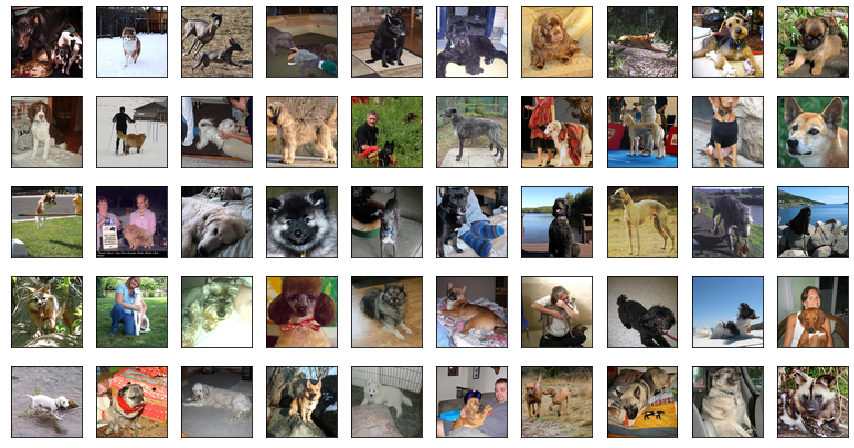

In [10]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    print(filename)
    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)

['n02093647_3166.jpg' '971' 'False' 'False' '0.79836357' '0.00045431967']
['n02094433_3881.jpg' '645' 'False' 'False' '0.99975675' '1.3526027e-07']
['n02113023_6161.jpg' '278' 'False' 'False' '0.8512472' '8.231626e-05']
['n02104029_1278.jpg' '270' 'False' 'False' '0.9990484' '2.6269452e-05']
['n02094258_2277.jpg' '822' 'False' 'False' '0.8940206' '0.0003678462']
['n02104029_1400.jpg' '844' 'False' 'False' '0.99632615' '8.059515e-10']
['n02110806_1382.jpg' '450' 'False' 'False' '0.955405' '2.9775308e-06']
['n02116738_4323.jpg' '275' 'False' 'False' '1.0' '7.3234873e-22']
['n02093991_3516.jpg' '534' 'False' 'False' '0.78177065' '5.0262463e-13']
['n02088632_2521.jpg' '537' 'False' 'False' '0.9895399' '0.010460168']
['n02110627_10848.jpg' '670' 'False' 'False' '0.7841666' '3.7350947e-07']
['n02088632_512.jpg' '762' 'False' 'False' '0.9458348' '1.7709215e-10']
['n02094258_2277.jpg' '822' 'False' 'False' '0.8940206' '0.0003678462']
['n02107574_534.jpg' '880' 'False' 'False' '0.69255006' '4.1

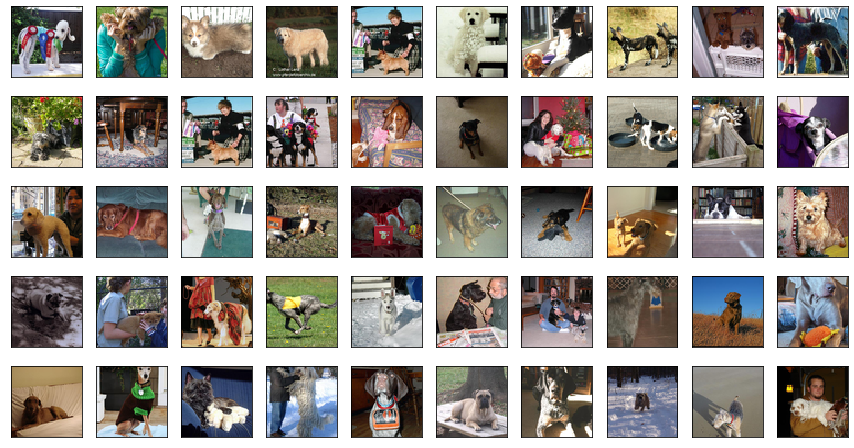

In [11]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

picnames = []
randompics = []
picnum = 50

for i in range(picnum):
    filename = random.choice(notdog)
    ind = list(res[:,0]).index(filename)
    print(res[ind])

    filepath = root_images + filename
    img = mpimg.imread(filepath)
    randompics.append(img)
    
    
fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(randompics, axes.ravel()):
    ax.imshow(image)

In [12]:
count = {}

for i in range(1000):
    count[i] = list(res[:,1]).count(str(i))

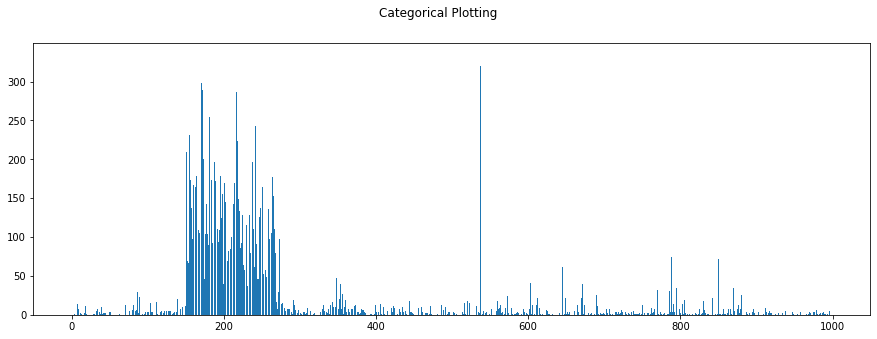

In [13]:
plt.figure(figsize=(15, 5))

plt.bar(count.keys(), count.values())
plt.suptitle('Categorical Plotting')
plt.show()

# 151~268 are dogs